In [1]:
import statistics as ST
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pickle
import scipy.stats
import numpy as np
import math
import copy
import re
import matplotlib as mpl
mpl.rcParams["font.size"] = 12
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['pdf.fonttype'] = 42

## 0. Functions

In [2]:
# This function filter dataset based on the DNA count and cDNA count for each replicate
def all_present_total_new(input_df,cutoff_DNA,cutoff_RNA):
    temp_df=input_df[(input_df['DNA_absolute_count_S1']>=cutoff_DNA)&
                     (input_df['DNA_absolute_count_S2']>=cutoff_DNA)&
                     (input_df['DNA_absolute_count_S3']>=cutoff_DNA)&
                     (input_df['RNA_absolute_count_S1']>=cutoff_RNA)&
                     (input_df['RNA_absolute_count_S2']>=cutoff_RNA)&
                     (input_df['RNA_absolute_count_S3']>=cutoff_RNA)]
    return(temp_df)

## 1. Input and Output

### 1.1 Input address

In [3]:
dr1='Data/'
reconstructed_barcode_address = dr1+'Finalized_promoters.xlsx'
SCD_RTqPCR_adress = dr1+ 'SCD_RTqPCR_201114.csv'
YPD_RTqPCR_adress = dr1+ 'YPD_RTqPCR_201112.csv'

### 1.3 Read input 

#### 1.3.1 Control input for RD data

In [4]:
YPD_expression_pc = pd.read_csv(dr1+'YPD_PC_expression.csv', index_col = 0)
YPD_expression_nc = pd.read_csv(dr1+'YPD_NC_expression.csv', index_col = 0)
SCD_expression_pc = pd.read_csv(dr1+'SCD_PC_expression.csv', index_col = 0)
SCD_expression_nc = pd.read_csv(dr1+'SCD_NC_expression.csv', index_col = 0)
YPD_old_expression_pc = pd.read_csv(dr1+'YPD_old_PC_expression.csv', index_col = 0)
YPD_old_expression_nc = pd.read_csv(dr1+'YPD_old_NC_expression.csv', index_col = 0)

#### 1.3.1 Expression input for RD data

In [5]:
# Output pc control and nc control data to final data folder
YPD_expression_f = pd.read_csv(dr1+'YPD_RD_expression_total.csv', index_col = 0)
YPD_old_expression_f = pd.read_csv(dr1+'YPD_old_RD_expression_total.csv', index_col = 0)
SCD_expression_f = pd.read_csv(dr1+'SCD_RD_expression_total.csv', index_col = 0)

#### 1.3.2 Expression input for RNAseq data

In [6]:
# Expression based on Stringtie 
# SCD
SCD_E_genic_ST_dic_adress = dr1 + 'SCD_Genic_ST_expression.p'
# YPD
YPD_E_genic_ST_dic_adress = dr1 + 'YPD_Genic_ST_expression.p'

# Expression based on sliding window method
# SCD
SCD_E_genic_dic_address = dr1 + 'SCD_Genic_expression_NO.p'
# YPD
YPD_E_genic_dic_address = dr1+ 'YPD_Genic_expression_NO.p'

In [7]:
# intergenic expression addresss
# SCD
SCD_E_intergenic_dic_adress = dr1 + 'SCD_Intergenic_expression_NO.p'
# YPD
YPD_E_intergenic_dic_adress = dr1 + 'YPD_Intergenic_expression_NO.p'

In [8]:
# Genic expression by different method
YPD_E_genic_ST_dic = pickle.load( open(YPD_E_genic_ST_dic_adress, "rb" ) ) # ST method
SCD_E_genic_ST_dic = pickle.load( open(SCD_E_genic_ST_dic_adress, "rb" ) )
SCD_E_genic_dic = pickle.load( open(SCD_E_genic_dic_address, "rb" ) )
YPD_E_genic_dic = pickle.load( open(YPD_E_genic_dic_address, "rb" ) )

In [9]:
SCD_E_intergenic_dic = pickle.load( open(SCD_E_intergenic_dic_adress, "rb" ) )
YPD_E_intergenic_dic = pickle.load( open(YPD_E_intergenic_dic_adress, "rb" ) )

In [10]:
#### 1.3.3 Promoter TF information

In [11]:
# promoter complete information
YPD_promoter_df = pd.read_csv(dr1 + 'YPD_promoter_output.csv')
SCD_promoter_df = pd.read_csv(dr1 + 'SCD_promoter_output.csv')

In [12]:
YPD_promoter_df = all_present_total_new(YPD_promoter_df,100,0)
SCD_promoter_df = all_present_total_new(SCD_promoter_df,100,0)

In [13]:
# Motif information

In [14]:
# I only picked those with at least 100 DNA count
SCD_promoter_df_final = pd.read_csv(dr1 + 'SCD_ScerTF_motif_df_final.csv', index_col =0).loc[SCD_promoter_df.representative_sequence.to_list()]
YPD_promoter_df_final = pd.read_csv(dr1 + 'YPD_ScerTF_motif_df_final.csv', index_col =0).loc[YPD_promoter_df.representative_sequence.to_list()]

/var/folders/xv/26kbh4lj2rjdcrxz37m9wxyw0000gn/T/ipykernel_59845/4008878363.py:2: DtypeWarning: Columns (628,629,635,637,638,639,643,653,666,673,677,679,680,685,686,687,692,698,699,701,706,714,720,721,728,730,731,732,751,760,769,776,780,782,785,790,791,824,825,833,834,835,836,838,839,849,854,862,867,869,876,882,888,895,897,899,910,917,922,924,926,927,928,937,947,956,972,976,981,986,987) have mixed types. Specify dtype option on import or set low_memory=False.
  SCD_promoter_df_final = pd.read_csv(dr1 + 'SCD_ScerTF_motif_df_final.csv', index_col =0).loc[SCD_promoter_df.representative_sequence.to_list()]
/var/folders/xv/26kbh4lj2rjdcrxz37m9wxyw0000gn/T/ipykernel_59845/4008878363.py:3: DtypeWarning: Columns (628,635,637,639,640,642,643,653,658,666,671,673,677,679,680,685,686,687,692,698,699,701,706,709,714,720,721,728,730,731,732,759,760,769,776,782,784,785,788,790,791,824,833,834,835,836,838,839,849,854,862,867,869,873,875,876,882,883,888,894,895,897,899,905,910,916,917,922,924,926,927,9

In [15]:
# this has been filtered already
SCD_fold_df = pd.read_csv(dr1 + 'SCD_ScerTF_fold_df_D100.csv',index_col = 0)
YPD_fold_df = pd.read_csv(dr1 + 'YPD_ScerTF_fold_df_D100.csv',index_col = 0)

In [16]:
# shuffled fold information
SCD_fold_shuffled_df = pd.read_csv(dr1 + 'SCD_ScerTF_fold_df_D100_reshuffled.csv',index_col = 0)
YPD_fold_shuffled_df = pd.read_csv(dr1 + 'YPD_ScerTF_fold_df_D100_reshuffled.csv',index_col = 0)

#### 1.3.4 Coding sequence name and native promoter information

In [17]:
# I only look at the strength for the native promoter of protein coding gene

In [18]:
df_pcoding = pd.read_csv(dr1+'Coding_gene.bed',index_col = 0)

In [19]:
# Native promoter information
# Start from the Start codon to 500 bp upstream
Native_promoter_df1 = pd.read_csv(dr1 +'Promoter_sequence_from_start',
                                  sep='\t',names=['annotation','sequence']) 
# change name for Gene ID
Native_promoter_df1['Gene ID'] = Native_promoter_df1['annotation'].apply(lambda x: x.split('::')[0])

# find shared index 
temp_shared_index = list(set(Native_promoter_df1['Gene ID'])&set(df_pcoding['Gene ID']))
Native_promoter_df1 = Native_promoter_df1[Native_promoter_df1['Gene ID'].isin(temp_shared_index)]

In [20]:
# Native promoter information
# Start from the TSS
Native_promoter_df2 = pd.read_csv(dr1 +'Promoter_sequence_from_TSS',
                                  sep='\t',names=['annotation','sequence']) 

# change name for Gene ID
Native_promoter_df2['Gene ID'] = Native_promoter_df2['annotation'].apply(lambda x: x.split('::')[0])

# find shared index 
temp_shared_index = list(set(Native_promoter_df2['Gene ID'])&set(df_pcoding['Gene ID']))
Native_promoter_df2 = Native_promoter_df2[Native_promoter_df2['Gene ID'].isin(temp_shared_index)]

#### 1.3.2 Correlation between intergenic region and nearby genes

In [21]:
# using the average expression of the 20 bp within the same intergenic region

In [22]:
# using the each of the 20 bp as a unit

In [23]:
# intergenic compared to positive control expression
SCD_PC_address_V1 = dr1 + 'SCD_median_percentile_comparison_V1_NO'
YPD_PC_address_V1 = dr1 + 'YPD_median_percentile_comparison_V1_NO'
SCD_PC_average_address = dr1 + 'SCD_median_average_fraction_10_V1_NO.csv'
YPD_PC_average_address = dr1 + 'YPD_median_average_fraction_10_V1_NO.csv'

In [24]:
# This is for comparing to PC
SCD_PC_V1 = pd.read_csv(SCD_PC_address_V1)
YPD_PC_V1 = pd.read_csv(YPD_PC_address_V1)

#### 1.3.6 Summary for RD

In [25]:
YPD_summary = pd.read_csv(dr1 + 'YPD_RD_summary_median_total_dna_cutoff_extra.csv')

SCD_summary = pd.read_csv(dr1 + 'SCD_RD_summary_median_total_dna_cutoff_extra.csv')

## 3. Figure 1

In [26]:
# I request 100 DNA count for each rep which is consist with following analysis
temp_DNA_cutoff = 100
YPD_expression_f100_raw = all_present_total_new(YPD_expression_f,temp_DNA_cutoff,0)
SCD_expression_f100_raw = all_present_total_new(SCD_expression_f,temp_DNA_cutoff,0)
# pd.set_option('display.max_columns', 500)

* **<font color=blue>There are some barcodes with extraordinatry high DNA or cDNA count, I exclude for calculating correlation</font>**

In [27]:
temp_index = (YPD_expression_f100_raw['RNA_relative_count_S1']<5000)&(
    YPD_expression_f100_raw['DNA_relative_count_S1']<20000)
YPD_expression_f100 = YPD_expression_f100_raw.loc[temp_index]
print('I remove {} barcode for YPD environment'.format(
    YPD_expression_f100_raw.shape[0]-YPD_expression_f100.shape[0]))
temp_index = (SCD_expression_f100_raw['RNA_relative_count_S1']<5000)&(
    SCD_expression_f100_raw['DNA_relative_count_S1']<20000)
SCD_expression_f100 = SCD_expression_f100_raw.loc[temp_index]
print('I remove {} barcode for SCD environment'.format(
    SCD_expression_f100_raw.shape[0]-SCD_expression_f100.shape[0]))

I remove 1 barcode for YPD environment
I remove 7 barcode for SCD environment


In [28]:
# resampled 1000 dots for rep1 and rep2 correlation

In [29]:
np.random.seed(0)
re_sampled = np.random.choice(YPD_expression_f100.shape[0],1000,replace = False)

### 3.1 Panel B/C

In [30]:
# the correlation between DNA count and cDNA count
temp_r_1b,temp_p_1b = scipy.stats.pearsonr(YPD_expression_f100[
    'DNA_relative_count_S1'],YPD_expression_f100['DNA_relative_count_S2'])
# the correlation between DNA count and cDNA count
temp_r_1c,temp_p_1c = scipy.stats.pearsonr(YPD_expression_f100[
    'RNA_relative_count_S1'],YPD_expression_f100['RNA_relative_count_S2'])

### 3.2 Panel D

* **<font color=blue>I do not set cutoff for RNA, so many of have 0 expression  </font>**
* **<font color=blue>I choose S1 and S2 as example  </font>**

In [31]:
temp_r_1d,temp_p_1d = scipy.stats.pearsonr(
    YPD_expression_f100['S1_normalized_relative'],YPD_expression_f100['S2_normalized_relative'])

In [32]:
scipy.stats.spearmanr(YPD_expression_f100['S1_normalized_relative'],YPD_expression_f100['S2_normalized_relative'])

SpearmanrResult(correlation=0.41251539878172794, pvalue=0.0)

In [33]:
print(YPD_expression_f100.shape[0])

49168


### 3.3 Panel D subset

* **<font color=blue>I choose the top 1th percentile to plot</font>**

In [34]:
cutoff_feature = 'RNA_absolute_count_Total' #'Mean_normalized_relative' # expression_normalized #RNA_absolute_count_Total
temp_RNA_cutoff = YPD_expression_f100[cutoff_feature].quantile([0.99]).values[0]
subset_1d_x = YPD_expression_f100[YPD_expression_f100[cutoff_feature]>=temp_RNA_cutoff]
print(subset_1d_x.shape[0])

493


In [35]:
temp_r_1d_x,temp_p_1d_x = scipy.stats.pearsonr(subset_1d_x['S1_normalized_relative'],subset_1d_x['S2_normalized_relative'])

In [36]:
print(scipy.stats.pearsonr(subset_1d_x['S1_normalized_relative'],subset_1d_x['S2_normalized_relative']))
print(scipy.stats.spearmanr(subset_1d_x['S1_normalized_relative'],subset_1d_x['S2_normalized_relative']))

PearsonRResult(statistic=0.8514425999545723, pvalue=9.988593976619342e-140)
SpearmanrResult(correlation=0.7532020696786746, pvalue=2.2865920017481422e-91)


### 3.4 Panel E

In [37]:
# RT reconstructed result

In [38]:
# SCD

In [39]:
# read reconstructed promoter sequence
rc_df = pd.read_excel(reconstructed_barcode_address)   

In [40]:
rc_scd_rt = pd.read_csv(SCD_RTqPCR_adress)

In [41]:
rc_ypd_rt = pd.read_csv(YPD_RTqPCR_adress)

In [42]:
# negative control B1 is 'TATAGTGGGCATTAGTAGAC'
# negative control B2 is 'CTCGATCGTCTAGGGCGAGG'
# positive control B1 is 'GTCTAACGCTAGCTTGGTAG'
# pc B2 'CAGTAGAGGTGTACGTGTGT'

In [43]:
tt = rc_df['barcode_seq'][[0,2,4]].tolist()+rc_df['barcode_seq'][[6,8]].tolist()

In [44]:
SCD_test = SCD_expression_f.loc[tt][['S1_normalized_relative','S2_normalized_relative','S3_normalized_relative']]

In [45]:
# normalize expression by negative control

In [46]:
SCD_test_norm = SCD_test/YPD_expression_nc.loc['TATAGTGGGCATTAGTAGAC'][['S1_normalized_relative','S2_normalized_relative','S3_normalized_relative']]

In [47]:
PC_temp =SCD_expression_pc.loc['GTCTAACGCTAGCTTGGTAG'][
    ['S1_normalized_relative','S2_normalized_relative','S3_normalized_relative']]/SCD_expression_nc.loc['TATAGTGGGCATTAGTAGAC'][
    ['S1_normalized_relative','S2_normalized_relative','S3_normalized_relative']]

In [48]:
SCD_RNAseq = np.concatenate((np.array(SCD_test_norm), np.array([PC_temp]),np.array([[1,1,1]])), axis=0)

In [49]:
SCD_RT = copy.deepcopy(rc_scd_rt.iloc[[0,1,2,5,6,4,3]])

In [50]:
## The total number of reaction is 3 replicate * 2 target 
SCD_RT['dCt_se']=SCD_RT['dCt_sd']/math.sqrt(3*2)

In [51]:
#calculate the upper and lower limit for fold change
SCD_RT['dCT_fold_change_min_se']=2**(-SCD_RT['dCt_mean']-SCD_RT['dCt_se'])
SCD_RT['dCT_fold_change_max_se']=2**(-SCD_RT['dCt_mean']+SCD_RT['dCt_se'])
SCD_RT['dCT_fold_change_min_sd']=2**(-SCD_RT['dCt_mean']-SCD_RT['dCt_sd'])
SCD_RT['dCT_fold_change_max_sd']=2**(-SCD_RT['dCt_mean']+SCD_RT['dCt_sd'])

In [52]:
SCD_RT['dCT_fold_change']=2**(-SCD_RT['dCt_mean'])

In [53]:
se_er_matrix=np.array([list(SCD_RT['dCT_fold_change']-SCD_RT['dCT_fold_change_min_se']),list(-SCD_RT['dCT_fold_change']+SCD_RT['dCT_fold_change_max_se'])])

In [54]:
t_SCD_RT,p_SCD_RT = scipy.stats.pearsonr(np.mean(SCD_RNAseq,axis=1),SCD_RT['dCT_fold_change'])

In [55]:
# YPD

In [56]:
YPD_test = YPD_old_expression_f.loc[tt][['S1_normalized_relative','S2_normalized_relative','S3_normalized_relative']]
# YPD_test = YPD_old_expression_f.loc[tt_new][['S1_normalized_relative','S2_normalized_relative','S3_normalized_relative']]

In [57]:
YPD_test_norm = YPD_test/YPD_old_expression_nc.loc['TATAGTGGGCATTAGTAGAC'][['S1_normalized_relative','S2_normalized_relative','S3_normalized_relative']]

In [58]:
# normalize expression by negative control

In [59]:
PC_temp =YPD_old_expression_pc.loc[['GTCTAACGCTAGCTTGGTAG']][
    ['S1_normalized_relative','S2_normalized_relative','S3_normalized_relative']]/YPD_old_expression_nc.loc['TATAGTGGGCATTAGTAGAC'][
    ['S1_normalized_relative','S2_normalized_relative','S3_normalized_relative']]

In [60]:
YPD_RNAseq = np.concatenate((np.array(YPD_test_norm), np.array(PC_temp),np.array([[1,1,1]])), axis=0)

In [61]:
# YPD_RT = rc_ypd_rt.iloc[[0,1,2,3,4,5,10,11,12,8,6]]
YPD_RT = copy.deepcopy(rc_ypd_rt.iloc[[0,2,4,10,12,8,6]])

In [62]:
## The total number of reaction is 3 replicate * 2 target 
YPD_RT['dCt_se']=YPD_RT['dCt_sd']/math.sqrt(3*2)

In [63]:
#calculate the upper and lower limit for fold change
YPD_RT['dCT_fold_change_min_se']=2**(-YPD_RT['dCt_mean']-YPD_RT['dCt_se'])
YPD_RT['dCT_fold_change_max_se']=2**(-YPD_RT['dCt_mean']+YPD_RT['dCt_se'])
YPD_RT['dCT_fold_change_min_sd']=2**(-YPD_RT['dCt_mean']-YPD_RT['dCt_sd'])
YPD_RT['dCT_fold_change_max_sd']=2**(-YPD_RT['dCt_mean']+YPD_RT['dCt_sd'])

In [64]:
YPD_RT['dCT_fold_change']=2**(-YPD_RT['dCt_mean'])

In [65]:
se_er_matrix_2=np.array([list(YPD_RT['dCT_fold_change']-YPD_RT['dCT_fold_change_min_se']),list(-YPD_RT['dCT_fold_change']+YPD_RT['dCT_fold_change_max_se'])])

In [66]:
t_YPD_RT,p_YPD_RT = scipy.stats.pearsonr(np.median(YPD_RNAseq,axis=1),YPD_RT['dCT_fold_change'])

### 3.5 Plotting

In [67]:
# DNA

In [68]:
temp_r_s2a,temp_p_s2a = scipy.stats.pearsonr(YPD_expression_f100['DNA_relative_count_S1'],YPD_expression_f100['DNA_relative_count_S3'])
temp_r_s2a,temp_p_s2a

(0.9910035971309467, 0.0)

In [69]:
temp_r_s2d,temp_p_s2d = scipy.stats.pearsonr(YPD_expression_f100['DNA_relative_count_S2'],YPD_expression_f100['DNA_relative_count_S3'])
temp_r_s2d,temp_p_s2d

(0.9911514250690632, 0.0)

In [70]:
# RNA

In [71]:
temp_r_s2b,temp_p_s2b = scipy.stats.pearsonr(YPD_expression_f100['RNA_relative_count_S1'],YPD_expression_f100['RNA_relative_count_S3'])
temp_r_s2b,temp_p_s2b

(0.7666887928834616, 0.0)

In [72]:
temp_r_s2e,temp_p_s2e = scipy.stats.pearsonr(YPD_expression_f100['RNA_relative_count_S2'],YPD_expression_f100['RNA_relative_count_S3'])
temp_r_s2e,temp_p_s2e

(0.8446518365766604, 0.0)

In [73]:
# expression

In [74]:
temp_r_s2c,temp_p_s2c = scipy.stats.pearsonr(YPD_expression_f100['S1_normalized_relative'],YPD_expression_f100['S3_normalized_relative'])
temp_r_s2c,temp_p_s2c

(0.42077422883208637, 0.0)

In [75]:
temp_r_s2f,temp_p_s2f = scipy.stats.pearsonr(YPD_expression_f100['S2_normalized_relative'],YPD_expression_f100['S3_normalized_relative'])
temp_r_s2f,temp_p_s2f

(0.5308867633132781, 0.0)

In [76]:
temp_r_s2c_x,temp_p_s2c_x = scipy.stats.pearsonr(subset_1d_x['S1_normalized_relative'],subset_1d_x['S3_normalized_relative'])
temp_r_s2c_x,temp_p_s2c_x

(0.8505605042802765, 3.804945115645067e-139)

In [77]:
temp_r_s2f_x,temp_p_s2f_x = scipy.stats.pearsonr(subset_1d_x['S2_normalized_relative'],subset_1d_x['S3_normalized_relative'])
temp_r_s2f_x,temp_p_s2f_x

(0.9285260624882457, 2.0154359365568873e-213)

Text(0, 0.5, 'Expression level based on RT-qPCR (A.U.)')

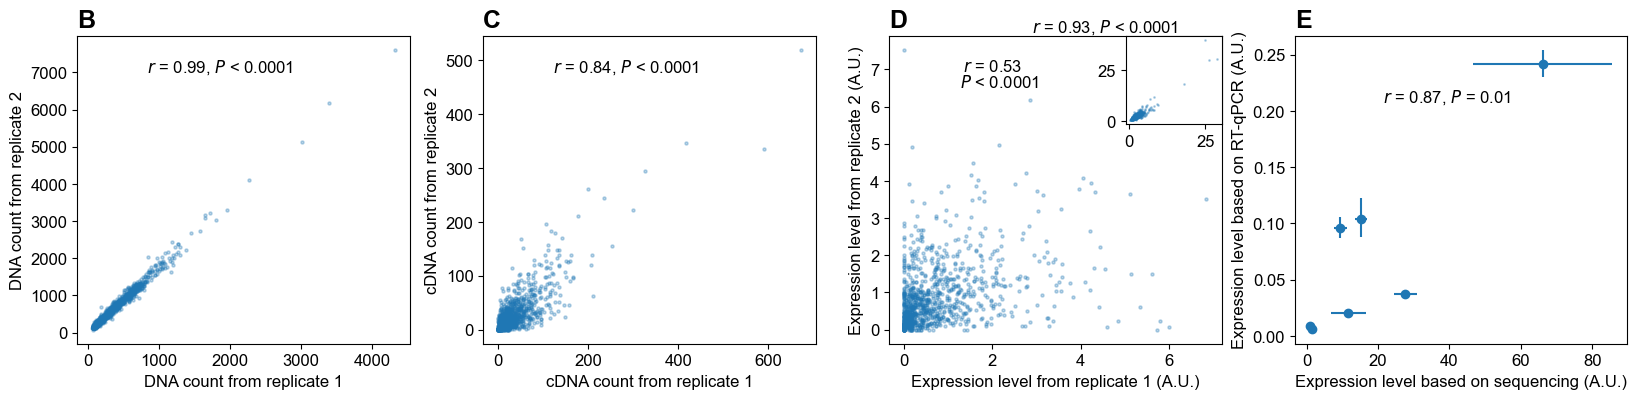

In [96]:
gs = gridspec.GridSpec(10, 46) 
fig1 = plt.figure(figsize=(20,4))
#Here I generate sub figure object and assign to corresponding location
# YPD
# DNA cor
ax1=fig1.add_subplot(gs[:10, :10])

ax1.scatter(YPD_expression_f100['DNA_relative_count_S2'][re_sampled],
            YPD_expression_f100['DNA_relative_count_S3'][re_sampled] ,s=5, alpha = 0.3)
ax1.set_title('B',weight='bold', loc='left', size= 18)
ax1.set_xlabel('DNA count from replicate 1')
ax1.set_ylabel('DNA count from replicate 2')
ax1.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s2d,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)
# ax1.set(xlim=(-5,3000), ylim=(-5,3000))

ax2=fig1.add_subplot(gs[0:10, 12:22])
ax2.scatter(YPD_expression_f100['RNA_relative_count_S2'][re_sampled],
            YPD_expression_f100['RNA_relative_count_S3'][re_sampled],s =5, alpha = 0.3 )
ax2.set_title('C',weight='bold', loc='left', size= 18)
ax2.set_xlabel('cDNA count from replicate 1')
ax2.set_ylabel('cDNA count from replicate 2')
ax2.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s2e,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax3=fig1.add_subplot(gs[:10, 24:34])
ax3.scatter(YPD_expression_f100['S1_normalized_relative'][re_sampled],
            YPD_expression_f100['S2_normalized_relative'][re_sampled],s =5, alpha = 0.3 )
ax3.set_title('D',weight='bold', loc='left', size= 18)
ax3.set_xlabel('Expression level from replicate 1 (A.U.)')
ax3.set_ylabel('Expression level from replicate 2 (A.U.)')

ax3.text(0.40,0.9, "$\it{r}$ = "+str(round(temp_r_s2f,2)), size=12, ha="right",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.45,0.85, "$\it{P}$ < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax3.transAxes)


ax4=fig1.add_subplot(gs[:3, 31:34])


ax4.scatter(subset_1d_x['S2_normalized_relative'],subset_1d_x['S3_normalized_relative'],s=1, alpha = 0.3)
ax4.text(0.55,1.1, "$\it{r}$ = "+str(round(temp_r_s2f_x,2))+", " + "$\it{P}$" + " < 0.0001", 
         size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)


# The error bar for this panel indicate 
ax5 = fig1.add_subplot(gs[:10, 36:46])
ax5.text(0.65,0.8, "$\it{r}$ = "+str(round(t_YPD_RT,2))+", " + "$\it{P}$" + " = 0.01", size=12, ha="right",verticalalignment='center', transform=ax5.transAxes)
ax5.errorbar(np.mean(YPD_RNAseq,axis=1),YPD_RT['dCT_fold_change'], xerr=np.std(YPD_RNAseq,axis=1,ddof=1)/(3**0.5),yerr=se_er_matrix_2,fmt="o", color="tab:blue")
ax5.set_title('E',weight='bold', loc='left', size= 18)
ax5.set_xlabel('Expression level based on sequencing (A.U.)')
ax5.set_ylabel('Expression level based on RT-qPCR (A.U.)')


# fig1.savefig(fig_output_address+'Fig1_part.pdf')

#### Resource_data_output

In [304]:
Recontructed_RD = pd.DataFrame({'Expression_mean': np.mean(YPD_RNAseq, axis=1),
                                'Expression_sem': np.std(YPD_RNAseq,axis=1,ddof=1)/(3**0.5),
                                'Construct_name': YPD_RT['Sample Name'].apply(lambda x: x.split('_RD')[0])
}) 

In [305]:
YPD_expression_f100.to_csv('Source_data/' + 'Fig1_YPD_expression.csv', index=False)
subset_1d_x.to_csv('Source_data/' + 'Fig1_YPD_expression_high_rna_subset.csv', index=False)

In [306]:
YPD_RT.to_csv('Source_data/' + 'Fig1_YPD_RTqPCR.csv', index=False)

In [307]:
Recontructed_RD.to_csv('Source_data/' + 'Fig1_YPD_reconstructed_promoters.csv', index=False)

-----

#### Explanations for the this figure
* Panel B, C and D:
    * There are some barcodes with extraordinatry high DNA or cDNA count, I exclude them for calculating correlation
    * I only considering those barcodes with at least 100 reads for each replicate
    * The data only shows 1000 random selected random barcodes among all the barcodes
    * THe same barcodes are presented for this figure and Fig.S3
    * I choose the top 99th percentile interms of total cDNA count across samples to plot
* Panel E:
    * The expression is relative to ACT1 expression (dCT but not ddCT)
    * I include both positive control and negative control
    * The DNA seq results are from the old YPD sequencing because some of the genotypes do not appear in the new YPD sequencing 
* I used the replicates named S2 and S3

## 4. Figure 2

In [100]:
def calculate_average_genic(input_dic):
    dataset_name = [x for x in input_dic.keys()]
    # Generate average expression for genic expression 
    temp_sub_matrix = []
    temp_normalized_matrix = []
    for srr in dataset_name:
        temp_normalized_matrix.append(
            np.array(input_dic[srr]['Normalized_count_perM'].tolist())/input_dic.get(srr)['Normalized_count_perM'].median())
    for srr in dataset_name:
        temp_sub_matrix.append(
            input_dic[srr]['Normalized_count_perM'].tolist())
    temp_sub_matrix = np.array(temp_sub_matrix)
    temp_normalized_matrix = np.array(temp_normalized_matrix)
    temp_E_genic_average = pd.DataFrame({'Gene ID':input_dic[srr].index.tolist(),
                                         'Mean_relative_expression':temp_normalized_matrix.mean(axis = 0), #relative to median expression
                                    'Mean_normalized_count_perM':temp_sub_matrix.mean(axis = 0),
                                   'SD_normalized_count_perM':np.std(temp_sub_matrix,axis=0,ddof=1),
                                   'SE_normalized_count_perM':np.std(temp_sub_matrix,axis=0,ddof=1)/(temp_sub_matrix.shape[0]**0.5),'data_vector':temp_sub_matrix.transpose().tolist()})   
    return(temp_E_genic_average)

In [101]:
def log_expression(input_matrix,trait_name,minimal_input):
    temp_df = copy.deepcopy(input_matrix)
    temp_df1= copy.deepcopy(input_matrix)
    temp_df.loc[temp_df[trait_name]==0,trait_name] = minimal_input
    temp_df1['log_expression']=np.log10(temp_df[trait_name])
    return(temp_df1)

In [102]:
def Generate_mean_and_sd(input_control):#the input is a matrix of control data. the output is a vector with mean at the first position and sd at the second position
    temp_mean=input_control['expression_normalized'].mean()
    temp_sd=input_control['expression_normalized'].std()
    return([temp_mean,temp_sd])

### 4.1 Analyze RNAseq data: genic

In [103]:
temp_dic = {}
temp_shared_index = []
for key,value in YPD_E_genic_ST_dic.items():
    temp_df = value[~value.index.str.contains("STRG")]
    temp_shared_index = temp_shared_index + list(temp_df.index)
temp_shared_index = list(set(temp_shared_index))

for key,value in YPD_E_genic_ST_dic.items():
    temp_dic[key] = value.loc[temp_shared_index]
YPD_E_genic_ST_dic = temp_dic

# I filtered StringTie result to only keep those with known transcript reference 
temp_dic = {}
temp_shared_index = []
for key,value in SCD_E_genic_ST_dic.items():
    temp_df = value[~value.index.str.contains("STRG")]
    temp_shared_index = temp_shared_index + list(temp_df.index)
temp_shared_index = list(set(temp_shared_index))

for key,value in SCD_E_genic_ST_dic.items():
    temp_dic[key] = value.loc[temp_shared_index]
SCD_E_genic_ST_dic = temp_dic

In [104]:
# Get the average for YPD for genic
YPD_E_genic_average = calculate_average_genic(YPD_E_genic_dic)
# Get the average for YPD for intergenic

# Get the average for YPD for genic
SCD_E_genic_average = calculate_average_genic(SCD_E_genic_dic)
# Get the average for YPD for intergenic


In [105]:
SCD_E_genic_average=log_expression(SCD_E_genic_average ,'Mean_relative_expression',1/10000000)
YPD_E_genic_average=log_expression(YPD_E_genic_average ,'Mean_relative_expression',1/10000000)

In [106]:
# I want to know the conversion factor between median genic expression and PSP2

In [107]:
# this is considering ST method
temp_list = []
t1_list =[]
t2_list = []
for x in YPD_E_genic_ST_dic.values():
    t1_list.append(x.loc['YML017W']['FPKM'])
    t2_list.append(x['FPKM'].median())
    temp_list.append(x.loc['YML017W']['FPKM']/x['FPKM'].median())
print(ST.mean(t1_list)/ST.mean(t2_list))
print(ST.median(t1_list)/ST.median(t2_list))
print(ST.mean(temp_list))
print(ST.median(temp_list))

1.8903627227390334
1.904326349878215
1.8920596813545179
1.9257605740710446


In [108]:
temp_list = []
t1_list =[]
t2_list = []
for x in SCD_E_genic_ST_dic.values():
    t1_list.append(x.loc['YML017W']['FPKM'])
    t2_list.append(x['FPKM'].median())
    temp_list.append(x.loc['YML017W']['FPKM']/x['FPKM'].median())
print(ST.mean(t1_list)/ST.mean(t2_list))
print(ST.median(t1_list)/ST.median(t2_list))
print(ST.mean(temp_list))
print(ST.median(temp_list))

0.46616399215689525
0.4520113376689356
0.4661272216008537
0.46426443362382236


In [109]:
# this is considering SW method
temp_list = []
t1_list =[]
t2_list = []
for x in YPD_E_genic_dic.values():
    t1_list.append(x.loc['YML017W']['Normalized_count_perM'])
    t2_list.append(x['Normalized_count_perM'].median())
    temp_list.append(x.loc['YML017W']['Normalized_count_perM']/x['Normalized_count_perM'].median())
print(ST.mean(t1_list)/ST.mean(t2_list))
print(ST.median(t1_list)/ST.median(t2_list))
print(ST.mean(temp_list))
YPD_factor = ST.mean(temp_list)

print(ST.median(temp_list))

1.9047396475458396
1.9266233754416466
1.9060009081862135
1.946861077258799


In [110]:
temp_list = []
t1_list =[]
t2_list = []
for x in SCD_E_genic_dic.values():
    t1_list.append(x.loc['YML017W']['Normalized_count_perM'])
    t2_list.append(x['Normalized_count_perM'].median())
    temp_list.append(x.loc['YML017W']['Normalized_count_perM']/x['Normalized_count_perM'].median())
print(ST.mean(t1_list)/ST.mean(t2_list))
print(ST.median(t1_list)/ST.median(t2_list))
print(ST.mean(temp_list))
SCD_factor = ST.mean(temp_list)
print(ST.median(temp_list))

0.7826794945887146
0.7707354878999352
0.782356100824107
0.7707354878999352


### 4.2 Analyze RD data

* **<font color=blue>First I calculate fold relative to PC (median gene expression), then I took log</font>**

In [111]:
#This is the mean and sd for each control (total method)
YPD_nc_S=Generate_mean_and_sd(YPD_expression_nc)
SCD_nc_S=Generate_mean_and_sd(SCD_expression_nc)
YPD_pc_S=Generate_mean_and_sd(YPD_expression_pc)
SCD_pc_S=Generate_mean_and_sd(SCD_expression_pc)

In [112]:
# filter based on absolute DNA count in each sample
temp_cut_DNA = 100
temp_cut_RNA = 0
df_total = SCD_expression_f
SCD_expression_f_100 = all_present_total_new(df_total,temp_cut_DNA,temp_cut_RNA)

In [113]:
# filter based on absolute DNA count in each sample
temp_cut_DNA = 100
temp_cut_RNA = 0
df_total = YPD_expression_f
YPD_expression_f_100 = all_present_total_new(df_total,temp_cut_DNA,temp_cut_RNA)

In [114]:
p_2a_YPD_100 = copy.deepcopy(YPD_expression_f_100[['barcode_cluster.x','expression_normalized']])
p_2a_YPD_100['relative_expression'] = p_2a_YPD_100['expression_normalized'].apply(lambda x: x/YPD_pc_S[0]*YPD_factor)
p_2a_YPD_100=log_expression(p_2a_YPD_100,'relative_expression',1/10000000)

In [115]:
p_2b_SCD_100 = copy.deepcopy(SCD_expression_f_100[['barcode_cluster.x','expression_normalized']])
p_2b_SCD_100['relative_expression'] = p_2b_SCD_100['expression_normalized'].apply(lambda x: x/SCD_pc_S[0]*SCD_factor)
p_2b_SCD_100=log_expression(p_2b_SCD_100,'relative_expression',1/10000000)

### 4.3 Some summary statistics

In [116]:
sum(YPD_E_genic_average['Mean_relative_expression'] ==0)/len(YPD_E_genic_average ['Mean_relative_expression'])

0.02255418863503222

In [117]:
sum(SCD_E_genic_average ['Mean_relative_expression'] ==0)/len(SCD_E_genic_average ['Mean_relative_expression'])

0.011570005858230814

### 4.4 Plotting

* The positive control here is the median expression

Text(0, 0.5, 'Frequency')

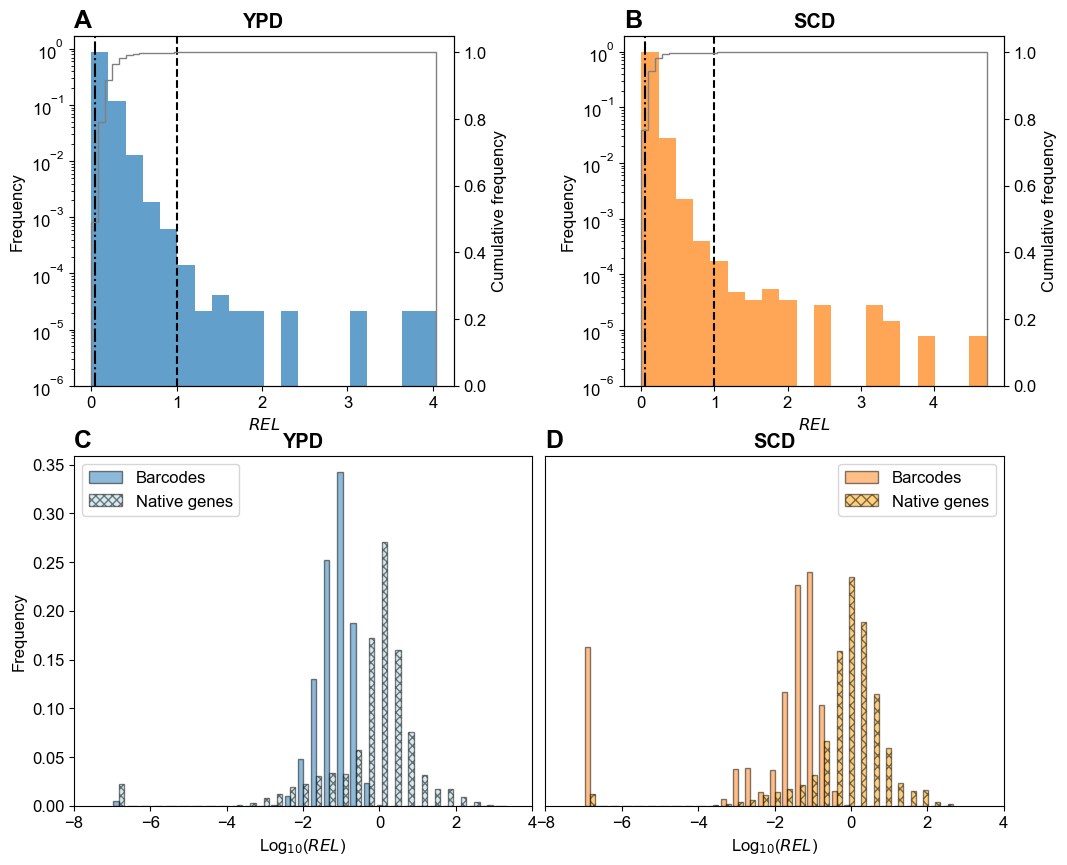

In [135]:
gs = gridspec.GridSpec(2, 12) 
fig1 = plt.figure(figsize=(12,10))
#Here I generate sub figure object and assign to corresponding location

#panel A for YPD expression distribution
ax1=fig1.add_subplot(gs[:1, :5])

x_w1 = np.empty(len(p_2a_YPD_100['relative_expression'].to_list()))
x_w1.fill(1/len(p_2a_YPD_100['relative_expression'].to_list()))


ax1.hist(p_2a_YPD_100['relative_expression'],weights=x_w1,bins=20,alpha = 0.7,bottom = 1e-6)
# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Total_barcode'],color="blue",label='YPD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Total_barcode'],color="orange",label=kk_2[2])
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_title('YPD',loc='center',weight = 'bold')
# ax1.legend(loc="upper right")
# ax1.set_yscale('log')
# ax1.set_xscale('log')
ax1.set_xlabel("$\it{REL}$")
ax1.set_ylabel("Frequency")
ax1.axvline(x=YPD_nc_S[0]/YPD_pc_S[0]*YPD_factor,color='black', linestyle='-.')
ax1.axvline(x=1,color='black', linestyle='--')
# ax1.set_xlim(-0.1,2)
ax1.set_yscale('log',base = 10)

ax_double1 = ax1.twinx()
ax_double1.hist(p_2a_YPD_100['relative_expression'],bins=50, density=True, histtype='step', cumulative=True,
        label='Reversed emp.', color = 'grey',bottom = 1e-6)
ax_double1.set_ylabel("Cumulative frequency")

#panel B for SCD expression distribution

ax2=fig1.add_subplot(gs[:1, 7:12])
ax2.set_title('SCD',loc='center',weight = 'bold')
x_w1 = np.empty(len(p_2b_SCD_100['relative_expression'].to_list()))
x_w1.fill(1/len(p_2b_SCD_100['relative_expression'].to_list()))


ax2.hist(p_2b_SCD_100['relative_expression'],weights=x_w1,
         bottom = 1e-6,bins=20,alpha = 0.7,color = 'tab:orange')
# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Total_barcode'],color="blue",label='SCD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Total_barcode'],color="orange",label=kk_2[2])
ax2.set_title('B',weight='bold', loc='left', size= 18)
# ax1.legend(loc="upper right")
# ax1.set_yscale('log')
# ax1.set_xscale('log')
ax2.set_xlabel("$\it{REL}$")
ax2.set_ylabel("Frequency")
ax2.axvline(x=SCD_nc_S[0]/SCD_pc_S[0]*SCD_factor,color='black', linestyle='-.')
ax2.axvline(x=1,color='black', linestyle='--')
# ax2.set_xlim(-0.1,2)
ax2.set_yscale('log',base = 10)

ax_double2 = ax2.twinx()
ax_double2.hist(p_2b_SCD_100['relative_expression'],bins=50, density=True, histtype='step', cumulative=True,
        label='Reversed emp.', color = 'grey',bottom = 1e-6)
ax_double2.set_ylabel("Cumulative frequency")



# random promoter compared to native promoter
ax3=fig1.add_subplot(gs[1:2, :6])
ax3.set_title('YPD',loc='center',weight = 'bold')
temp_input = [p_2a_YPD_100['log_expression'].to_list(),YPD_E_genic_average['log_expression'].to_list()]
x_w1 = np.empty(len(p_2a_YPD_100['log_expression'].to_list()))
x_w1.fill(1/len(p_2a_YPD_100['log_expression'].to_list()))
x_w2 = np.empty(len(YPD_E_genic_average['log_expression'].to_list()))
x_w2.fill(1/len(YPD_E_genic_average['log_expression'].to_list()))


n, bins, patches = ax3.hist(temp_input,bins=30, alpha=0.5, 
                            weights=[x_w1, x_w2], label=['Barcodes','Native genes'],
                            color=['tab:blue','lightblue'],edgecolor='black', linewidth=1)
hatches = ['', 'xxxx']
for patch_set, hatch in zip(patches, hatches):
    for patch in patch_set.patches:
        patch.set_hatch(hatch)


# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Total_barcode'],color="blue",label='YPD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Total_barcode'],color="orange",label=kk_2[2])
ax3.set_title('C',weight='bold', loc='left', size= 18)
# ax1.legend(loc="upper right")
# ax1.set_yscale('log')
# ax1.set_xscale('log')
ax3.set_xlabel("Log$_{10}$($\it{REL}$)")
ax3.set_ylabel("Frequency")
# ax1.axvline(x=math.log10(YPD_nc_S[0]),color='black', linestyle='--')
# ax1.axvline(x=math.log10(YPD_pc_S[0]),color='black', linestyle='--')
ax3.set_xlim(-8,4)
ax3.legend(loc="upper left")

#panel B for SCD expression distribution

ax4=fig1.add_subplot(gs[1:2, 6:12],sharey = ax3,sharex = ax3)

ax4.set_title('SCD',loc='center',weight = 'bold')
temp_input = [p_2b_SCD_100['log_expression'].to_list(),SCD_E_genic_average['log_expression'].to_list()]
x_w1 = np.empty(len(p_2b_SCD_100['log_expression'].to_list()))
x_w1.fill(1/len(p_2b_SCD_100['log_expression'].to_list()))
x_w2 = np.empty(len(SCD_E_genic_average['log_expression'].to_list()))
x_w2.fill(1/len(SCD_E_genic_average['log_expression'].to_list()))

n, bins, patches  = ax4.hist(temp_input,bins=30, alpha=0.5, 
                             weights=[x_w1, x_w2], label=['Barcodes','Native genes'],
                             color=['tab:orange','orange'],edgecolor='black', linewidth=1)
hatches = ['', 'xxx']
for patch_set, hatch in zip(patches, hatches):
    for patch in patch_set.patches:
        patch.set_hatch(hatch)
ax4.legend(loc="upper right")
# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Total_barcode'],color="blue",label='SCD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Total_barcode'],color="orange",label=kk_2[2])
ax4.set_title('D',weight='bold', loc='left', size= 18)
ax4.axes.yaxis.set_visible(False)
# ax1.legend(loc="upper right")
# ax1.set_yscale('log')
# ax1.set_xscale('log')
ax4.set_xlabel("Log$_{10}$($\it{REL}$)")
ax4.set_ylabel("Frequency")
# fig1.savefig(fig_output_address+'Fig2_raw.pdf')

#### Resource_data_output

In [134]:
# normalized to median yeast promoter expresssion
p_2a_YPD_100.reset_index().drop(columns = ['barcode_cluster.x']).to_csv('Source_data/' + 'Fig2_YPD_RD_expression.csv',index = False)

In [135]:
# this is negative control expression level
YPD_nc_S[0]/YPD_pc_S[0]*YPD_factor

0.05027564758670754

In [136]:
# normalized to median yeast promoter expresssion
p_2b_SCD_100.reset_index().drop(columns = ['barcode_cluster.x']).to_csv('Source_data/' + 'Fig2_SCD_RD_expression.csv',index = False)

In [137]:
# this is negative control expression level
print(SCD_nc_S[0]/SCD_pc_S[0]*SCD_factor)

0.04596995226553077


In [138]:
YPD_E_genic_average[['log_expression','Mean_relative_expression','Gene ID']].to_csv('Source_data/' + 'Fig2_YPD_native_gene_expression.csv',index = False)

In [139]:
SCD_E_genic_average[['log_expression','Mean_relative_expression','Gene ID']].to_csv('Source_data/' + 'Fig2_SCD_native_gene_expression.csv',index = False)

----

#### Explanations for the this figure
* Panel A and B:
    * For each distribution, the expression is relative to the median native gene expression in corresponding env.
    * The relation between PSP2 to median expression is based on RNAseq data using sliding window method.
* Panel C and D:
    * X-axis is log10 scale. 

-----

## 5 Figure 3

In [140]:
def seperate_to_three_df(input_df):
    # output: first df is for both strand, second is for forward strand, third is for reverse strand.
    temp_list_1 = []
    temp_list_2 = []
    temp_list_3 = []
    for index, row in input_df.iterrows():
        if 'Forward' in row['Strandness']:
            temp_list_2.append(index)
        elif 'Reverse' in row['Strandness']:
            temp_list_3.append(index)
        else:
            temp_list_1.append(index)
    return([input_df.loc[temp_list_1],input_df.loc[temp_list_2],input_df.loc[temp_list_3]])

### 5.1 The GC content and TATA box of random promoter 

In [141]:
# calculate nucleotide and TATA box content
YPD_promoter_df_final['A_f'] = YPD_promoter_df_final['P_Cluster_seq'].apply(lambda x:len(re.findall("[Aa]", x))/len(x))
YPD_promoter_df_final['T_f'] = YPD_promoter_df_final['P_Cluster_seq'].apply(lambda x:len(re.findall("[Tt]", x))/len(x))
YPD_promoter_df_final['G_f'] = YPD_promoter_df_final['P_Cluster_seq'].apply(lambda x:len(re.findall("[Gg]", x))/len(x))
YPD_promoter_df_final['C_f'] = YPD_promoter_df_final['P_Cluster_seq'].apply(lambda x:len(re.findall("[Cc]", x))/len(x))

In [142]:
SCD_promoter_df_final['A_f'] = SCD_promoter_df_final['P_Cluster_seq'].apply(lambda x:len(re.findall("[Aa]", x))/len(x))
SCD_promoter_df_final['T_f'] = SCD_promoter_df_final['P_Cluster_seq'].apply(lambda x:len(re.findall("[Tt]", x))/len(x))
SCD_promoter_df_final['G_f'] = SCD_promoter_df_final['P_Cluster_seq'].apply(lambda x:len(re.findall("[Gg]", x))/len(x))
SCD_promoter_df_final['C_f'] = SCD_promoter_df_final['P_Cluster_seq'].apply(lambda x:len(re.findall("[Cc]", x))/len(x))

* **<font color=blue>I only use barcode that has promoter information and at least has 100 DNA count for each replicate for plotting the distribution</font>**

In [143]:
instances=["TATAAAAA","TATAAAAG","TATAAATA","TATAAATG","TATATAAA","TATATAAG","TATATATA","TATATATG"]
def find_tata_box(input):
    a=0
    for x in instances:
        a+=input.count(x)
    return a
        

In [144]:
YPD_promoter_df_final['quantile'] = pd.qcut(YPD_promoter_df_final['expression_normalized'].rank(method='first'), 50, labels=False, duplicates = 'raise')
SCD_promoter_df_final['quantile'] = pd.qcut(SCD_promoter_df_final['expression_normalized'].rank(method='first'), 50, labels=False, duplicates = 'raise')

In [145]:
print(scipy.stats.spearmanr(YPD_promoter_df_final['GC_content'],YPD_promoter_df_final['expression_normalized']))

SpearmanrResult(correlation=0.07918428348700662, pvalue=5.645352981131522e-65)


In [146]:
temp_agg=YPD_promoter_df_final.groupby(['quantile'], as_index=False).agg({"GC_content":['mean','sem','std'],"TATA_box":['mean','sem','std']})
p_3ab_YPD = temp_agg

In [147]:
temp_agg=SCD_promoter_df_final.groupby(['quantile'], as_index=False).agg({"GC_content":['mean','median','sem','std'],"TATA_box":['mean','median','sem','std']})
p_3ab_SCD = temp_agg

In [148]:
print(scipy.stats.spearmanr(YPD_promoter_df_final['GC_content'],YPD_promoter_df_final['expression_normalized']))

SpearmanrResult(correlation=0.07918428348700662, pvalue=5.645352981131522e-65)


In [149]:
print(scipy.stats.spearmanr(YPD_promoter_df_final['TATA_box'],YPD_promoter_df_final['expression_normalized']))

SpearmanrResult(correlation=0.011534710428949877, pvalue=0.0132951865477458)


In [150]:
print(scipy.stats.spearmanr(SCD_promoter_df_final['GC_content'],SCD_promoter_df_final['expression_normalized']))
print(scipy.stats.spearmanr(SCD_promoter_df_final['TATA_box'],SCD_promoter_df_final['expression_normalized']))

SpearmanrResult(correlation=0.13724163126416503, pvalue=7.628798802664769e-150)
SpearmanrResult(correlation=0.006640212195327012, pvalue=0.20930479047961548)


In [151]:
print(scipy.stats.pearsonr(p_3ab_YPD[('TATA_box','mean')],p_3ab_YPD['quantile']))

PearsonRResult(statistic=0.25629070376299024, pvalue=0.07240694982440907)


In [152]:
print(scipy.stats.spearmanr(p_3ab_YPD[('TATA_box','mean')],p_3ab_YPD['quantile']))

SpearmanrResult(correlation=0.15721921991134932, pvalue=0.2755423335091225)


In [153]:
print(scipy.stats.pearsonr(p_3ab_YPD[('GC_content','mean')],p_3ab_YPD['quantile']))

PearsonRResult(statistic=0.8148326071139177, pvalue=5.988535628627851e-13)


In [154]:
print(scipy.stats.spearmanr(p_3ab_YPD[('GC_content','mean')],p_3ab_YPD['quantile']))

SpearmanrResult(correlation=0.8206962785114046, pvalue=2.9689434758549654e-13)


In [155]:
print(scipy.stats.pearsonr(p_3ab_SCD[('TATA_box','mean')],p_3ab_SCD['quantile']))

PearsonRResult(statistic=0.13383119112983802, pvalue=0.3541490707943108)


In [156]:
print(scipy.stats.spearmanr(p_3ab_SCD[('TATA_box','mean')],p_3ab_SCD['quantile']))
print(scipy.stats.spearmanr(p_3ab_SCD[('GC_content','mean')],p_3ab_YPD['quantile']))

SpearmanrResult(correlation=0.08113082599817364, pvalue=0.5754138371727722)
SpearmanrResult(correlation=0.9235534213685473, pvalue=1.2918308113588862e-21)


In [157]:
print(scipy.stats.pearsonr(p_3ab_SCD[('GC_content','mean')],p_3ab_YPD['quantile']))

PearsonRResult(statistic=0.8891943904479065, pvalue=6.425562270025239e-18)


------

### 5.2 The GC content and TATA box of native promoter 

In [162]:
def calculate_average_genic_ST(input_dic):
    dataset_name = [x for x in input_dic.keys()]
    # Generate average expression for genic expression 
    temp_sub_matrix = []
    for srr in dataset_name:
        temp_sub_matrix.append(
            input_dic[srr]['TPM'].tolist())
    temp_sub_matrix = np.array(temp_sub_matrix)
    temp_E_genic_average = pd.DataFrame({'Gene ID':input_dic[srr].index.tolist(),
                                    'Mean_TPM':temp_sub_matrix.mean(axis = 0),
                                   'SD_TPM':np.std(temp_sub_matrix,axis=0,ddof=1),
                                   'SE_TPM':np.std(temp_sub_matrix,axis=0,ddof=1)/(temp_sub_matrix.shape[0]**0.5),'data_vector':temp_sub_matrix.transpose().tolist()})   
    return(temp_E_genic_average)

In [163]:
# Get the sequence feature for them
Native_promoter_df1['TATA_box'] = Native_promoter_df1['sequence'].apply(lambda x: find_tata_box(str(x)))
Native_promoter_df1['A_f'] = Native_promoter_df1['sequence'].apply(lambda x:len(re.findall("[Aa]", x))/len(x))
Native_promoter_df1['T_f'] = Native_promoter_df1['sequence'].apply(lambda x:len(re.findall("[Tt]", x))/len(x))
Native_promoter_df1['G_f'] = Native_promoter_df1['sequence'].apply(lambda x:len(re.findall("[Gg]", x))/len(x))
Native_promoter_df1['C_f'] = Native_promoter_df1['sequence'].apply(lambda x:len(re.findall("[Cc]", x))/len(x))
Native_promoter_df1['GC_content'] = Native_promoter_df1['G_f'] + Native_promoter_df1['C_f']

In [164]:
# Get the average for YPD for genic
YPD_E_genic_average_ST = calculate_average_genic_ST(YPD_E_genic_ST_dic)

In [165]:
# Get the average for YPD for genic
SCD_E_genic_average_ST = calculate_average_genic_ST(SCD_E_genic_ST_dic)
# Get the average for YPD for intergenic

In [166]:
# YPD condition

In [167]:
df1 = Native_promoter_df1
df2 = YPD_E_genic_average_ST[['Gene ID','Mean_TPM']]
P_merged=pd.merge(df1, df2, how='inner', on=['Gene ID'],
         left_index=False, right_index=False, sort=True, copy=True, indicator=False,
         validate=None)
YPD_native_promoter_df1 = P_merged

In [168]:
YPD_native_promoter_df1['quantile'] = pd.qcut(YPD_native_promoter_df1['Mean_TPM'].rank(method='first'), 50, labels=False,duplicates='drop')
# YPD_native_promoter_df1['quantile'] = pd.qcut(YPD_native_promoter_df1['mean_expression'], 50, labels=False,duplicates='drop')

In [169]:
print(scipy.stats.spearmanr(YPD_native_promoter_df1['GC_content'],YPD_native_promoter_df1['Mean_TPM']))

SpearmanrResult(correlation=-0.06486742240424857, pvalue=1.431152402144012e-07)


In [170]:
print(scipy.stats.spearmanr((temp_agg['quantile']+1)*5,temp_agg[('GC_content','mean')]))

SpearmanrResult(correlation=0.9235534213685473, pvalue=1.2918308113588862e-21)


In [171]:
# SCD

In [172]:
df1 = Native_promoter_df1
df2 = SCD_E_genic_average_ST[['Gene ID','Mean_TPM']]
P_merged=pd.merge(df1, df2, how='inner', on=['Gene ID'],
         left_index=False, right_index=False, sort=True, copy=True, indicator=False,
         validate=None)
SCD_native_promoter_df1 = P_merged

In [173]:
print(scipy.stats.spearmanr(SCD_native_promoter_df1['GC_content'],SCD_native_promoter_df1['Mean_TPM']))

SpearmanrResult(correlation=-0.011045251413359086, pvalue=0.37082383390282136)


In [174]:
print(scipy.stats.pearsonr(SCD_native_promoter_df1['GC_content'],SCD_native_promoter_df1['Mean_TPM']))

PearsonRResult(statistic=0.013385854743418794, pvalue=0.2781024062091805)


In [175]:
SCD_native_promoter_df1['quantile'] = pd.qcut(SCD_native_promoter_df1['Mean_TPM'].rank(method='first'), 50, labels=False,duplicates='drop')
# SCD_native_promoter_df1['quantile'] = pd.qcut(SCD_native_promoter_df1['mean_expression'], 50, labels=False,duplicates='drop')

In [176]:
print(scipy.stats.spearmanr(SCD_native_promoter_df1['GC_content'],SCD_native_promoter_df1['Mean_TPM']))

SpearmanrResult(correlation=-0.011045251413359086, pvalue=0.37082383390282136)


In [177]:
print(scipy.stats.spearmanr((temp_agg['quantile']+1)*5,temp_agg[('TATA_box','mean')]))

SpearmanrResult(correlation=0.08113082599817364, pvalue=0.5754138371727722)


In [178]:
print(scipy.stats.spearmanr((temp_agg['quantile']+1)*5,temp_agg[('GC_content','mean')]))

SpearmanrResult(correlation=0.9235534213685473, pvalue=1.2918308113588862e-21)


----

### 5.3 Panel D,E significant motif and orientation effect

In [179]:
SCD_s_df = seperate_to_three_df(SCD_fold_df[SCD_fold_df['relative_fold'].notna()])

YPD_s_df = seperate_to_three_df(YPD_fold_df[YPD_fold_df['relative_fold'].notna()])


In [180]:
l1 = YPD_s_df[1][YPD_s_df[1]['Significant'] =='Yes']['Motif']
l2 = YPD_s_df[2][YPD_s_df[2]['Significant'] =='Yes']['Motif']
l3 = SCD_s_df[1][SCD_s_df[1]['Significant'] =='Yes']['Motif']
l4 = SCD_s_df[2][SCD_s_df[2]['Significant'] =='Yes']['Motif']

In [181]:
len(set(l1)|set(l2)|set(l3)|set(l4))

161

In [182]:
# calcualte fraction of motif have significant effect in at least on condition 

In [183]:
print(161/196)

0.8214285714285714


In [184]:
SCD_s_shuffled_df = seperate_to_three_df(SCD_fold_shuffled_df[SCD_fold_shuffled_df['relative_fold'].notna()])

YPD_s_shuffled_df = seperate_to_three_df(YPD_fold_shuffled_df[YPD_fold_shuffled_df['relative_fold'].notna()])


In [185]:
YPD_strand_merge = pd.merge(YPD_s_df[1], YPD_s_df[2], left_on='Motif', right_on='Motif',suffixes=('_Forward', '_Reverse'))
SCD_strand_merge = pd.merge(SCD_s_df[1], SCD_s_df[2], left_on='Motif', right_on='Motif',suffixes=('_Forward', '_Reverse'))

In [186]:
p3e_YPD_r,p3e_YPD_p = scipy.stats.pearsonr(YPD_strand_merge['relative_fold_median_Forward'],YPD_strand_merge['relative_fold_median_Reverse'])
p3e_SCD_r,p3e_SCD_p = scipy.stats.pearsonr(SCD_strand_merge['relative_fold_median_Forward'],SCD_strand_merge['relative_fold_median_Reverse'])

In [187]:
YPD_strand_merge = YPD_strand_merge.set_index('Motif')

SCD_strand_merge = SCD_strand_merge.set_index('Motif')

----

### 5.4 Panel F environmental specific effect

In [188]:
F_strand_merge = pd.merge(YPD_s_df[1].set_index('Motif'), SCD_s_df[1].set_index('Motif'), left_on='Motif', right_on='Motif',suffixes=('_YPD', '_SCD'))
# F_strand_merge = pd.merge(YPD_s_df[1].set_index('Motif').loc[YPD_f_index], SCD_s_df[1].set_index('Motif').loc[SCD_f_index], left_on='Motif', right_on='Motif',suffixes=('_YPD', '_SCD'))
# R_strand_merge = pd.merge(YPD_s_df[2].set_index('Motif').loc[YPD_r_index], SCD_s_df[2].set_index('Motif').loc[SCD_r_index], left_on='Motif', right_on='Motif',suffixes=('_YPD', '_SCD'))
R_strand_merge = pd.merge(YPD_s_df[2].set_index('Motif'), SCD_s_df[2].set_index('Motif'), left_on='Motif', right_on='Motif',suffixes=('_YPD', '_SCD'))

### 5.5 Plotting

In [206]:
p_3ab_YPD_new = p_3ab_YPD.copy()

In [202]:
p_3ab_YPD.columns

MultiIndex([(  'quantile',     ''),
            ('GC_content', 'mean'),
            ('GC_content',  'sem'),
            ('GC_content',  'std'),
            (  'TATA_box', 'mean'),
            (  'TATA_box',  'sem'),
            (  'TATA_box',  'std')],
           )

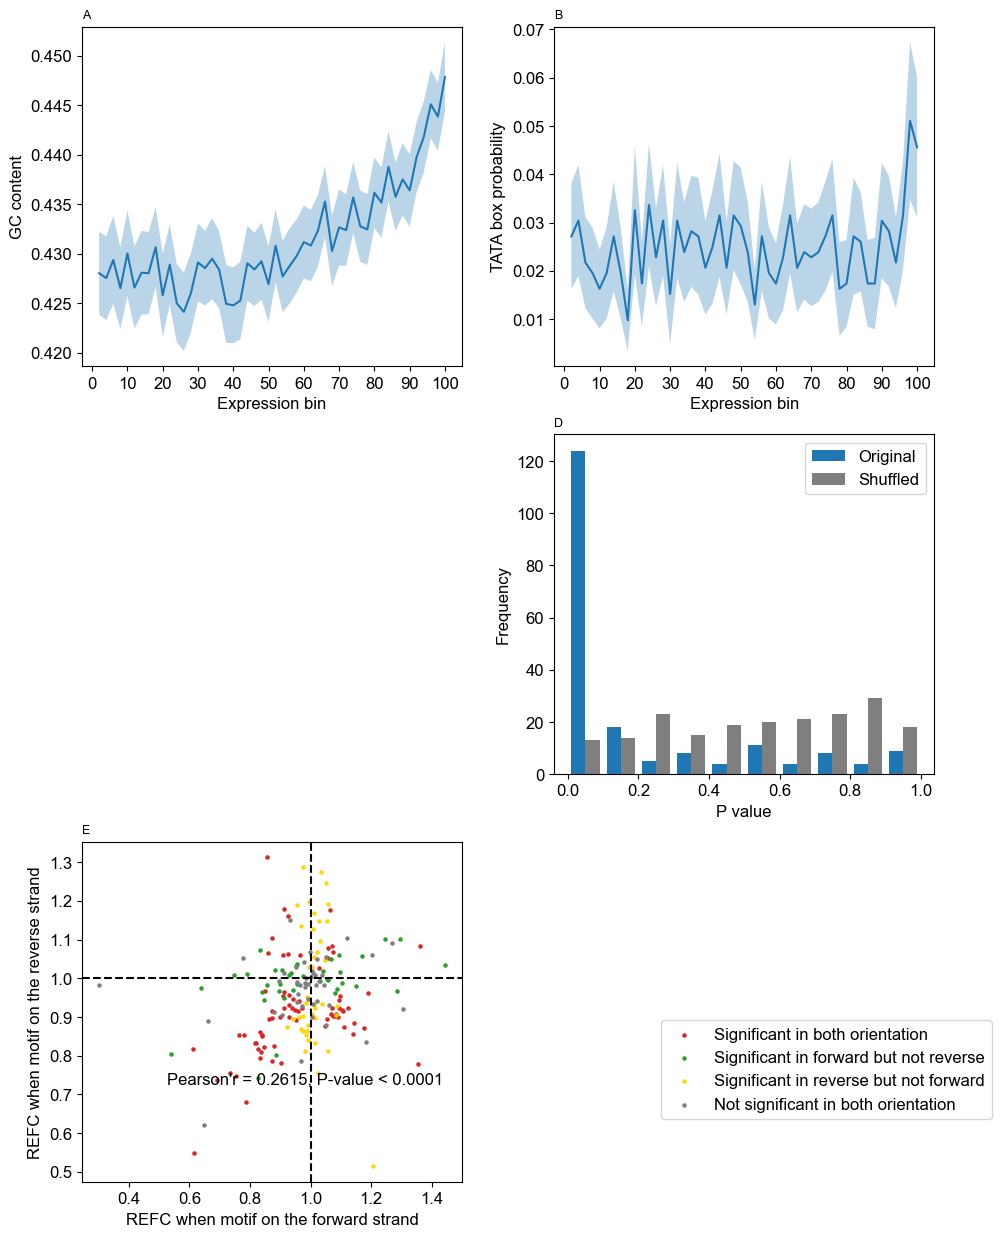

In [192]:
gs = gridspec.GridSpec(3, 11) 
fig1 = plt.figure(figsize=(11,15))
#Here I generate sub figure object and assign to corresponding location

#panel A for GC content on expression of YPD
ax1=fig1.add_subplot(gs[:1, :5])
ax1.set_title('A',loc='left',size = 9)
ax1.plot((p_3ab_YPD['quantile']+1)*2,p_3ab_YPD[('GC_content','mean')], color = 'tab:blue')
ax1.fill_between((p_3ab_YPD['quantile']+1)*2, p_3ab_YPD[('GC_content','mean')]-p_3ab_YPD[('GC_content','sem')]*1.96, p_3ab_YPD[('GC_content','mean')]+p_3ab_YPD[('GC_content','sem')]*1.96,alpha = 0.3)
ax1.set_xticks(np.arange(0, 110,10))
ax1.set_xlabel('Expression bin')
ax1.set_ylabel('GC content')
#panel A for GC content on expression of SCD
# ax1.plot((p_3ab_SCD['quantile']+1)*2,p_3ab_SCD[('GC_content','mean')], color = 'tab:orange')
# ax1.fill_between((p_3ab_SCD['quantile']+1)*2, p_3ab_SCD[('GC_content','mean')]-p_3ab_SCD[('GC_content','sem')]*1.96, p_3ab_SCD[('GC_content','mean')]+p_3ab_SCD[('GC_content','sem')]*1.96,alpha = 0.3)

# TATA box on expre
ax2=fig1.add_subplot(gs[:1, 6:11])
ax2.set_title('B',loc='left',size = 9)
ax2.plot((p_3ab_YPD['quantile']+1)*2,p_3ab_YPD[('TATA_box','mean')], color = 'tab:blue')
ax2.fill_between((p_3ab_YPD['quantile']+1)*2, p_3ab_YPD[('TATA_box','mean')]-p_3ab_YPD[('TATA_box','sem')]*1.96, p_3ab_YPD[('TATA_box','mean')]+p_3ab_YPD[('TATA_box','sem')]*1.96,alpha = 0.3)
ax2.set_xticks(np.arange(0, 110,10))
ax2.set_xlabel('Expression bin')
ax2.set_ylabel('TATA box probability')

# ax2.plot((p_3ab_SCD['quantile']+1)*2,p_3ab_SCD[('TATA_box','mean')], color = 'tab:orange')
# ax2.fill_between((p_3ab_SCD['quantile']+1)*2, p_3ab_SCD[('TATA_box','mean')]-p_3ab_SCD[('TATA_box','sem')]*1.96, p_3ab_SCD[('TATA_box','mean')]+p_3ab_SCD[('TATA_box','sem')]*1.96,alpha = 0.3)



ax4=fig1.add_subplot(gs[1:2, 6:11])
# ax4.hist(YPD_s_shuffled_df[1]['Ranksum_P_value'],label = 'shuffled', color = 'tab:blue',bins = 50)
# ax4.hist(YPD_s_df[1]['Ranksum_P_value'],label = 'original',color = 'tab:pink',bins = 50)
# ax4.set_xscale('log',base = 10)
ax4.hist([YPD_s_df[1]['Ranksum_P_value'],YPD_s_shuffled_df[1]['Ranksum_P_value']],color = ['tab:blue','tab:grey'], label = ['Original','Shuffled'], bins = 10)
ax4.legend(loc='upper right')
ax4.set_title('D',loc='left',size = 9)
ax4.set_ylabel('Frequency')
ax4.set_xlabel('P value')


ax5=fig1.add_subplot(gs[2:3, :5])
input_df1 = YPD_strand_merge
filter1 = (input_df1['Significant_Forward']=='Yes')&(input_df1['Significant_Reverse']=='Yes')
filter2 = (input_df1['Significant_Forward']=='Yes')&(input_df1['Significant_Reverse']=='No')
filter3 = (input_df1['Significant_Forward']=='No')&(input_df1['Significant_Reverse']=='Yes')
filter4 = (input_df1['Significant_Forward']=='No')&(input_df1['Significant_Reverse']=='No')
ax5.scatter(input_df1.loc[filter1]['relative_fold_median_Forward'],input_df1.loc[filter1]['relative_fold_median_Reverse'], s=5, color = "tab:red", label = 'Significant in both orientation')
ax5.scatter(input_df1.loc[filter2]['relative_fold_median_Forward'],input_df1.loc[filter2]['relative_fold_median_Reverse'], s=5, color = "tab:green",label = 'Significant in forward but not reverse')
ax5.scatter(input_df1.loc[filter3]['relative_fold_median_Forward'],input_df1.loc[filter3]['relative_fold_median_Reverse'], s=5, color = "gold",label = 'Significant in reverse but not forward')
ax5.scatter(input_df1.loc[filter4]['relative_fold_median_Forward'],input_df1.loc[filter4]['relative_fold_median_Reverse'], s=5, color = "tab:grey",label = 'Not significant in both orientation')
# ax5.legend(loc="upper right")
ax5.set_title('E',loc='left',size = 9)
ax5.axvline(x=1,color='black', linestyle='--')
ax5.axhline(y=1,color='black', linestyle='--')
ax5.set_xlabel("REFC when motif on the forward strand")
ax5.set_ylabel("REFC when motif on the reverse strand")
ax5.text(0.95,0.3, "Pearson'r = "+str(round(p3e_YPD_r,4))+", P-value < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax5.transAxes)
ax5.legend(bbox_to_anchor =(1.5, 0.5))
# fig1.savefig(fig_output_address+'Fig3.pdf')

#### Resource_data_output

In [217]:
p_3ab_YPD_new = p_3ab_YPD.copy()
p_3ab_YPD_new.columns = p_3ab_YPD_new.columns.map('_'.join)
p_3ab_YPD_new = p_3ab_YPD_new.rename(columns = {'quantile_': 'quantile'})

In [218]:
p_3ab_YPD_new.to_csv('Source_data/' + 'Fig3_YPD_sequence_feature_quantile.csv', index=False)

In [219]:
YPD_s_df[1].to_csv('Source_data/' + 'Fig3_YPD_motif_significant.csv', index=False)

In [220]:
YPD_s_shuffled_df[1].to_csv('Source_data/' + 'Fig3_YPD_motif_significant_shuffled.csv', index=False)

In [221]:
YPD_strand_merge.to_csv('Source_data/' + 'Fig3_YPD_motif_strand_specific_effect.csv', index=False)

-----

## 6. Figure 4

In [222]:
def calculate_average_intergenic(input_dic,input_cb,input_ref_dic):
    dataset_name = [x for x in input_dic.keys()]
    # Generate average expression for genic expression 
    temp_sub_matrix = []
    temp_normalized_matrix = []
    for srr in dataset_name:
        temp_normalized_matrix.append(
            np.array(input_dic[srr][input_cb]['Normalized_count_perM'].tolist())/input_ref_dic.get(srr)['Normalized_count_perM'].median())
    for srr in dataset_name:
        temp_sub_matrix.append(
            input_dic[srr][input_cb]['Normalized_count_perM'].tolist())
    temp_sub_matrix = np.array(temp_sub_matrix)
    temp_normalized_matrix = np.array(temp_normalized_matrix)
    temp_E_genic_average = pd.DataFrame({'Gene ID':input_dic[srr][input_cb].index.tolist(),
                                         'Strand':input_dic[srr][input_cb]['strand'].tolist(),
                                         'Corresponding_intergenic_region':input_dic[srr][input_cb]['Gene'].tolist(),
                                         'Mean_relative_expression':temp_normalized_matrix.mean(axis = 0), #relative to median expression
                                    'Mean_normalized_count_perM':temp_sub_matrix.mean(axis = 0),
                                   'SD_normalized_count_perM':np.std(temp_sub_matrix,axis=0,ddof=1),
                                   'SE_normalized_count_perM':np.std(temp_sub_matrix,axis=0,ddof=1)/(temp_sub_matrix.shape[0]**0.5),'data_vector':temp_sub_matrix.transpose().tolist()})   

    return(temp_E_genic_average)

#### 3.1 Panel A/B

In [223]:
# intergenic expression distribution

In [224]:
# Get the average for YPD for genic
# YPD_E_genic_average = calculate_average_genic(YPD_E_genic_dic)
# Get the average for YPD for intergenic
YPD_E_intergenic_average = calculate_average_intergenic(YPD_E_intergenic_dic,(200,'V1'),YPD_E_genic_dic)

In [225]:
# Get the average for YPD for genic
# SCD_E_genic_average = calculate_average_genic(SCD_E_genic_dic)
# Get the average for YPD for intergenic
SCD_E_intergenic_average = calculate_average_intergenic(SCD_E_intergenic_dic,(200,'V1'),SCD_E_genic_dic)

In [226]:
SCD_intergenic_expression_RNA=log_expression(SCD_E_intergenic_average,'Mean_normalized_count_perM',1/10000)
YPD_intergenic_expression_RNA=log_expression(YPD_E_intergenic_average,'Mean_normalized_count_perM',1/10000)

#### 3.1 Panel C

In [227]:
# filter summary data based on percentage of PC, RNA count and DNA count
#RD project
temp_cut_RNA = 0
temp_cut_DNA = 100                                                     
p_c_rd_SCD = SCD_summary[(SCD_summary['RNA_cut_off']==temp_cut_RNA)&(SCD_summary['DNA_cut_off']==temp_cut_DNA)]
p_c_rd_YPD = YPD_summary[(YPD_summary['RNA_cut_off']==temp_cut_RNA)&(YPD_summary['DNA_cut_off']==temp_cut_DNA)]

In [228]:
#RNAseq
# V1
p_c_RNAseq_SCD = SCD_PC_V1[
    SCD_PC_V1['UTR_length']==200]
p_c_RNAseq_YPD = YPD_PC_V1[
    YPD_PC_V1['UTR_length']==200]

#### 3.1 Panel D

In [229]:
# percentage enrichment

In [230]:

input_df  = p_c_RNAseq_YPD
feature_name = 'More_than_Control_FDR_fraction'
cutoff_name = 'Control_percentile'
temp_dif = np.array(input_df[feature_name][:-1]) - np.array(input_df[feature_name][1:]) 
temp_last = np.array(input_df[feature_name])[-1]
temp_fraction = np.append(temp_dif,temp_last)
output_df =pd.DataFrame({'bins':input_df[cutoff_name],'Fraction':temp_fraction})
YPD_RNA_fraction = output_df

In [231]:

input_df  = p_c_RNAseq_SCD
feature_name = 'More_than_Control_FDR_fraction'
cutoff_name = 'Control_percentile'
temp_dif = np.array(input_df[feature_name][:-1]) - np.array(input_df[feature_name][1:]) 
temp_last = np.array(input_df[feature_name])[-1]
temp_fraction = np.append(temp_dif,temp_last)
output_df =pd.DataFrame({'bins':input_df[cutoff_name],'Fraction':temp_fraction})
SCD_RNA_fraction = output_df

In [232]:
input_df  = p_c_rd_YPD
feature_name = 'better_than_pc_ratio'
cutoff_name = 'Percentile_of_PC'
temp_dif = np.array(input_df[feature_name][:-1]) - np.array(input_df[feature_name][1:]) 
temp_last = np.array(input_df[feature_name])[-1]
temp_fraction = np.append(temp_dif,temp_last)
output_df =pd.DataFrame({'bins':input_df[cutoff_name],'Fraction':temp_fraction})
YPD_rd_fraction = output_df

In [233]:
input_df  = p_c_rd_SCD
feature_name = 'better_than_pc_ratio'
cutoff_name = 'Percentile_of_PC'
temp_dif = np.array(input_df[feature_name][:-1]) - np.array(input_df[feature_name][1:]) 
temp_last = np.array(input_df[feature_name])[-1]
temp_fraction = np.append(temp_dif,temp_last)
output_df =pd.DataFrame({'bins':input_df[cutoff_name],'Fraction':temp_fraction})
SCD_rd_fraction = output_df

#### Fraction of intergenic expression unattributable to chance promoter activities

In [234]:
YPD_DNDN_summary = pd.read_csv (dr1 +'YPD_double_neighbor_summary.csv')

In [235]:
SCD_DNDN_summary = pd.read_csv (dr1+'SCD_double_neighbor_summary.csv')

#### 3.1 Panel E

In [236]:
YPD_PC_comparison_extra_V1 = pd.read_csv(dr1 +'YPD_median_percentile_comparison_extra_V1')

SCD_PC_comparison_extra_V1 = pd.read_csv(dr1 +'SCD_median_percentile_comparison_extra_V1')

In [237]:
SCD_RD_extra = pd.read_csv(dr1+'SCD_RD_summary_median_total_extra.csv')
YPD_RD_extra = pd.read_csv(dr1+'YPD_RD_summary_median_total_extra.csv')


In [239]:
import ast

In [240]:
temp_cut_RNA = 0
temp_cut_DNA = 100                                                     

temp_input1 = YPD_RD_extra[(YPD_RD_extra['RNA_cut_off']==temp_cut_RNA)&(YPD_RD_extra['DNA_cut_off']==temp_cut_DNA)]
temp_input2 = SCD_RD_extra[(SCD_RD_extra['RNA_cut_off']==temp_cut_RNA)&(SCD_RD_extra['DNA_cut_off']==temp_cut_DNA)]

temp_number_YPD_list = []
temp_number_SCD_list = []
temp_p_YPD_list = []
temp_p_SCD_list = []
temp_number_shared_list = []
for temp_ypd_index, temp_scd_index,ypd_ref,scd_ref in zip(temp_input1['barcode_better_than_pc_list'],
                                          temp_input2['barcode_better_than_pc_list'],temp_input1['barcode_list'],
                                          temp_input2['barcode_list']):
    #convert the string to array
    temp_1 = np.array(ast.literal_eval(temp_ypd_index))
    # temp_1 = np.array(temp_ypd_index)
    temp_1_ref = np.array(ast.literal_eval(ypd_ref))
    # temp_1_ref = np.array(ypd_ref)
    
    temp_2 = np.array(ast.literal_eval(temp_scd_index))
    # temp_2 = np.array(temp_scd_index)
    temp_2_ref = np.array(ast.literal_eval(scd_ref))
    # temp_2_ref = np.array(scd_ref)
    
    temp_number_YPD_list.append(len(set(temp_1)&set(temp_2_ref)))
    temp_number_SCD_list.append(len(set(temp_2)&set(temp_1_ref)))
    temp_number_shared_list.append(len(set(temp_1)&set(temp_2)))
    temp_p_YPD_list.append(len(set(temp_1)&set(temp_2))/len(set(temp_1)&set(temp_2_ref)))
    temp_p_SCD_list.append(len(set(temp_1)&set(temp_2))/len(set(temp_2)&set(temp_1_ref)))

temp_shared_1 = pd.DataFrame({'Control_percentile':temp_input1['Percentile_of_PC'],
                        'More_than_control_YPD':temp_number_YPD_list,
                        'More_than_control_SCD':temp_number_SCD_list,
                        'More_than_control_shared':temp_number_shared_list,
                        'More_than_control_fraction_YPD':temp_p_YPD_list,
                        'More_than_control_fraction_SCD':temp_p_SCD_list,})
                        

In [241]:
test_UTR_cutoff = 200 
temp_input1 = YPD_PC_comparison_extra_V1[YPD_PC_comparison_extra_V1['UTR_length'] == test_UTR_cutoff]
temp_input2 = SCD_PC_comparison_extra_V1[SCD_PC_comparison_extra_V1['UTR_length'] == test_UTR_cutoff]

temp_number_YPD_list = []
temp_number_SCD_list = []
temp_p_YPD_list = []
temp_p_SCD_list = []
temp_number_shared_list = []
for temp_ypd_index, temp_scd_index in zip(temp_input1['More_than_Control_list'],
                                          temp_input2['More_than_Control_list']):
    #convert the string to array
    temp_1 = np.array(ast.literal_eval(temp_ypd_index))
    # temp_1 = np.array(temp_ypd_index)
    temp_number_YPD_list.append(sum(temp_1))
    temp_2 = np.array(ast.literal_eval(temp_scd_index))
    # temp_2 = np.array(temp_scd_index)
    temp_number_SCD_list.append(sum(temp_2))
    temp_number_shared_list.append((sum(temp_1&temp_2)))
    temp_p_YPD_list.append(sum(temp_1&temp_2)/sum(temp_1))
    temp_p_SCD_list.append(sum(temp_1&temp_2)/sum(temp_2))

temp_shared_2 = pd.DataFrame({'Control_percentile':temp_input1['Control_percentile'],
                          'More_than_control_YPD':temp_number_YPD_list,
                          'More_than_control_SCD':temp_number_SCD_list,
                          'More_than_control_shared':temp_number_shared_list,
                          'More_than_control_fraction_YPD':temp_p_YPD_list,
                          'More_than_control_fraction_SCD':temp_p_SCD_list,})         

In [242]:
temp_in1 = temp_shared_1[['Control_percentile','More_than_control_YPD','More_than_control_shared']]
temp_in2 = temp_shared_2[['Control_percentile','More_than_control_YPD','More_than_control_shared']]

temp_merged=pd.merge(temp_in1, temp_in2, how='inner', on=['Control_percentile'],
         left_index=False, right_index=False, sort=True,
         suffixes=('_RD', '_RNAseq'), copy=True, indicator=False,
         validate=None)

_______________

#### Plotting

##### main figure

In [243]:
from matplotlib.markers import MarkerStyle

C:\Users\lumia\AppData\Local\Temp\ipykernel_44048\1787839566.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(temp_tick_list, size =9)


Text(0.5, 0, '$\\it{REL}$ cutoff')

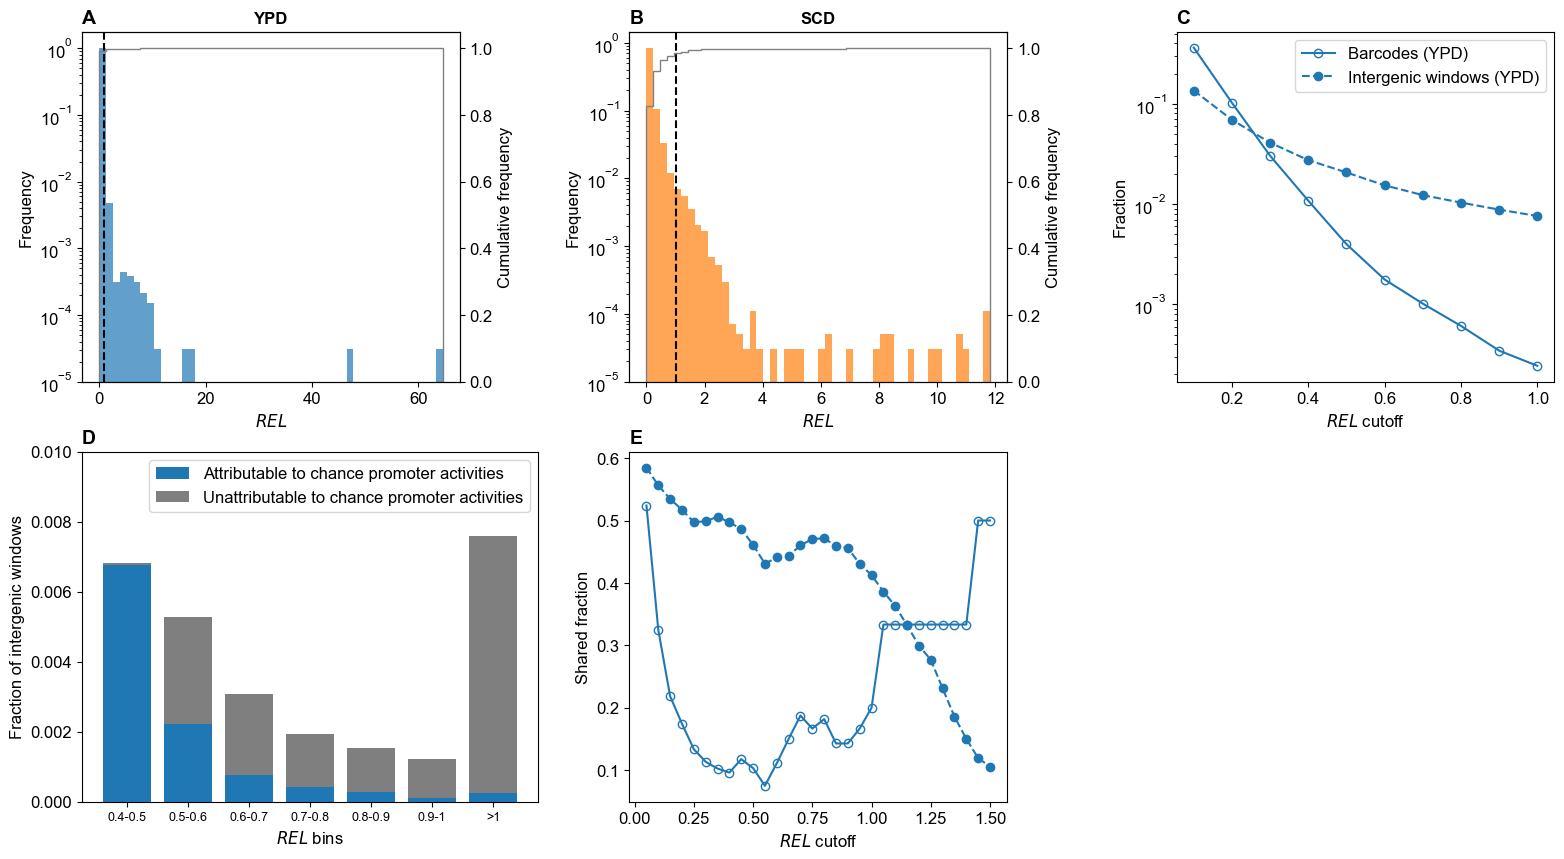

In [150]:
gs = gridspec.GridSpec(2, 19) 
fig1 = plt.figure(figsize=(19,10))
#Here I generate sub figure object and assign to corresponding location

#panel A for YPD expression distribution
ax1=fig1.add_subplot(gs[:1, :5])

x_w1 = np.empty(len(YPD_intergenic_expression_RNA['Mean_relative_expression'].to_list()))
x_w1.fill(1/len(YPD_intergenic_expression_RNA['Mean_relative_expression'].to_list()))

ax1.hist(YPD_intergenic_expression_RNA['Mean_relative_expression'],
         weights=x_w1,bins=50,alpha = 0.7,bottom = 1e-5)
# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Total_barcode'],color="blue",label='YPD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Total_barcode'],color="orange",label=kk_2[2])
ax1.set_title('A',loc='left',weight ='bold', size = 14)
ax1.set_title('YPD',loc='center',weight ='bold', size = 12)
# ax1.legend(loc="upper right")
ax1.set_yscale('log')
# ax1.set_xscale('log')
ax1.set_xlabel("$\it{REL}$")
ax1.set_ylabel("Frequency")
# ax1.set_xlim(-1,30)



# ax1.axvline(x=math.log10(YPD_2_nc_S[0]),color='black', linestyle='--')
ax1.axvline(x=1,color='black', linestyle='--')

ax_double1 = ax1.twinx()
ax_double1.hist(YPD_intergenic_expression_RNA['Mean_relative_expression'],bins=50, density=True, histtype='step', cumulative=True,
        label='Reversed emp.', color = 'grey',bottom = 1e-5)
ax_double1.set_ylabel("Cumulative frequency")

#panel B for SCD expression distribution

ax2=fig1.add_subplot(gs[:1, 7:12])


x_w1 = np.empty(len(SCD_intergenic_expression_RNA['Mean_relative_expression'].to_list()))
x_w1.fill(1/len(SCD_intergenic_expression_RNA['Mean_relative_expression'].to_list()))

ax2.hist(SCD_intergenic_expression_RNA['Mean_relative_expression'],
         weights=x_w1,bins=50,alpha = 0.7,color = 'tab:orange',bottom = 1e-5)

# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Total_barcode'],color="blue",label='SCD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Total_barcode'],color="orange",label=kk_2[2])
ax2.set_title('B',loc='left',weight ='bold', size = 14)
ax2.set_title('SCD',loc='center',weight ='bold', size = 12)
# ax1.legend(loc="upper right")
ax2.set_yscale('log')
# ax1.set_xscale('log')
ax2.set_xlabel("$\it{REL}$")
ax2.set_ylabel("Frequency")

ax2.axvline(x=1,color='black', linestyle='--')
ax_double2 = ax2.twinx()
ax_double2.hist(SCD_intergenic_expression_RNA['Mean_relative_expression'],bins=50, density=True, histtype='step', cumulative=True,
        label='Reversed emp.', color = 'grey',bottom = 1e-5)
ax_double2.set_ylabel("Cumulative frequency")




ax3=fig1.add_subplot(gs[:1, 14:19])
ax3.set_title('C',loc='left',weight ='bold', size = 14)
ax3.plot(p_c_rd_YPD['Percentile_of_PC'], p_c_rd_YPD['better_than_pc_ratio'],  
         marker=MarkerStyle('o', fillstyle='none'),label = 'Barcodes (YPD)',color ='tab:blue')

ax3.plot(p_c_RNAseq_YPD['Control_percentile'], p_c_RNAseq_YPD['More_than_Control_FDR_fraction'],
         '--o', label = 'Intergenic windows (YPD)',color ='tab:blue')


# ax3.set_title('Greater than PC',fontsize=20)
ax3.set_xlabel("$\it{REL}$ cutoff")
ax3.set_ylabel("Fraction")
ax3.legend(loc="upper right")
ax3.set_yscale('log',base=10)

# temp_tick_list = []
# a=ax3.get_xticks().tolist()
# for sub_label in a:
#     new_label = '>' + str(round(sub_label)/100)
#     temp_tick_list.append(new_label )
# ax3.set_xticklabels(temp_tick_list)

ax4=fig1.add_subplot(gs[1:2, :6])
temp_interval = 3

ax4.set_title('D',loc='left',weight ='bold', size = 14)
tempx_list = [str(x) for x in YPD_RNA_fraction['bins'][temp_interval:]]
ax4.bar(tempx_list, YPD_rd_fraction['Fraction'][temp_interval:],
        color = 'tab:blue',label = 'Attributable to chance promoter activities')

ax4.bar(tempx_list,(np.array(YPD_RNA_fraction['Fraction'])[temp_interval:]-np.array(YPD_rd_fraction['Fraction'])[temp_interval:]),
        color = 'tab:grey',bottom = YPD_rd_fraction['Fraction'][temp_interval:],
        label = 'Unattributable to chance promoter activities')
ax4.set_ylabel('Fraction of intergenic windows')
ax4.legend(loc="upper right")
ax4.set_ylim(0,0.01)
# temp_tick_list = ['40-50%','50-60%',
#                  '60-70%','70-80%','80-90%','90-100%','>100%']
temp_tick_list = ['0.4-0.5','0.5-0.6',
                 '0.6-0.7','0.7-0.8','0.8-0.9','0.9-1','>1']

ax4.set_xticklabels(temp_tick_list, size =9)
ax4.set_xlabel('$\it{REL}$ bins') 


ax6=fig1.add_subplot(gs[1:2, 7:12])
ax6.set_title('E',loc='left',weight ='bold', size = 14)
ax6.plot(temp_shared_1['Control_percentile'][:30],
                temp_shared_1['More_than_control_fraction_YPD'][:30],label = 'RD',marker=MarkerStyle('o', fillstyle='none'))
ax6.plot(temp_shared_2['Control_percentile'][:30],
                temp_shared_2['More_than_control_fraction_YPD'][:30],'--o',label = 'Intergenic',color = 'tab:blue')

# axes[0].set_yscale('log')
# axes[0].set_xscale('log')
# axes[0].set_ylim(0,0.01)
# ax1.set_title('shared fraction in each condition')
ax6.set_ylabel('Shared fraction')
ax6.set_xlabel('$\it{REL}$ cutoff')
# temp_tick_list = []
# a=ax6.get_xticks().tolist()
# for sub_label in a:
#     new_label = '>' + str(round(sub_label)/100)
#     temp_tick_list.append(new_label )
# ax6.set_xticklabels(temp_tick_list)


# ax6.legend(loc='upper left')
# fig1.savefig(fig_output_address+'Fig4.pdf')


#### Resource_data_output

In [262]:
YPD_intergenic_expression_RNA[['Gene ID',
                               'Mean_relative_expression',
                               'log_expression']].to_csv(
    'Source_data/' + 'Fig4_YPD_intergenic_expression.csv', index=False)

In [263]:
SCD_intergenic_expression_RNA[['Gene ID',
                               'Mean_relative_expression',
                               'log_expression']].to_csv(
    'Source_data/' + 'Fig4_SCD_intergenic_expression.csv', index=False)

In [264]:
temp_list = [x for x in p_c_rd_YPD.columns.to_list() if '_list' in x]
p_c_rd_YPD.drop(columns = temp_list).to_csv(
    'Source_data/' + 'Fig4_YPD_RD_comparison_summary.csv', index=False)

In [265]:
temp_list = [x for x in p_c_RNAseq_YPD.columns.to_list() if '_list' in x]
p_c_RNAseq_YPD.drop(columns = temp_list).to_csv(
    'Source_data/' + 'Fig4_YPD_intergenic_comparison_summary.csv', index=False)

In [266]:
YPD_RNA_fraction.to_csv('Source_data/' + 'Fig4_YPD_intergenic_fraction_greater_than_cutoff.csv', index=False)

In [267]:
YPD_rd_fraction.to_csv('Source_data/' + 'Fig4_YPD_RD_fraction_greater_than_cutoff.csv', index=False)

In [268]:
temp_shared_2.to_csv('Source_data/' + 'Fig4_YPD_Intergenic_GXE.csv', index=False)

In [269]:
temp_shared_1.to_csv('Source_data/' + 'Fig4_YPD_RD_GXE.csv', index=False)

------

## 7 Supplementary figures

### 7.1 Figure S2: insertion at IV location and XV site

In [270]:
# RTqCPR result for verifying insertion locations
P_IV = pd.read_csv(dr1+'181121_IV.csv')
P_XV = pd.read_csv(dr1+'181121_XV_without_CYC1.csv')

In [271]:
## The total number of reaction is 3 replicate * 2 target 
P_IV['dCt_se']=P_IV['dCt_sd']/math.sqrt(3*2)

In [272]:
#calculate the upper and lower limit for fold change
P_IV['dCT_fold_change_min_se']=2**(-P_IV['dCt_mean']-P_IV['dCt_se'])
P_IV['dCT_fold_change_max_se']=2**(-P_IV['dCt_mean']+P_IV['dCt_se'])
P_IV['dCT_fold_change_min_sd']=2**(-P_IV['dCt_mean']-P_IV['dCt_sd'])
P_IV['dCT_fold_change_max_sd']=2**(-P_IV['dCt_mean']+P_IV['dCt_sd'])

In [273]:
P_IV['dCT_fold_change']=2**(-P_IV['dCt_mean'])

In [274]:
import matplotlib.patches as mpatches

#### Plotting

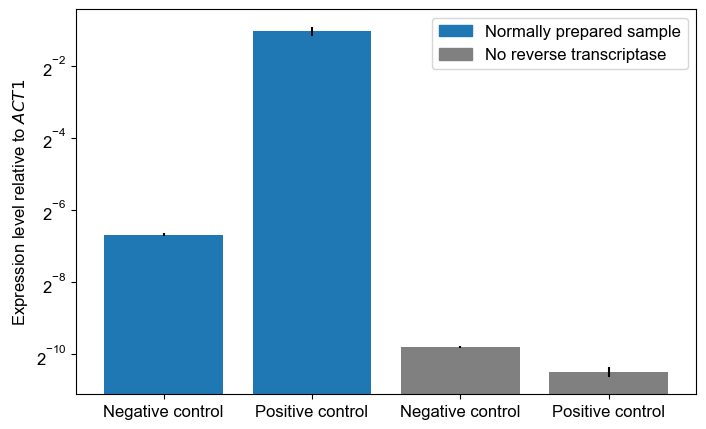

In [107]:
temp_input = P_IV [~P_IV['Sample Name'].str.contains('YGR')]
se_er_matrix=np.array([list(temp_input['dCT_fold_change']-temp_input['dCT_fold_change_min_se']),list(-temp_input['dCT_fold_change']+temp_input['dCT_fold_change_max_se'])])
plt.figure(figsize=(8,5))
plt.bar(temp_input['Sample Name'],temp_input['dCT_fold_change'],
        color=['tab:blue', 'tab:blue', 'grey', 'grey'],)
plt.errorbar(temp_input['Sample Name'],temp_input['dCT_fold_change'],yerr=se_er_matrix, 
             linestyle="None",ecolor='black')
# plt.title("RT-qPCR for confirmation promoters in YPD medium")
plt.ylabel("Expression level relative to $\it{ACT1}$")
# plt.yscale('log',base = 2)
plt.xticks(temp_input['Sample Name'],['Negative control','Positive control','Negative control','Positive control'])
pop_a = mpatches.Patch(color='tab:blue', label='Normally prepared sample')
pop_b = mpatches.Patch(color='grey', label='No reverse transcriptase')

plt.legend(handles=[pop_a,pop_b])
plt.yscale('log',base =2 )
# plt.savefig(fig_output_address+'FigS2.pdf')

#### Source_data

In [276]:
P_IV [~P_IV['Sample Name'].str.contains('YGR')].to_csv('Source_data/' + 'FigS2_RTqPCR.csv', index=False)

### 7.2 Figure S3: the resut of correatlion of between replicates in YPD

In [60]:
# DNA

In [59]:
temp_r_s2a,temp_p_s2a = scipy.stats.pearsonr(YPD_expression_f100['DNA_relative_count_S1'],YPD_expression_f100['DNA_relative_count_S3'])
temp_r_s2a,temp_p_s2a

(0.9910035971309467, 0.0)

In [60]:
temp_r_s2d,temp_p_s2d = scipy.stats.pearsonr(YPD_expression_f100['DNA_relative_count_S2'],YPD_expression_f100['DNA_relative_count_S3'])
temp_r_s2d,temp_p_s2d

(0.9911514250690632, 0.0)

In [61]:
# RNA

In [62]:
temp_r_s2b,temp_p_s2b = scipy.stats.pearsonr(YPD_expression_f100['RNA_relative_count_S1'],YPD_expression_f100['RNA_relative_count_S3'])
temp_r_s2b,temp_p_s2b

(0.7666887928834616, 0.0)

In [63]:
temp_r_s2e,temp_p_s2e = scipy.stats.pearsonr(YPD_expression_f100['RNA_relative_count_S2'],YPD_expression_f100['RNA_relative_count_S3'])
temp_r_s2e,temp_p_s2e

(0.8446518365766604, 0.0)

In [64]:
# expression

In [65]:
temp_r_s2c,temp_p_s2c = scipy.stats.pearsonr(YPD_expression_f100['S1_normalized_relative'],YPD_expression_f100['S3_normalized_relative'])
temp_r_s2c,temp_p_s2c

(0.42077422883208637, 0.0)

In [66]:
temp_r_s2f,temp_p_s2f = scipy.stats.pearsonr(YPD_expression_f100['S2_normalized_relative'],YPD_expression_f100['S3_normalized_relative'])
temp_r_s2f,temp_p_s2f

(0.5308867633132781, 0.0)

In [67]:
temp_r_s2c_x,temp_p_s2c_x = scipy.stats.pearsonr(subset_1d_x['S1_normalized_relative'],subset_1d_x['S3_normalized_relative'])
temp_r_s2c_x,temp_p_s2c_x

(0.8505605042802765, 3.804945115645067e-139)

In [68]:
temp_r_s2f_x,temp_p_s2f_x = scipy.stats.pearsonr(subset_1d_x['S2_normalized_relative'],subset_1d_x['S3_normalized_relative'])
temp_r_s2f_x,temp_p_s2f_x

(0.9285260624882457, 2.0154359365568873e-213)

##### Plotting

Text(1.05, 1.1, '$\\it{r}$ = 0.85, $\\it{P}$ < 0.0001')

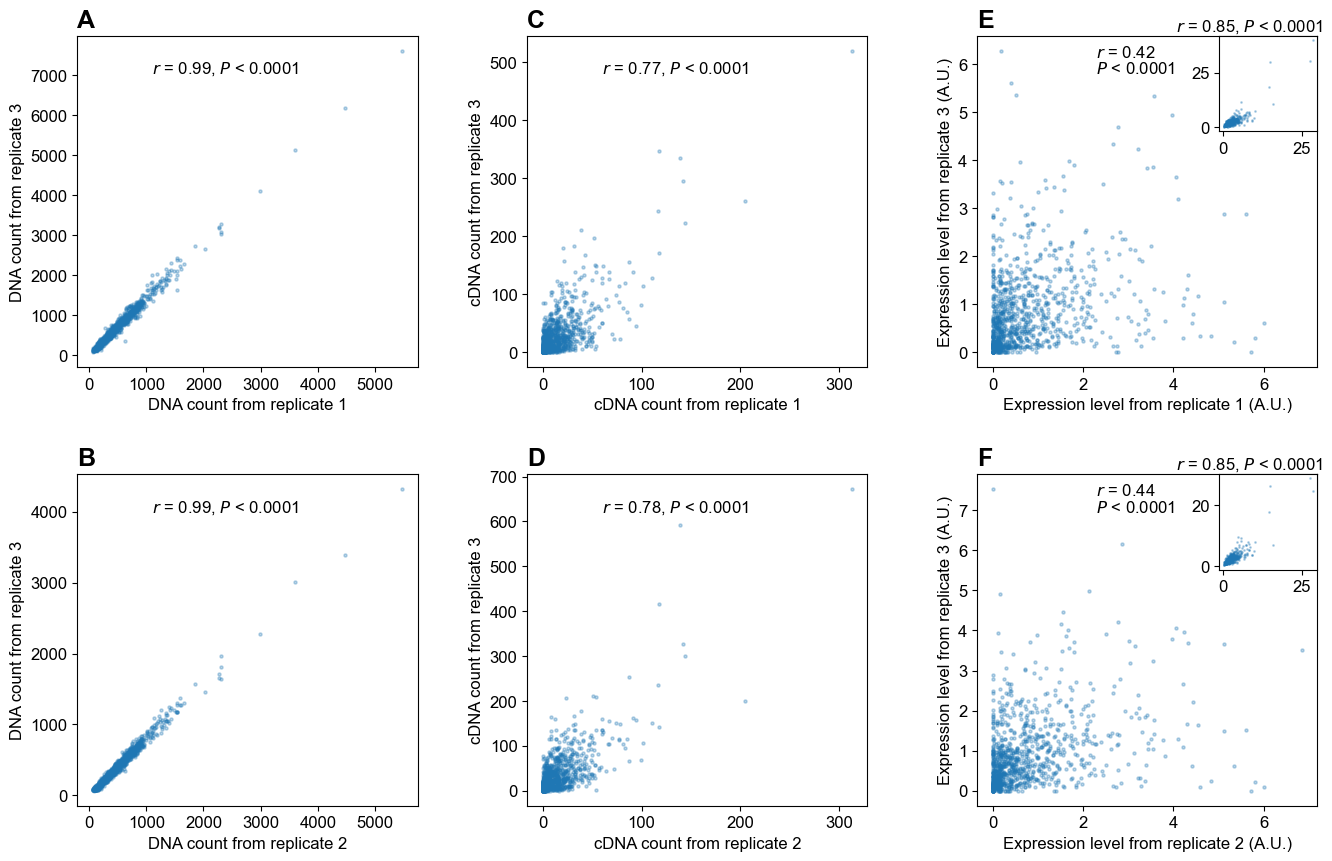

In [76]:
gs = gridspec.GridSpec(23, 36) 
fig1 = plt.figure(figsize=(16,10))
#Here I generate sub figure object and assign to corresponding location
# YPD
# DNA cor
ax1=fig1.add_subplot(gs[:10, :10])

ax1.scatter(YPD_expression_f100['DNA_relative_count_S1'][re_sampled],
            YPD_expression_f100['DNA_relative_count_S3'][re_sampled] ,s=5, alpha = 0.3  )
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_xlabel('DNA count from replicate 1')
ax1.set_ylabel('DNA count from replicate 3')
ax1.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s2a,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)
# ax1.set(xlim=(-5,3000), ylim=(-5,3000))

ax2=fig1.add_subplot(gs[0:10, 13:23])
ax2.scatter(YPD_expression_f100['RNA_relative_count_S1'][re_sampled],
            YPD_expression_f100['RNA_relative_count_S3'][re_sampled],s =5, alpha = 0.3 )
ax2.set_title('C',weight='bold', loc='left', size= 18)
ax2.set_xlabel('cDNA count from replicate 1')
ax2.set_ylabel('cDNA count from replicate 3')
ax2.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s2b,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax3=fig1.add_subplot(gs[:10, 26:36])
ax3.scatter(YPD_expression_f100['S1_normalized_relative'][re_sampled],
            YPD_expression_f100['S3_normalized_relative'][re_sampled],s =5, alpha = 0.3 )
ax3.set_title('E',weight='bold', loc='left', size= 18)
ax3.set_xlabel('Expression level from replicate 1 (A.U.)')
ax3.set_ylabel('Expression level from replicate 3 (A.U.)')

ax3.text(0.35,0.95, "$\it{r}$ = "+str(round(temp_r_s2c,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.35,0.90, "$\it{P}$ < 0.0001", size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)


ax4=fig1.add_subplot(gs[:3, 33:36])


ax4.scatter(subset_1d_x['S1_normalized_relative'],subset_1d_x['S3_normalized_relative'],s=1, alpha = 0.3)
ax4.text(1.05,1.1, "$\it{r}$ = "+str(round(temp_r_s2c_x,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)


# replicate 2 vs replicate 3

ax1=fig1.add_subplot(gs[13:23, :10])

ax1.scatter(YPD_expression_f100['DNA_relative_count_S1'][re_sampled],
            YPD_expression_f100['DNA_relative_count_S2'][re_sampled] ,s=5, alpha = 0.3)
ax1.set_title('B',weight='bold', loc='left', size= 18)
ax1.set_xlabel('DNA count from replicate 2')
ax1.set_ylabel('DNA count from replicate 3')
ax1.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_1b,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)
# ax1.set(xlim=(-5,3000), ylim=(-5,3000))

ax2=fig1.add_subplot(gs[13:23, 13:23])
ax2.scatter(YPD_expression_f100['RNA_relative_count_S1'][re_sampled],
            YPD_expression_f100['RNA_relative_count_S2'][re_sampled],s =5, alpha = 0.3 )
ax2.set_title('D',weight='bold', loc='left', size= 18)
ax2.set_xlabel('cDNA count from replicate 2')
ax2.set_ylabel('cDNA count from replicate 3')
ax2.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_1c,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax3=fig1.add_subplot(gs[13:23, 26:36])
ax3.scatter(YPD_expression_f100['S1_normalized_relative'][re_sampled],
            YPD_expression_f100['S2_normalized_relative'][re_sampled],s =5, alpha = 0.3 )
ax3.set_title('F',weight='bold', loc='left', size= 18)
ax3.set_xlabel('Expression level from replicate 2 (A.U.)')
ax3.set_ylabel('Expression level from replicate 3 (A.U.)')

ax3.text(0.35,0.95, "$\it{r}$ = "+str(round(temp_r_1d,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.35,0.90, "$\it{P}$ < 0.0001", size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)


ax4=fig1.add_subplot(gs[13:16, 33:36])


ax4.scatter(subset_1d_x['S1_normalized_relative'],subset_1d_x['S2_normalized_relative'],s=1, alpha = 0.3)
ax4.text(1.05,1.1, "$\it{r}$ = "+str(round(temp_r_1d_x,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)
# fig1.savefig(fig_output_address+'FigS3.pdf')

#### Source_data

### 7.3 Figure S4: correlation between replicates in SCD

#### 7.3.1 Panel C

* **<font color=blue>I do not set cutoff for RNA, so many of have 0 expression  </font>**
* **<font color=blue>I choose S1 and S2 as example  </font>**

In [77]:
# resampled 1000 dots for rep1 and rep2 correlation

In [280]:
np.random.seed(1)
SCD_re_sampled = np.random.choice(SCD_expression_f100.shape[0],1000,replace = False)

##### 3.1.2 Panel C subset

* **<font color=blue>I choose the top 1th percentile to plot</font>**

In [281]:
cutoff_feature = 'RNA_absolute_count_Total' #'Mean_normalized_relative' # expression_normalized #RNA_absolute_count_Total
temp_RNA_cutoff = SCD_expression_f100[cutoff_feature].quantile([0.99]).values[0]
subset_S3 = SCD_expression_f100[SCD_expression_f100[cutoff_feature]>=temp_RNA_cutoff]
print(subset_S3.shape[0])

1463


##### 3.1.3 

* **<font color=blue>NC control and PC control</font>**

In [282]:
# NC and PC in SCD

In [283]:
temp_r_S1c_pc,temp_p_S1c_pc = scipy.stats.pearsonr(SCD_expression_pc['S1_normalized_relative'],SCD_expression_pc['S2_normalized_relative'])

In [284]:
temp_r_S1c_nc,temp_p_S1c_nc = scipy.stats.pearsonr(SCD_expression_nc['S1_normalized_relative'],SCD_expression_nc['S2_normalized_relative'])

##### 3.1.4 Panel A/B

In [285]:
# DNA

In [286]:
temp_r_s3a,temp_p_s3a = scipy.stats.pearsonr(SCD_expression_f100['DNA_relative_count_S1'],SCD_expression_f100['DNA_relative_count_S2'])
temp_r_s3a,temp_p_s3a

(0.9688785548734736, 0.0)

In [287]:
temp_r_s3d,temp_p_s3d = scipy.stats.pearsonr(SCD_expression_f100['DNA_relative_count_S1'],SCD_expression_f100['DNA_relative_count_S3'])
temp_r_s3d,temp_p_s3d

(0.9631101995923268, 0.0)

In [288]:
temp_r_s3g,temp_p_s3g = scipy.stats.pearsonr(SCD_expression_f100['DNA_relative_count_S2'],SCD_expression_f100['DNA_relative_count_S3'])
temp_r_s3g,temp_p_s3g

(0.9634504147006222, 0.0)

In [289]:
# RNA

In [290]:
temp_r_s3b,temp_p_s3b = scipy.stats.pearsonr(SCD_expression_f100['RNA_relative_count_S1'],SCD_expression_f100['RNA_relative_count_S2'])
temp_r_s3b,temp_p_s3b

(0.5109086222368704, 0.0)

In [291]:
temp_r_s3e,temp_p_s3e = scipy.stats.pearsonr(SCD_expression_f100['RNA_relative_count_S1'],SCD_expression_f100['RNA_relative_count_S3'])
temp_r_s3e,temp_p_s3e

(0.5208398456462171, 0.0)

In [292]:
temp_r_s3h,temp_p_s3h = scipy.stats.pearsonr(SCD_expression_f100['RNA_relative_count_S2'],SCD_expression_f100['RNA_relative_count_S3'])
temp_r_s3h,temp_p_s3h

(0.494905851650163, 0.0)

In [293]:
# expression

In [294]:
temp_r_s3c,temp_p_s3c = scipy.stats.pearsonr(SCD_expression_f100['S1_normalized_relative'],SCD_expression_f100['S2_normalized_relative'])
temp_r_s3c,temp_p_s3c

(0.29749733371179315, 0.0)

In [295]:
temp_r_s3f,temp_p_s3f = scipy.stats.pearsonr(SCD_expression_f100['S1_normalized_relative'],SCD_expression_f100['S3_normalized_relative'])
temp_r_s3f,temp_p_s3f

(0.30213646675286865, 0.0)

In [296]:
temp_r_s3i,temp_p_s3i = scipy.stats.pearsonr(SCD_expression_f100['S2_normalized_relative'],SCD_expression_f100['S3_normalized_relative'])
temp_r_s3i,temp_p_s3i

(0.2766430611056896, 0.0)

In [297]:
# expression

In [298]:
temp_r_s3c_x,temp_p_s3c_x = scipy.stats.pearsonr(subset_S3['S1_normalized_relative'],subset_S3['S2_normalized_relative'])
temp_r_s3c_x,temp_p_s3c_x

(0.8221365096590458, 0.0)

In [299]:
temp_r_s3f_x,temp_p_s3f_x = scipy.stats.pearsonr(subset_S3['S1_normalized_relative'],subset_S3['S3_normalized_relative'])
temp_r_s3f_x,temp_p_s3f_x

(0.766379937480267, 4.231501783589379e-283)

In [300]:
temp_r_s3i_x,temp_p_s3i_x = scipy.stats.pearsonr(subset_S3['S2_normalized_relative'],subset_S3['S3_normalized_relative'])
temp_r_s3i_x,temp_p_s3i_x

(0.7327122342882346, 1.7874574738444704e-246)

##### Plotting

Text(0, 0.5, 'Expression level based on RT-qPCR (A.U.)')

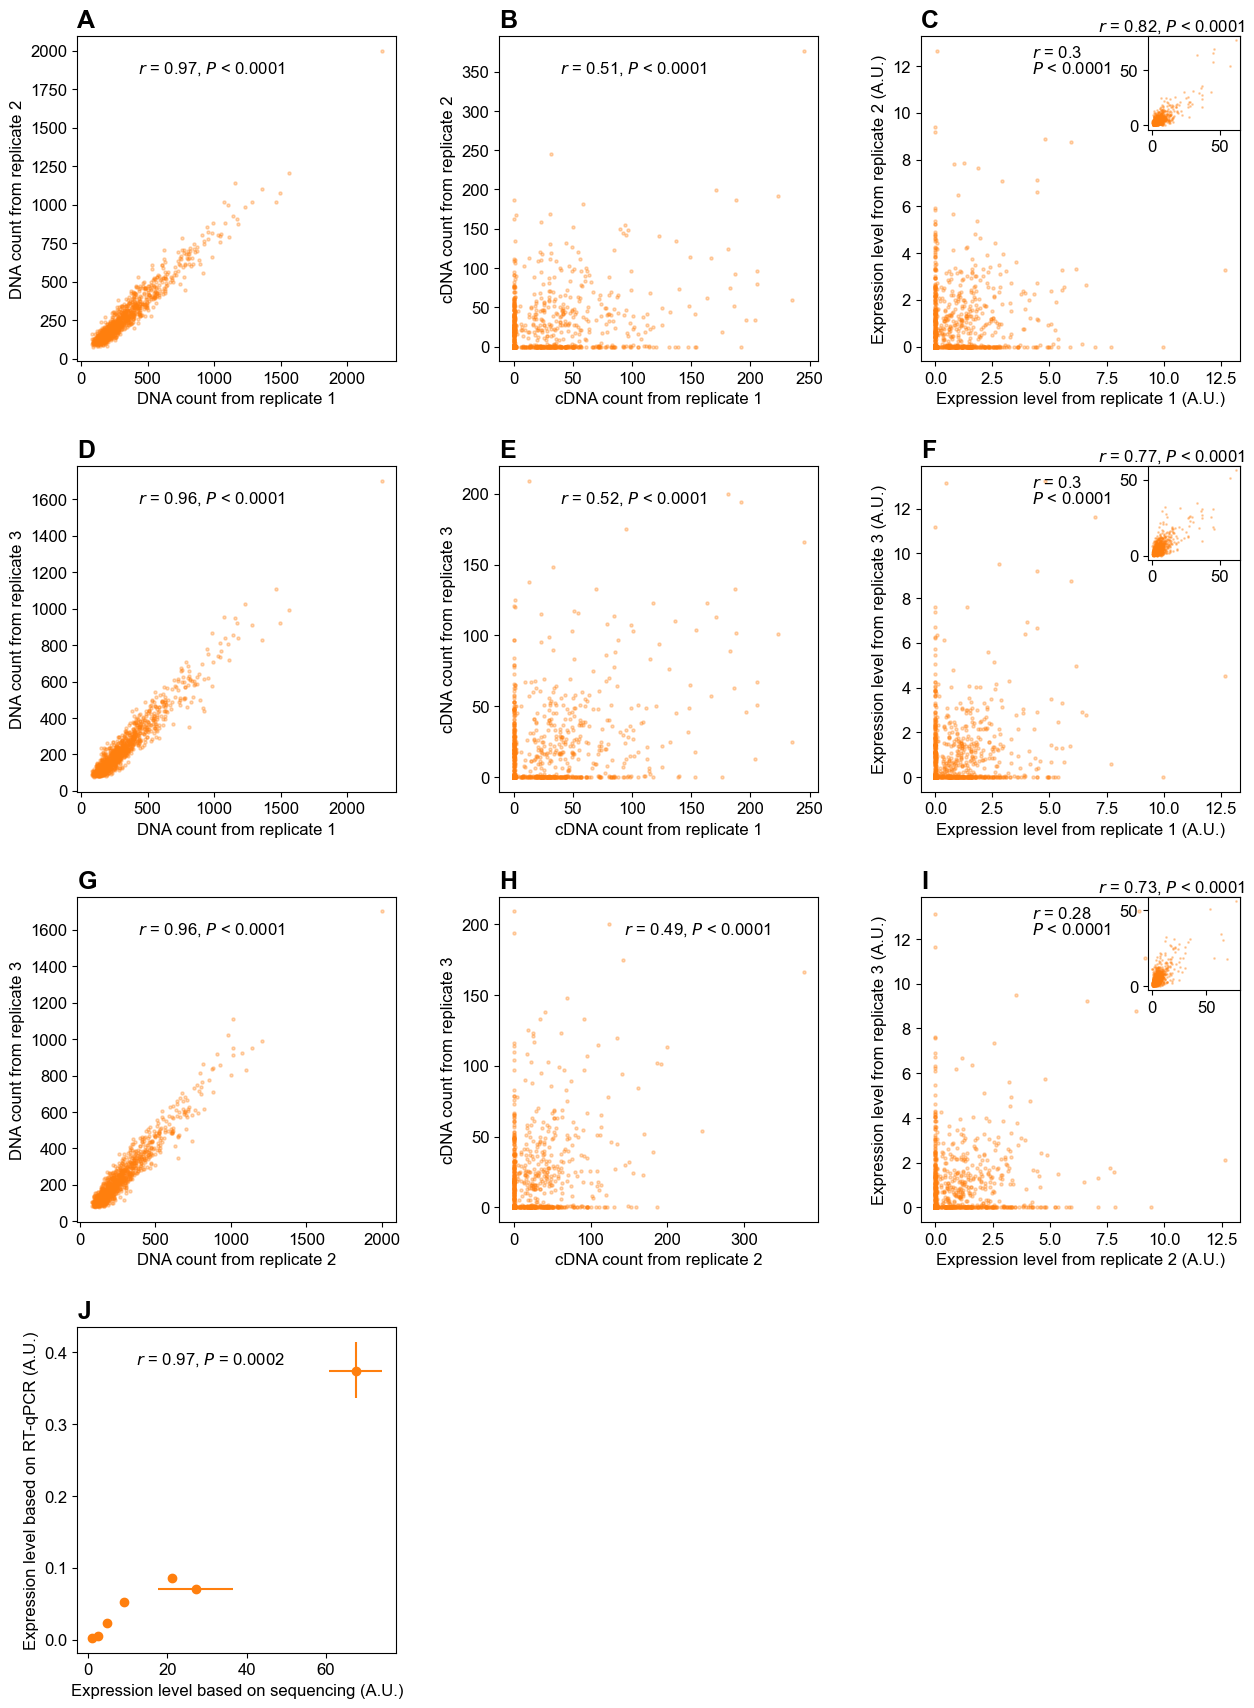

In [99]:
gs = gridspec.GridSpec(49, 36) 
fig1 = plt.figure(figsize=(15,21))
#Here I generate sub figure object and assign to corresponding location
# replicate 1 vs replicate 2
# DNA cor
ax1=fig1.add_subplot(gs[:10, :10])

ax1.scatter(SCD_expression_f100['DNA_relative_count_S1'][SCD_re_sampled],
            SCD_expression_f100['DNA_relative_count_S2'][SCD_re_sampled] ,s=5, color="tab:orange", alpha = 0.3)
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_xlabel('DNA count from replicate 1')
ax1.set_ylabel('DNA count from replicate 2')
ax1.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s3a,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)
# ax1.set(xlim=(-5,3000), ylim=(-5,3000))

ax2=fig1.add_subplot(gs[0:10, 13:23])
ax2.scatter(SCD_expression_f100['RNA_relative_count_S1'][SCD_re_sampled],
            SCD_expression_f100['RNA_relative_count_S2'][SCD_re_sampled],s =5 , color="tab:orange", alpha = 0.3)
ax2.set_title('B',weight='bold', loc='left', size= 18)
ax2.set_xlabel('cDNA count from replicate 1')
ax2.set_ylabel('cDNA count from replicate 2')
ax2.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s3b,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax3=fig1.add_subplot(gs[:10, 26:36])
ax3.scatter(SCD_expression_f100['S1_normalized_relative'][SCD_re_sampled],
            SCD_expression_f100['S2_normalized_relative'][SCD_re_sampled],s =5 , color="tab:orange", alpha = 0.3)
ax3.set_title('C',weight='bold', loc='left', size= 18)
ax3.set_xlabel('Expression level from replicate 1 (A.U.)')
ax3.set_ylabel('Expression level from replicate 2 (A.U.)')

ax3.text(0.35,0.95, "$\it{r}$ = "+str(round(temp_r_s3c,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.35,0.90, "$\it{P}$ < 0.0001", size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)


ax4=fig1.add_subplot(gs[:3, 33:36])


ax4.scatter(subset_S3['S1_normalized_relative'],subset_S3['S2_normalized_relative'],s=1, color="tab:orange", alpha = 0.3)
ax4.text(1.05,1.1, "$\it{r}$ = "+str(round(temp_r_s3c_x,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)


# replicate 1 vs replicate 3

ax1=fig1.add_subplot(gs[13:23, :10])

ax1.scatter(SCD_expression_f100['DNA_relative_count_S1'][SCD_re_sampled],
            SCD_expression_f100['DNA_relative_count_S3'][SCD_re_sampled] ,s =5 , color="tab:orange", alpha = 0.3)
ax1.set_title('D',weight='bold', loc='left', size= 18)
ax1.set_xlabel('DNA count from replicate 1')
ax1.set_ylabel('DNA count from replicate 3')
ax1.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s3d,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)
# ax1.set(xlim=(-5,3000), ylim=(-5,3000))

ax2=fig1.add_subplot(gs[13:23, 13:23])
ax2.scatter(SCD_expression_f100['RNA_relative_count_S1'][SCD_re_sampled],
            SCD_expression_f100['RNA_relative_count_S3'][SCD_re_sampled],s =5 , color="tab:orange", alpha = 0.3 )
ax2.set_title('E',weight='bold', loc='left', size= 18)
ax2.set_xlabel('cDNA count from replicate 1')
ax2.set_ylabel('cDNA count from replicate 3')
ax2.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s3e,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax3=fig1.add_subplot(gs[13:23, 26:36])
ax3.scatter(SCD_expression_f100['S1_normalized_relative'][SCD_re_sampled],
            SCD_expression_f100['S3_normalized_relative'][SCD_re_sampled],s =5 , color="tab:orange", alpha = 0.3 )
ax3.set_title('F',weight='bold', loc='left', size= 18)
ax3.set_xlabel('Expression level from replicate 1 (A.U.)')
ax3.set_ylabel('Expression level from replicate 3 (A.U.)')

ax3.text(0.35,0.95, "$\it{r}$ = "+str(round(temp_r_s3f,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.35,0.90, "$\it{P}$ < 0.0001", size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)


ax4=fig1.add_subplot(gs[13:16, 33:36])


ax4.scatter(subset_S3['S1_normalized_relative'],subset_S3['S3_normalized_relative'],s=1, color="tab:orange", alpha = 0.3)
ax4.text(1.05,1.1, "$\it{r}$ = "+str(round(temp_r_s3f_x,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)



# replicate 2 vs replicate 3


ax1=fig1.add_subplot(gs[26:36, :10])

ax1.scatter(SCD_expression_f100['DNA_relative_count_S2'][SCD_re_sampled],
            SCD_expression_f100['DNA_relative_count_S3'][SCD_re_sampled] ,s =5 , color="tab:orange", alpha = 0.3)
ax1.set_title('G',weight='bold', loc='left', size= 18)
ax1.set_xlabel('DNA count from replicate 2')
ax1.set_ylabel('DNA count from replicate 3')
ax1.text(0.65,0.9, "$\it{r}$ = "+str(round(temp_r_s3g,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)
# ax1.set(xlim=(-5,3000), ylim=(-5,3000))

ax2=fig1.add_subplot(gs[26:36, 13:23])
ax2.scatter(SCD_expression_f100['RNA_relative_count_S2'][SCD_re_sampled],
            SCD_expression_f100['RNA_relative_count_S3'][SCD_re_sampled],s =5 , color="tab:orange", alpha = 0.3 )
ax2.set_title('H',weight='bold', loc='left', size= 18)
ax2.set_xlabel('cDNA count from replicate 2')
ax2.set_ylabel('cDNA count from replicate 3')
ax2.text(0.85,0.9, "$\it{r}$ = "+str(round(temp_r_s3h,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax3=fig1.add_subplot(gs[26:36, 26:36])
ax3.scatter(SCD_expression_f100['S2_normalized_relative'][SCD_re_sampled],
            SCD_expression_f100['S3_normalized_relative'][SCD_re_sampled],s =5 , color="tab:orange", alpha = 0.3 )
ax3.set_title('I',weight='bold', loc='left', size= 18)
ax3.set_xlabel('Expression level from replicate 2 (A.U.)')
ax3.set_ylabel('Expression level from replicate 3 (A.U.)')

ax3.text(0.35,0.95, "$\it{r}$ = "+str(round(temp_r_s3i,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.35,0.90, "$\it{P}$ < 0.0001", size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)


ax4=fig1.add_subplot(gs[26:29, 33:36])


ax4.scatter(subset_S3['S2_normalized_relative'],subset_S3['S3_normalized_relative'],s=1, color="tab:orange", alpha = 0.3)
ax4.text(1.05,1.1, "$\it{r}$ = "+str(round(temp_r_s3i_x,2))+", " + "$\it{P}$" + " < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)


se_er_matrix=np.array([list(SCD_RT['dCT_fold_change']-SCD_RT['dCT_fold_change_min_se']),list(-SCD_RT['dCT_fold_change']+SCD_RT['dCT_fold_change_max_se'])])
ax5 = fig1.add_subplot(gs[39:49, :10])
ax5.text(0.65,0.9, "$\it{r}$ = "+str(round(t_SCD_RT,2))+", " + "$\it{P}$" + " = 0.0002", size=12, ha="right",verticalalignment='center', transform=ax5.transAxes)
ax5.errorbar(np.mean(SCD_RNAseq,axis=1),SCD_RT['dCT_fold_change'], xerr=np.std(SCD_RNAseq,axis=1,ddof=1)/(3**0.5),yerr=se_er_matrix,fmt="o", color="tab:orange")
ax5.set_title('J',weight='bold', loc='left', size= 18)
ax5.set_xlabel('Expression level based on sequencing (A.U.)')
ax5.set_ylabel('Expression level based on RT-qPCR (A.U.)')
# fig1.savefig(fig_output_address+'FigS4.pdf')

#### Resource_data_output

In [308]:
Recontructed_RD_SCD = pd.DataFrame({'Expression_mean': np.mean(SCD_RNAseq, axis=1),
                                'Expression_sem': np.std(SCD_RNAseq,axis=1,ddof=1)/(3**0.5),
                                'Construct_name': SCD_RT['Sample Name'].apply(lambda x: x.split('_RD')[0])
}) 

In [309]:
SCD_expression_f100.to_csv('Source_data/' + 'FigS4_SCD_expression.csv', index=False)
subset_S3.to_csv('Source_data/' + 'FigS4_SCD_expression_high_rna_subset.csv', index=False)

In [310]:
SCD_RT.to_csv('Source_data/' + 'FigS4_SCD_RTqPCR.csv', index=False)

In [311]:
Recontructed_RD_SCD.to_csv('Source_data/' + 'FigS4_SCD_reconstructed_promoters.csv', index=False)

-------

### 7.4 Figure S5: NC and PC control correlation 

* **<font color=blue>NC control and PC control</font>**

#### Plotting

Text(0.1, 0.95, 'Negative control')

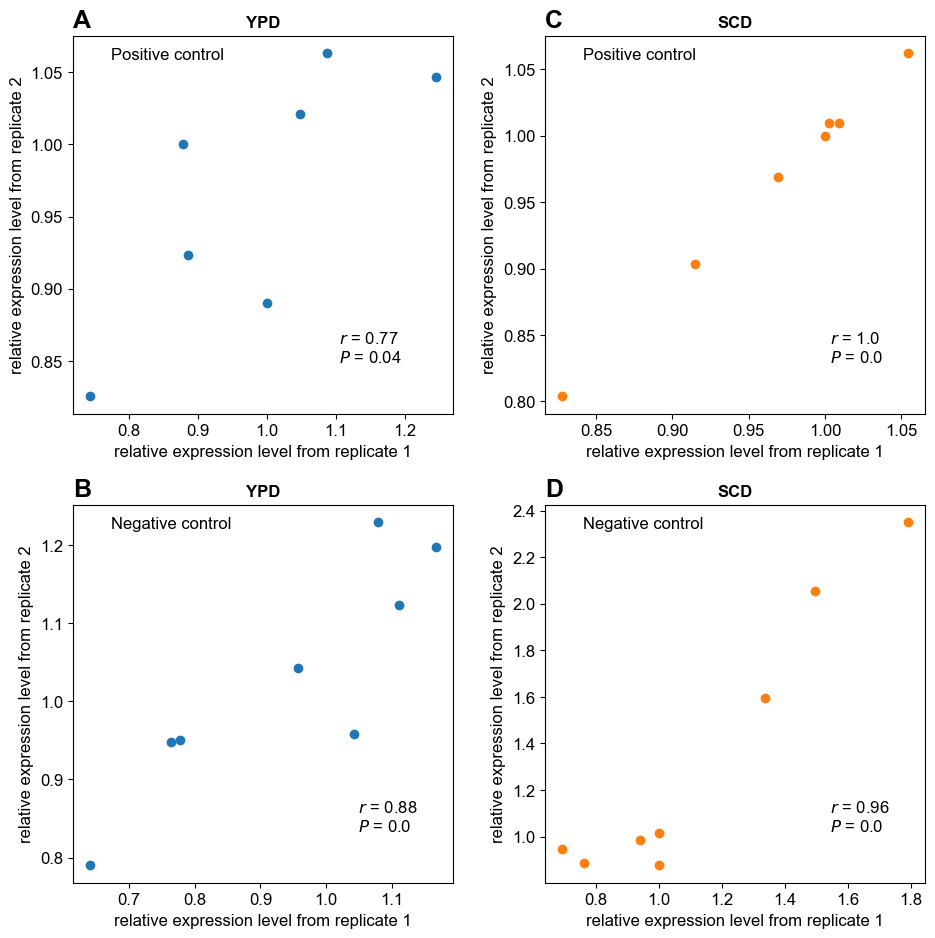

In [100]:
gs = gridspec.GridSpec(11, 11) 
fig1 = plt.figure(figsize=(11,11))

#Here I generate sub figure object and assign to corresponding location
# YPD

temp_r_S2_pc,temp_p_S2_pc = scipy.stats.pearsonr(YPD_expression_pc['S1_normalized_relative'],YPD_expression_pc['S2_normalized_relative'])

temp_r_S2_nc,temp_p_S2_nc = scipy.stats.pearsonr(YPD_expression_nc['S1_normalized_relative'],YPD_expression_nc['S2_normalized_relative'])
ax1=fig1.add_subplot(gs[:5, :5])

ax1.scatter(YPD_expression_pc['S1_normalized_relative']/YPD_expression_pc['S1_normalized_relative'].median(),
            YPD_expression_pc['S2_normalized_relative']/YPD_expression_pc['S2_normalized_relative'].median(),
           label = 'PC')
ax1.text(0.7,0.2, "$\it{r}$ = "+str(round(temp_r_S2_pc,2)), size=12, ha="left",verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.7,0.15,  "$\it{P}$ = "+str(round(temp_p_S2_pc,2)), size=12, ha="left",verticalalignment='center', transform=ax1.transAxes)
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_title('YPD',loc='center',weight = 'bold',size= 12)
ax1.set_xlabel('relative expression level from replicate 1')
ax1.set_ylabel('relative expression level from replicate 2')
ax1.text(0.1,0.95,'Positive control',size=12, ha="left",verticalalignment='center', transform=ax1.transAxes)


ax2=fig1.add_subplot(gs[6:11, :5])
ax2.scatter(YPD_expression_nc['S1_normalized_relative']/YPD_expression_nc['S1_normalized_relative'].median(),
            YPD_expression_nc['S2_normalized_relative']/YPD_expression_nc['S2_normalized_relative'].median(),
           label = 'NC')
ax2.set_title('B',weight='bold', loc='left', size= 18)
ax2.set_xlabel('relative expression level from replicate 1')
ax2.set_ylabel('relative expression level from replicate 2')
ax2.set_title('YPD',loc='center',weight = 'bold',size= 12)
ax2.text(0.75,0.2, "$\it{r}$ = "+str(round(temp_r_S2_nc,2)), size=12, ha="left",verticalalignment='center', transform=ax2.transAxes)
ax2.text(0.75,0.15,  "$\it{P}$ = "+str(round(temp_p_S2_nc,2)), size=12, ha="left",verticalalignment='center', transform=ax2.transAxes)
ax2.text(0.1,0.95,'Negative control',size=12, ha="left",verticalalignment='center', transform=ax2.transAxes)

temp_r_S2_pc,temp_p_S2_pc = scipy.stats.pearsonr(SCD_expression_pc['S1_normalized_relative'],SCD_expression_pc['S2_normalized_relative'])

temp_r_S2_nc,temp_p_S2_nc = scipy.stats.pearsonr(SCD_expression_nc['S1_normalized_relative'],SCD_expression_nc['S2_normalized_relative'])

# SCD
ax3=fig1.add_subplot(gs[:5, 6:11])
ax3.scatter(SCD_expression_pc['S1_normalized_relative']/SCD_expression_pc['S1_normalized_relative'].median(),
            SCD_expression_pc['S2_normalized_relative']/SCD_expression_pc['S2_normalized_relative'].median(),
           label = 'PC',color="tab:orange")
ax3.text(0.75,0.2, "$\it{r}$ = "+str(round(temp_r_S2_pc,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.text(0.75,0.15,  "$\it{P}$ = "+str(round(temp_p_S2_pc,2)), size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)
ax3.set_title('C',weight='bold', loc='left', size= 18)
ax3.set_title('SCD',loc='center',weight = 'bold',size = 12)
ax3.set_xlabel('relative expression level from replicate 1',size = 12)
ax3.set_ylabel('relative expression level from replicate 2',size = 12)
ax3.text(0.1,0.95,'Positive control',size=12, ha="left",verticalalignment='center', transform=ax3.transAxes)

ax4=fig1.add_subplot(gs[6:11, 6:11])
ax4.scatter(SCD_expression_nc['S1_normalized_relative']/SCD_expression_nc['S1_normalized_relative'].median(),
            SCD_expression_nc['S2_normalized_relative']/SCD_expression_nc['S2_normalized_relative'].median(),
           label = 'NC',color="tab:orange")
ax4.set_title('D',weight='bold', loc='left', size= 18)
ax4.set_xlabel('relative expression level from replicate 1',size = 12)
ax4.set_ylabel('relative expression level from replicate 2',size = 12)
ax4.set_title('SCD',loc='center',weight = 'bold',size= 12)
ax4.text(0.75,0.2, "$\it{r}$ = "+str(round(temp_r_S2_nc,2)), size=12, ha="left",verticalalignment='center', transform=ax4.transAxes)
ax4.text(0.75,0.15,  "$\it{P}$ = "+str(round(temp_p_S2_nc,2)), size=12, ha="left",verticalalignment='center', transform=ax4.transAxes)

ax4.text(0.1,0.95,'Negative control',size=12, ha="left",verticalalignment='center', transform=ax4.transAxes)
# fig1.savefig(fig_output_address+'FigS5.pdf')

#### Resource_data_output

In [313]:
YPD_expression_pc.reset_index().to_csv('Source_data/' + 'FigS5_YPD_pc_expression.csv', index=False)
YPD_expression_nc.reset_index().to_csv('Source_data/' + 'FigS5_YPD_nc_expression.csv', index=False)
SCD_expression_pc.reset_index().to_csv('Source_data/' + 'FigS5_SCD_pc_expression.csv', index=False)
SCD_expression_nc.reset_index().to_csv('Source_data/' + 'FigS5_SCD_nc_expression.csv', index=False)

----

### 7.5 Figure S6 : Different DNA cutoff on expression profile

In [314]:
# Different DNA cutoff on expression profile

In [315]:
SCD_summary_e = pd.read_csv(dr1+'SCD_RD_summary_median_total_dna_cutoff_extra.csv')  
YPD_summary_e = pd.read_csv(dr1+'YPD_RD_summary_median_total_dna_cutoff_extra.csv')

In [316]:
SCD_summary_e.DNA_cut_off.unique()

array([  1,   5,  10,  20,  50, 100, 200, 400])

In [317]:
temp_cut_control = 1.0
temp_cut_RNA = 0
temp_df_1 = SCD_summary_e[(SCD_summary_e['Percentile_of_PC']==temp_cut_control)&(SCD_summary_e['RNA_cut_off']==temp_cut_RNA)]
temp_df_2 = YPD_summary_e[(YPD_summary_e['Percentile_of_PC']==temp_cut_control)&(YPD_summary_e['RNA_cut_off']==temp_cut_RNA)]


In [318]:
temp_ff = ['DNA_cut_off', 'Total_barcode', 'Percentile_of_PC','better_than_pc_ratio','better_than_nc_ratio']

In [319]:
temp_df_1[temp_ff]

,DNA_cut_off,Total_barcode,Percentile_of_PC,better_than_pc_ratio,better_than_nc_ratio
9,1,239457,1.0,0.003145,0.357622
19,5,228399,1.0,0.001616,0.370759
29,10,220445,1.0,0.000848,0.379392
39,20,209146,1.0,0.000512,0.390416
49,50,182907,1.0,0.000328,0.406507
59,100,146291,1.0,0.000294,0.413450
69,200,87193,1.0,0.000333,0.416008
79,400,28752,1.0,0.000452,0.411415


#### Plotting

Text(0.5, 0, 'DNA count cutoff')

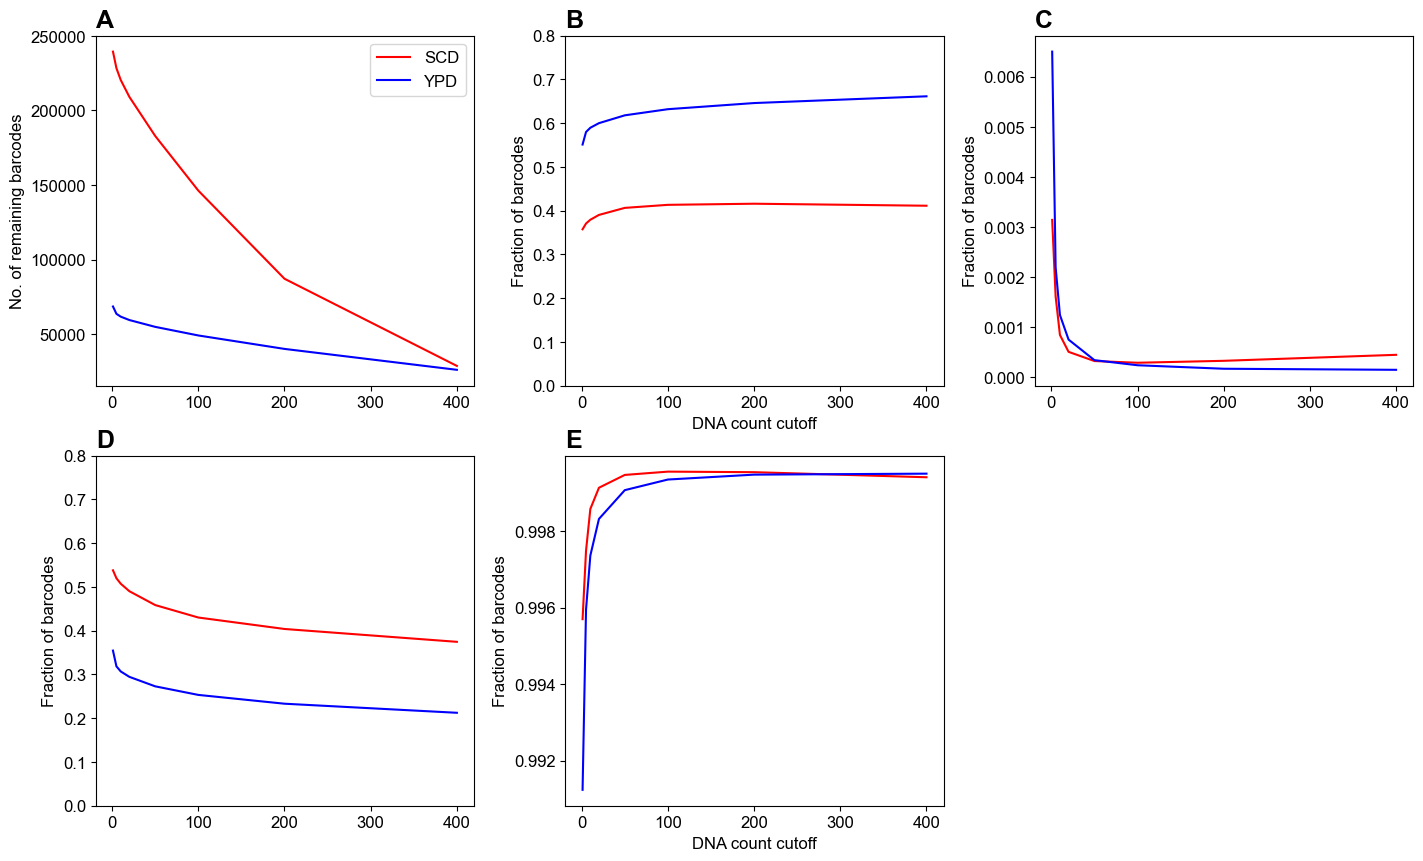

In [152]:
temp_cut_control = 1.0
temp_cut_RNA = 0
temp_df_1 = SCD_summary_e[(SCD_summary_e['Percentile_of_PC']==temp_cut_control)&(SCD_summary_e['RNA_cut_off']==temp_cut_RNA)]
temp_df_2 = YPD_summary_e[(YPD_summary_e['Percentile_of_PC']==temp_cut_control)&(YPD_summary_e['RNA_cut_off']==temp_cut_RNA)]

gs = gridspec.GridSpec(2, 17) 
fig1 = plt.figure(figsize=(17,10))
#Here I generate sub figure object and assign to corresponding location
ax1=fig1.add_subplot(gs[:1, :5])
ax1.plot(temp_df_1['DNA_cut_off'],temp_df_1['Total_barcode'],color="red",label= 'SCD')
ax1.plot(temp_df_2['DNA_cut_off'],temp_df_2['Total_barcode'],color="blue",label='YPD')
# ax1.plot(temp_df_3['DNA_cut_off'],temp_df_3['Total_barcode'],color="orange",label='YPD_old')
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_ylabel('No. of remaining barcodes')
ax1.legend(loc="upper right")

# ax1.axvline(x=10,color='k', linestyle='--')

ax2=fig1.add_subplot(gs[:1, 6:11])
ax2.set_title('B',weight='bold', loc='left', size= 18)
ax2.plot(temp_df_1['DNA_cut_off'],temp_df_1['better_than_nc_ratio'],color="red",label= 'SCD')
ax2.plot(temp_df_2['DNA_cut_off'],temp_df_2['better_than_nc_ratio'],color="blue",label='YPD_new')
# ax2.plot(temp_df_3['DNA_cut_off'],temp_df_3['better_than_nc_ratio'],color="orange",label='YPD_old')
ax2.set_ylim(0,0.8)
ax2.set_ylabel('Fraction of barcodes')
# ax2.axvline(x=10,color='k', linestyle='--')
ax2.set_xlabel('DNA count cutoff')

ax3=fig1.add_subplot(gs[:1, 12:17])
ax3.set_title('C',weight='bold', loc='left', size= 18)
ax3.plot(temp_df_1['DNA_cut_off'],temp_df_1['better_than_pc_ratio'],color="red",label= 'SCD')
ax3.plot(temp_df_2['DNA_cut_off'],temp_df_2['better_than_pc_ratio'],color="blue",label='YPD_new')
ax3.set_ylabel('Fraction of barcodes')
# ax3.plot(temp_df_3['DNA_cut_off'],temp_df_3['better_than_pc_ratio'],color="orange",label='YPD_old')

# ax3.set_title('Fraction of barcodes > positive control')
# ax3.axvline(x=10,color='k', linestyle='--')

ax4=fig1.add_subplot(gs[1:2, :5])
ax4.set_title('D',weight='bold', loc='left', size= 18)
ax4.plot(temp_df_1['DNA_cut_off'],temp_df_1['worse_than_nc_ratio'],color="red",label= 'SCD')
ax4.plot(temp_df_2['DNA_cut_off'],temp_df_2['worse_than_nc_ratio'],color="blue",label='YPD_new')
# ax4.plot(temp_df_3['DNA_cut_off'],temp_df_3['worse_than_nc_ratio'],color="orange",label='YPD_old')
ax4.set_ylabel('Fraction of barcodes')
ax4.set_ylim(0,0.8)
# ax4.set_title('Fraction of barcodes < negative control')
# ax4.axvline(x=10,color='k', linestyle='--')


ax5=fig1.add_subplot(gs[1:2, 6:11])
ax5.set_title('E',weight='bold', loc='left', size= 18)
ax5.set_ylabel('Fraction of barcodes')
ax5.plot(temp_df_1['DNA_cut_off'],temp_df_1['worse_than_pc_ratio'],color="red",label= 'SCD')
ax5.plot(temp_df_2['DNA_cut_off'],temp_df_2['worse_than_pc_ratio'],color="blue",label='YPD_new')
# ax5.plot(temp_df_3['DNA_cut_off'],temp_df_3['worse_than_pc_ratio'],color="orange",label='YPD_old')

# ax5.set_title('Fraction of barcodes < positive control')
ax5.set_xlabel('DNA count cutoff')
# ax5.axvline(x=10,color='k', linestyle='--')
# fig1.text(0.4, 0.92, 'PC cutoff of 1.0 and RNA_cutoff of 0', va='center', rotation='horizontal',fontsize=15)
# fig1.savefig(fig_output_address+'FigS6.pdf')

#### Resource_data_output

In [322]:
temp_list = [x for x in SCD_summary_e.columns.to_list() if '_list' in x]
SCD_summary_e.drop(columns = temp_list).to_csv(
    'Source_data/' + 'FigS6_SCD_RD_comparison_summary.csv', index=False)

In [323]:
temp_list = [x for x in YPD_summary_e.columns.to_list() if '_list' in x]
YPD_summary_e.drop(columns = temp_list).to_csv(
    'Source_data/' + 'FigS6_YPD_RD_comparison_summary.csv', index=False)

------

### 7.6 Fig S7: TATA box content and GC content of random promoter in SCD condition  

Text(0, 0.5, 'TATA box probability')

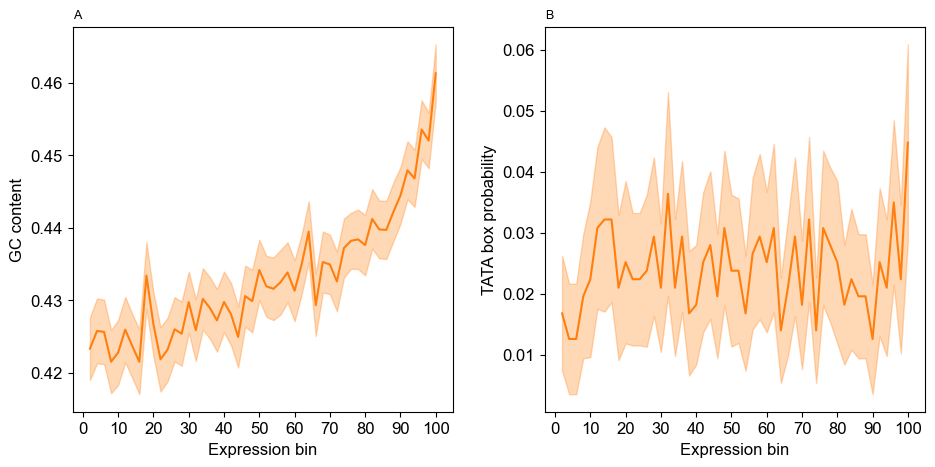

In [250]:
gs = gridspec.GridSpec(1, 11) 
fig1 = plt.figure(figsize=(11,5))
#Here I generate sub figure object and assign to corresponding location

#panel A for GC content on expression of YPD
ax1=fig1.add_subplot(gs[:1, :5])
ax1.set_title('A',loc='left',size = 9)
ax1.plot((p_3ab_SCD['quantile']+1)*2,p_3ab_SCD[('GC_content','mean')], color = 'tab:orange')
ax1.fill_between((p_3ab_SCD['quantile']+1)*2, p_3ab_SCD[('GC_content','mean')]-p_3ab_SCD[('GC_content','sem')]*1.96, 
                 p_3ab_SCD[('GC_content','mean')]+p_3ab_SCD[('GC_content','sem')]*1.96,alpha = 0.3,color = 'tab:orange')
ax1.set_xticks(np.arange(0, 110,10))
ax1.set_xlabel('Expression bin')
ax1.set_ylabel('GC content')
#panel A for GC content on expression of SCD
# ax1.plot((p_3ab_SCD['quantile']+1)*2,p_3ab_SCD[('GC_content','mean')], color = 'tab:orange')
# ax1.fill_between((p_3ab_SCD['quantile']+1)*2, p_3ab_SCD[('GC_content','mean')]-p_3ab_SCD[('GC_content','sem')]*1.96, p_3ab_SCD[('GC_content','mean')]+p_3ab_SCD[('GC_content','sem')]*1.96,alpha = 0.3)

# TATA box on expre
ax2=fig1.add_subplot(gs[:1, 6:11])
ax2.set_title('B',loc='left',size = 9)
ax2.plot((p_3ab_SCD['quantile']+1)*2,p_3ab_SCD[('TATA_box','mean')], color = 'tab:orange')
ax2.fill_between((p_3ab_SCD['quantile']+1)*2, p_3ab_SCD[('TATA_box','mean')]-p_3ab_SCD[('TATA_box','sem')]*1.96, 
                 p_3ab_SCD[('TATA_box','mean')]+p_3ab_SCD[('TATA_box','sem')]*1.96,alpha = 0.3,color = 'tab:orange')
ax2.set_xticks(np.arange(0, 110,10))
ax2.set_xlabel('Expression bin')
ax2.set_ylabel('TATA box probability')
# fig1.savefig(fig_output_address+'FigS7.pdf')

#### Resource_data_output

In [326]:
p_3ab_SCD_new = p_3ab_SCD.copy()
p_3ab_SCD_new.columns = p_3ab_SCD_new.columns.map('_'.join)
p_3ab_SCD_new = p_3ab_SCD_new.rename(columns = {'quantile_': 'quantile'})

In [327]:
p_3ab_SCD_new.to_csv('Source_data/' + 'FigS7_SCD_sequence_feature_quantile.csv', index=False)

### 7.7 Fig S8: TATA box content and GC content of native promoter starting from start codon

Text(0, 0.5, 'TATA box probability')

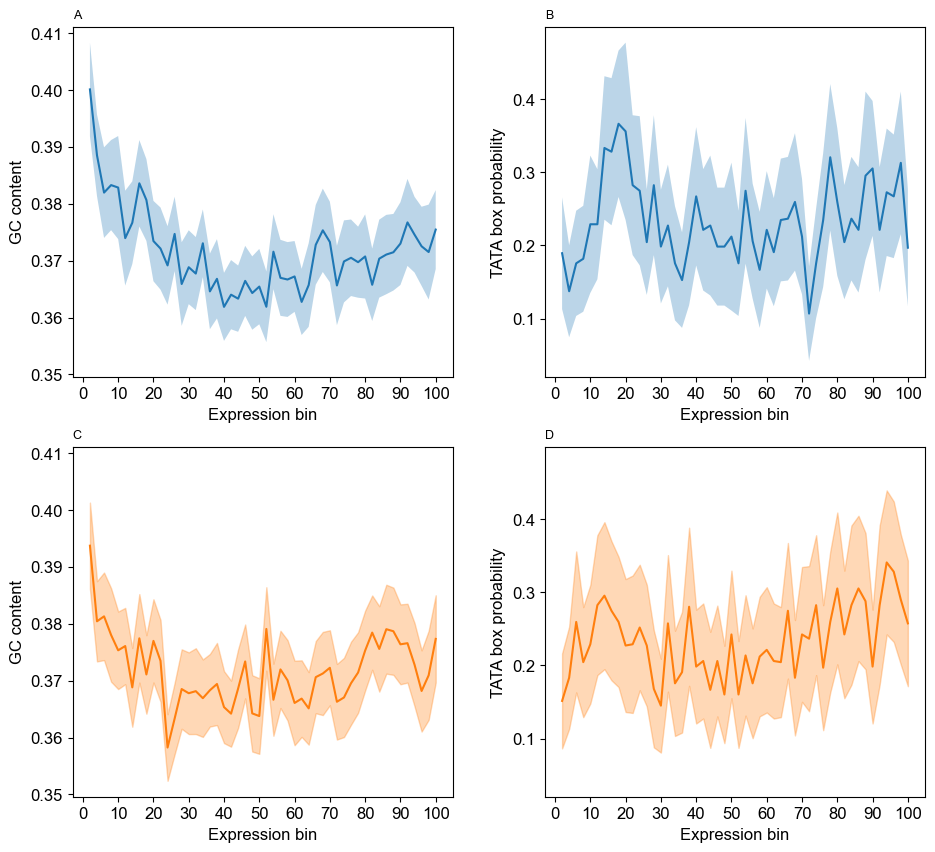

In [329]:
gs = gridspec.GridSpec(2, 11) 
fig1 = plt.figure(figsize=(11,10))
#Here I generate sub figure object and assign to corresponding location
temp_agg1=YPD_native_promoter_df1.groupby(['quantile'], as_index=False).agg({"GC_content":['mean','sem','std'],"TATA_box":['mean','sem','std']})
#panel A for GC content on expression of YPD
ax1=fig1.add_subplot(gs[:1, :5])
ax1.set_title('A',loc='left',size = 9)
ax1.plot((temp_agg1['quantile']+1)*2,temp_agg1[('GC_content','mean')], color = 'tab:blue')
ax1.fill_between((temp_agg1['quantile']+1)*2, temp_agg1[('GC_content','mean')]-temp_agg1[('GC_content','sem')]*1.96, temp_agg1[('GC_content','mean')]+temp_agg1[('GC_content','sem')]*1.96,alpha = 0.3)
ax1.set_xticks(np.arange(0, 110,10))
ax1.set_xlabel('Expression bin')
ax1.set_ylabel('GC content')
#panel A for GC content on expression of SCD
# ax1.plot((temp_agg1['quantile']+1)*2,temp_agg1[('GC_content','mean')], color = 'tab:orange')
# ax1.fill_between((temp_agg1['quantile']+1)*2, temp_agg1[('GC_content','mean')]-temp_agg1[('GC_content','sem')]*1.96, temp_agg1[('GC_content','mean')]+temp_agg1[('GC_content','sem')]*1.96,alpha = 0.3)

# TATA box on expre
ax2=fig1.add_subplot(gs[:1, 6:11])
ax2.set_title('B',loc='left',size = 9)
ax2.plot((temp_agg1['quantile']+1)*2,temp_agg1[('TATA_box','mean')], color = 'tab:blue')
ax2.fill_between((temp_agg1['quantile']+1)*2, temp_agg1[('TATA_box','mean')]-temp_agg1[('TATA_box','sem')]*1.96, temp_agg1[('TATA_box','mean')]+temp_agg1[('TATA_box','sem')]*1.96,alpha = 0.3)
ax2.set_xticks(np.arange(0, 110,10))
ax2.set_xlabel('Expression bin')
ax2.set_ylabel('TATA box probability')

temp_agg2=SCD_native_promoter_df1.groupby(['quantile'], as_index=False).agg({"GC_content":['mean','sem','std'],"TATA_box":['mean','sem','std']})

ax3=fig1.add_subplot(gs[1:2, :5],sharey=ax1)
ax3.set_title('C',loc='left',size = 9)
ax3.plot((temp_agg2['quantile']+1)*2,temp_agg2[('GC_content','mean')], color = 'tab:orange')
ax3.fill_between((temp_agg2['quantile']+1)*2, temp_agg2[('GC_content','mean')]-temp_agg2[('GC_content','sem')]*1.96,
                 temp_agg2[('GC_content','mean')]+temp_agg2[('GC_content','sem')]*1.96,alpha = 0.3, color = 'tab:orange')

ax3.set_xticks(np.arange(0, 110,10))
ax3.set_xlabel('Expression bin')
ax3.set_ylabel('GC content')
#panel A for GC content on expression of SCD
# ax1.plot((temp_agg2['quantile']+1)*2,temp_agg2[('GC_content','mean')], color = 'tab:orange')
# ax1.fill_between((temp_agg2['quantile']+1)*2, temp_agg2[('GC_content','mean')]-temp_agg2[('GC_content','sem')]*1.96, temp_agg2[('GC_content','mean')]+temp_agg2[('GC_content','sem')]*1.96,alpha = 0.3)

# TATA box on expre
ax4=fig1.add_subplot(gs[1:2, 6:11],sharey=ax2)
ax4.set_title('D',loc='left',size = 9)
ax4.plot((temp_agg2['quantile']+1)*2,temp_agg2[('TATA_box','mean')], color = 'tab:orange')
ax4.fill_between((temp_agg2['quantile']+1)*2, temp_agg2[('TATA_box','mean')]-temp_agg2[('TATA_box','sem')]*1.96,
                 temp_agg2[('TATA_box','mean')]+temp_agg2[('TATA_box','sem')]*1.96,alpha = 0.3, color = 'tab:orange')

ax4.set_xticks(np.arange(0, 110,10))
ax4.set_xlabel('Expression bin')
ax4.set_ylabel('TATA box probability')
# fig1.savefig(fig_output_address+'FigS8.pdf')

#### Resource_data_output

In [330]:
temp_agg1_new = temp_agg1.copy()
temp_agg1_new.columns = temp_agg1_new.columns.map('_'.join)
temp_agg1_new = temp_agg1_new.rename(columns = {'quantile_': 'quantile'})

In [331]:
temp_agg1_new.to_csv('Source_data/' + 'FigS8_YPD_native_promoter_sequence_feature_quantile.csv', index=False)

In [332]:
temp_agg2_new = temp_agg2.copy()
temp_agg2_new.columns = temp_agg2_new.columns.map('_'.join)
temp_agg2_new = temp_agg2_new.rename(columns = {'quantile_': 'quantile'})

In [333]:
temp_agg2_new.to_csv('Source_data/' + 'FigS8_SCD_native_promoter_sequence_feature_quantile.csv', index=False)

----

### 7.8 Figure S9: TATA box content and GC content of native promoter starting from TSS

In [334]:
# Get the sequence feature for them
Native_promoter_df2['TATA_box'] = Native_promoter_df2['sequence'].apply(lambda x: find_tata_box(str(x)))
Native_promoter_df2['A_f'] = Native_promoter_df2['sequence'].apply(lambda x:len(re.findall("[Aa]", x))/len(x))
Native_promoter_df2['T_f'] = Native_promoter_df2['sequence'].apply(lambda x:len(re.findall("[Tt]", x))/len(x))
Native_promoter_df2['G_f'] = Native_promoter_df2['sequence'].apply(lambda x:len(re.findall("[Gg]", x))/len(x))
Native_promoter_df2['C_f'] = Native_promoter_df2['sequence'].apply(lambda x:len(re.findall("[Cc]", x))/len(x))
Native_promoter_df2['GC_content'] = Native_promoter_df2['G_f'] + Native_promoter_df2['C_f']

In [335]:
# YPD condition

In [336]:
df1 = Native_promoter_df2
df2 = YPD_E_genic_average_ST[['Gene ID','Mean_TPM']]
P_merged=pd.merge(df1, df2, how='inner', on=['Gene ID'],
         left_index=False, right_index=False, sort=True, copy=True, indicator=False,
         validate=None)
YPD_native_promoter_df2 = P_merged

In [337]:
YPD_native_promoter_df2['quantile'] = pd.qcut(YPD_native_promoter_df2['Mean_TPM'].rank(method='first'), 50, labels=False,duplicates='drop')
# YPD_native_promoter_df2['quantile'] = pd.qcut(YPD_native_promoter_df2['mean_expression'], 50, labels=False,duplicates='drop')

In [338]:
print(scipy.stats.spearmanr(YPD_native_promoter_df2['GC_content'],YPD_native_promoter_df2['Mean_TPM']))

SpearmanrResult(correlation=0.026334278160117592, pvalue=0.04558259760967574)


In [339]:
print(scipy.stats.spearmanr((temp_agg['quantile']+1)*5,temp_agg[('GC_content','mean')]))

SpearmanrResult(correlation=0.9235534213685473, pvalue=1.2918308113588862e-21)


In [340]:
# SCD

In [341]:
df1 = Native_promoter_df2
df2 = SCD_E_genic_average_ST[['Gene ID','Mean_TPM']]
P_merged=pd.merge(df1, df2, how='inner', on=['Gene ID'],
         left_index=False, right_index=False, sort=True, copy=True, indicator=False,
         validate=None)
SCD_native_promoter_df2 = P_merged

In [342]:
print(scipy.stats.spearmanr(SCD_native_promoter_df2['GC_content'],SCD_native_promoter_df2['Mean_TPM']))

SpearmanrResult(correlation=0.06527403944299535, pvalue=7.053452470366575e-07)


In [343]:
print(scipy.stats.pearsonr(SCD_native_promoter_df2['GC_content'],SCD_native_promoter_df2['Mean_TPM']))

PearsonRResult(statistic=0.04516709970047224, pvalue=0.0006032728611045909)


In [344]:
SCD_native_promoter_df2['quantile'] = pd.qcut(SCD_native_promoter_df2['Mean_TPM'].rank(method='first'), 50, labels=False,duplicates='drop')
# SCD_native_promoter_df2['quantile'] = pd.qcut(SCD_native_promoter_df2['mean_expression'], 50, labels=False,duplicates='drop')

In [345]:
print(scipy.stats.spearmanr(SCD_native_promoter_df2['GC_content'],SCD_native_promoter_df2['Mean_TPM']))

SpearmanrResult(correlation=0.06527403944299535, pvalue=7.053452470366575e-07)


In [346]:
print(scipy.stats.spearmanr((temp_agg['quantile']+1)*5,temp_agg[('TATA_box','mean')]))

SpearmanrResult(correlation=0.08113082599817364, pvalue=0.5754138371727722)


In [347]:
print(scipy.stats.spearmanr((temp_agg['quantile']+1)*5,temp_agg[('GC_content','mean')]))

SpearmanrResult(correlation=0.9235534213685473, pvalue=1.2918308113588862e-21)


#### Plotting

Text(0, 0.5, 'TATA box probability')

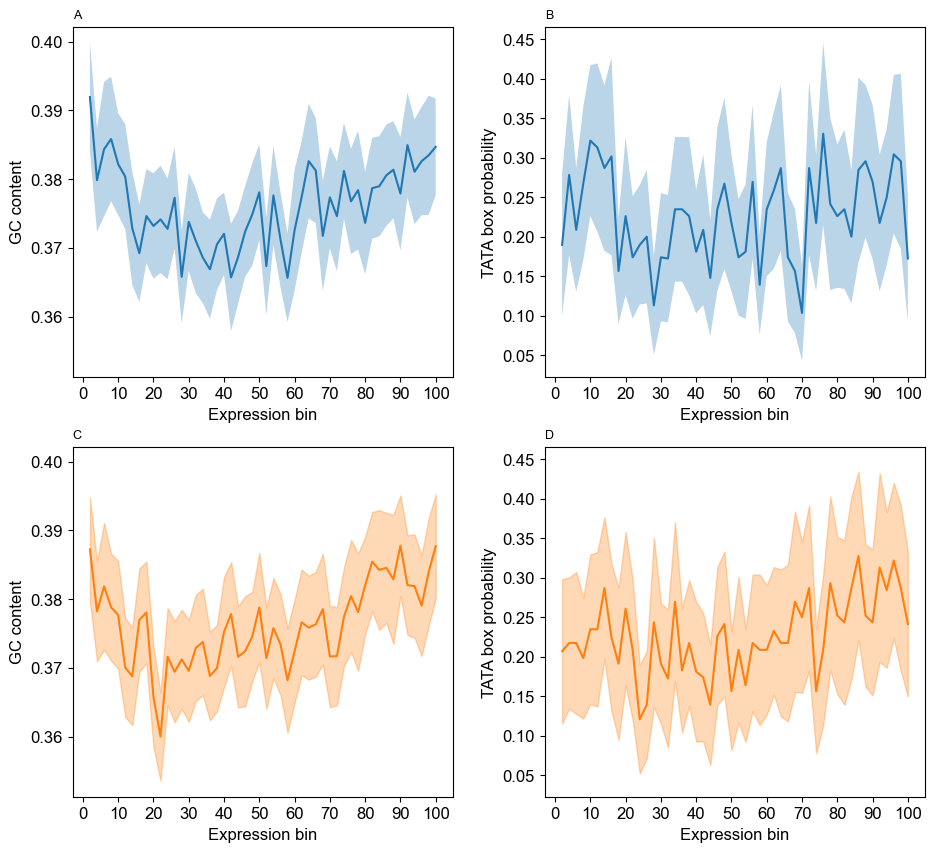

In [348]:
gs = gridspec.GridSpec(2, 11) 
fig1 = plt.figure(figsize=(11,10))
#Here I generate sub figure object and assign to corresponding location
temp_agg1=YPD_native_promoter_df2.groupby(['quantile'], as_index=False).agg({"GC_content":['mean','sem','std'],"TATA_box":['mean','sem','std']})
#panel A for GC content on expression of YPD
ax1=fig1.add_subplot(gs[:1, :5])
ax1.set_title('A',loc='left',size = 9)
ax1.plot((temp_agg1['quantile']+1)*2,temp_agg1[('GC_content','mean')], color = 'tab:blue')
ax1.fill_between((temp_agg1['quantile']+1)*2, temp_agg1[('GC_content','mean')]-temp_agg1[('GC_content','sem')]*1.96, temp_agg1[('GC_content','mean')]+temp_agg1[('GC_content','sem')]*1.96,alpha = 0.3)
ax1.set_xticks(np.arange(0, 110,10))
ax1.set_xlabel('Expression bin')
ax1.set_ylabel('GC content')
#panel A for GC content on expression of SCD
# ax1.plot((temp_agg1['quantile']+1)*2,temp_agg1[('GC_content','mean')], color = 'tab:orange')
# ax1.fill_between((temp_agg1['quantile']+1)*2, temp_agg1[('GC_content','mean')]-temp_agg1[('GC_content','sem')]*1.96, temp_agg1[('GC_content','mean')]+temp_agg1[('GC_content','sem')]*1.96,alpha = 0.3)

# TATA box on expre
ax2=fig1.add_subplot(gs[:1, 6:11])
ax2.set_title('B',loc='left',size =9)
ax2.plot((temp_agg1['quantile']+1)*2,temp_agg1[('TATA_box','mean')], color = 'tab:blue')
ax2.fill_between((temp_agg1['quantile']+1)*2, temp_agg1[('TATA_box','mean')]-temp_agg1[('TATA_box','sem')]*1.96, temp_agg1[('TATA_box','mean')]+temp_agg1[('TATA_box','sem')]*1.96,alpha = 0.3)
ax2.set_xticks(np.arange(0, 110,10))
ax2.set_xlabel('Expression bin')
ax2.set_ylabel('TATA box probability')

temp_agg2=SCD_native_promoter_df2.groupby(['quantile'], as_index=False).agg({"GC_content":['mean','sem','std'],"TATA_box":['mean','sem','std']})

ax3=fig1.add_subplot(gs[1:2, :5],sharey=ax1)
ax3.set_title('C',loc='left',size = 9)
ax3.plot((temp_agg2['quantile']+1)*2,temp_agg2[('GC_content','mean')], color = 'tab:orange')
ax3.fill_between((temp_agg2['quantile']+1)*2, temp_agg2[('GC_content','mean')]-temp_agg2[('GC_content','sem')]*1.96,
                 temp_agg2[('GC_content','mean')]+temp_agg2[('GC_content','sem')]*1.96,alpha = 0.3, color = 'tab:orange')

ax3.set_xticks(np.arange(0, 110,10))
ax3.set_xlabel('Expression bin')
ax3.set_ylabel('GC content')
#panel A for GC content on expression of SCD
# ax1.plot((temp_agg2['quantile']+1)*2,temp_agg2[('GC_content','mean')], color = 'tab:orange')
# ax1.fill_between((temp_agg2['quantile']+1)*2, temp_agg2[('GC_content','mean')]-temp_agg2[('GC_content','sem')]*1.96, temp_agg2[('GC_content','mean')]+temp_agg2[('GC_content','sem')]*1.96,alpha = 0.3)

# TATA box on expre
ax4=fig1.add_subplot(gs[1:2, 6:11],sharey=ax2)
ax4.set_title('D',loc='left',size = 9)
ax4.plot((temp_agg2['quantile']+1)*2,temp_agg2[('TATA_box','mean')], color = 'tab:orange')
ax4.fill_between((temp_agg2['quantile']+1)*2, temp_agg2[('TATA_box','mean')]-temp_agg2[('TATA_box','sem')]*1.96,
                 temp_agg2[('TATA_box','mean')]+temp_agg2[('TATA_box','sem')]*1.96,alpha = 0.3, color = 'tab:orange')

ax4.set_xticks(np.arange(0, 110,10))
ax4.set_xlabel('Expression bin')
ax4.set_ylabel('TATA box probability')
# fig1.savefig(fig_output_address+'FigS9.pdf')

#### Resource_data_output

In [349]:
temp_agg1_new = temp_agg1.copy()
temp_agg1_new.columns = temp_agg1_new.columns.map('_'.join)
temp_agg1_new = temp_agg1_new.rename(columns = {'quantile_': 'quantile'})

In [350]:
temp_agg1_new.to_csv('Source_data/' + 'FigS9_YPD_native_promoter_from_TSS_sequence_feature_quantile.csv', index=False)

In [351]:
temp_agg2_new = temp_agg2.copy()
temp_agg2_new.columns = temp_agg2_new.columns.map('_'.join)
temp_agg2_new = temp_agg2_new.rename(columns = {'quantile_': 'quantile'})

In [352]:
temp_agg2_new.to_csv('Source_data/' + 'FigS9_SCD_native_promoter_from_TSS_sequence_feature_quantile.csv', index=False)

-----

### 7.9 Figure S10: P value distribution for TFs

In [267]:
# Pvalue distribution for ScerTF 

Text(0.5, 0, 'P value')

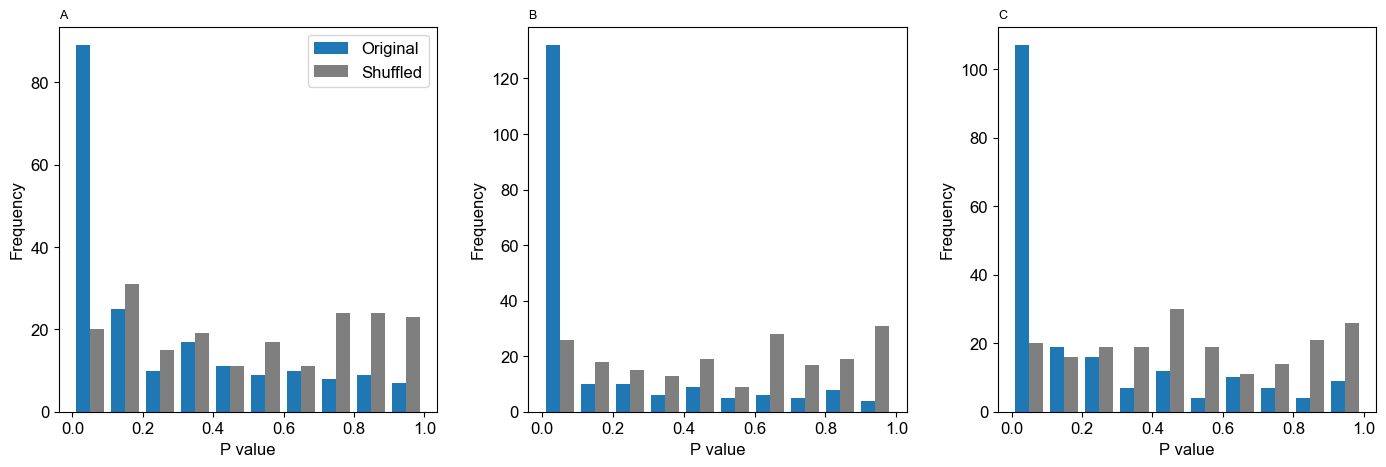

In [268]:
gs = gridspec.GridSpec(1, 17) 
fig1 = plt.figure(figsize=(17,5))
#Here I generate sub figure object and assign to corresponding location

# SCD forward
ax1=fig1.add_subplot(gs[:1, :5])
ax1.hist([SCD_s_df[1]['Ranksum_P_value'],SCD_s_shuffled_df[1]['Ranksum_P_value']],color = ['tab:blue','tab:grey'], label = ['Original','Shuffled'],bins = 10)
ax1.legend(loc='upper right')
ax1.set_title('A',loc='left',size = 9)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('P value')

# YPD reverse
ax2=fig1.add_subplot(gs[:1, 6:11])
ax2.hist([YPD_s_df[2]['Ranksum_P_value'],YPD_s_shuffled_df[2]['Ranksum_P_value']],color = ['tab:blue','tab:grey'], label = ['Original','Shuffled'],bins = 10)
# ax2.legend(loc='upper right')
ax2.set_title('B',loc='left',size = 9)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('P value')

# SCD reverse
ax3=fig1.add_subplot(gs[:1, 12:17])
ax3.hist([SCD_s_df[2]['Ranksum_P_value'],SCD_s_shuffled_df[2]['Ranksum_P_value']],color = ['tab:blue','tab:grey'], label = ['Original','Shuffled'],bins = 10)
# ax3.legend(loc='upper right')
ax3.set_title('C',loc='left',size = 9)
ax3.set_ylabel('Frequency')
ax3.set_xlabel('P value')
# fig1.savefig(fig_output_address+'FigS10.pdf')

#### Resource_data_output

In [353]:
YPD_s_df[2].to_csv('Source_data/' + 'FigS10_YPD_motif_reverse_significant.csv', index=False)

In [354]:
SCD_s_df[1].to_csv('Source_data/' + 'FigS10_SCD_motif_significant.csv', index=False)

In [355]:
SCD_s_df[2].to_csv('Source_data/' + 'FigS10_SCD_motif_reverse_significant.csv', index=False)

In [356]:
YPD_s_shuffled_df[2].to_csv('Source_data/' + 'FigS10_YPD_motif_reverse_significant_shuffled.csv', index=False)

In [357]:
SCD_s_shuffled_df[1].to_csv('Source_data/' + 'FigS10_SCD_motif_significant_shuffled.csv', index=False)

In [358]:
SCD_s_shuffled_df[2].to_csv('Source_data/' + 'FigS10_SCD_motif_reverse_significant_shuffled.csv', index=False)

----

### 7.10 Figure S11: Orientation specific effects for SCD

In [269]:
# Fig in both orientation

Text(0.95, 0.3, "Pearson'r = 0.2825, $\\it{P}$ value < 0.0001")

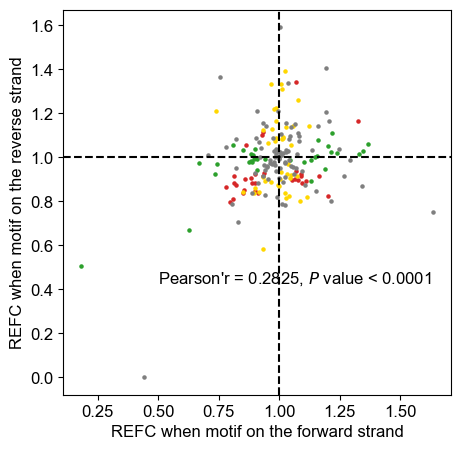

In [271]:
gs = gridspec.GridSpec(1, 5) 
fig1 = plt.figure(figsize=(5,5))
#Here I generate sub figure object 
ax4=fig1.add_subplot(gs[:1, :5])

input_df1 = SCD_strand_merge
filter1 = (input_df1['Significant_Forward']=='Yes')&(input_df1['Significant_Reverse']=='Yes')
filter2 = (input_df1['Significant_Forward']=='Yes')&(input_df1['Significant_Reverse']=='No')
filter3 = (input_df1['Significant_Forward']=='No')&(input_df1['Significant_Reverse']=='Yes')
filter4 = (input_df1['Significant_Forward']=='No')&(input_df1['Significant_Reverse']=='No')
ax4.scatter(input_df1.loc[filter1]['relative_fold_median_Forward'],input_df1.loc[filter1]['relative_fold_median_Reverse'], s=5, color = "tab:red")
ax4.scatter(input_df1.loc[filter2]['relative_fold_median_Forward'],input_df1.loc[filter2]['relative_fold_median_Reverse'], s=5, color = "tab:green")
ax4.scatter(input_df1.loc[filter3]['relative_fold_median_Forward'],input_df1.loc[filter3]['relative_fold_median_Reverse'], s=5, color = "gold")
ax4.scatter(input_df1.loc[filter4]['relative_fold_median_Forward'],input_df1.loc[filter4]['relative_fold_median_Reverse'], s=5, color = "tab:grey")
# ax4.set_title('D',loc='left',size = 9)
ax4.axvline(x=1,color='black', linestyle='--')
ax4.axhline(y=1,color='black', linestyle='--')
ax4.set_xlabel("REFC when motif on the forward strand")
ax4.set_ylabel("REFC when motif on the reverse strand")
ax4.text(0.95,0.3, "Pearson'r = "+str(round(p3e_SCD_r,4))+ ", $\it{P}$ value < 0.0001", size=12, ha="right",verticalalignment='center', transform=ax4.transAxes)

# ax5=fig1.add_subplot(gs[:1, 6:11])
# input_df1 = YPD_strand_merge
# filter1 = (input_df1['Significant_Forward']=='Yes')&(input_df1['Significant_Reverse']=='Yes')

# ax5.scatter(input_df1.loc[filter1]['relative_fold_median_Forward'],input_df1.loc[filter1]['relative_fold_median_Reverse'], s=5, color = "tab:red")
# ax5.axvline(x=1,color='black', linestyle='--')
# ax5.axhline(y=1,color='black', linestyle='--')
# ax5.set_xlabel("REFC when motif on the forward strand")
# ax5.set_ylabel("REFC when motif on the reverse strand")

# ax6=fig1.add_subplot(gs[:1, 12:17])

# input_df1 = SCD_strand_merge
# filter1 = (input_df1['Significant_Forward']=='Yes')&(input_df1['Significant_Reverse']=='Yes')

# ax6.scatter(input_df1.loc[filter1]['relative_fold_median_Forward'],input_df1.loc[filter1]['relative_fold_median_Reverse'], s=5, color = "tab:red")
# ax6.axvline(x=1,color='black', linestyle='--')
# ax6.axhline(y=1,color='black', linestyle='--')
# ax6.set_xlabel("REFC when motif on the forward strand")
# ax6.set_ylabel("REFC when motif on the reverse strand")
# print(scipy.stats.pearsonr(input_df1['relative_fold_median_Forward'],input_df1['relative_fold_median_Reverse']))
# fig1.savefig(fig_output_address+'FigS11.pdf')

#### Resource_data_output

In [359]:
SCD_strand_merge.to_csv('Source_data/' + 'FigS11_SCD_motif_strand_specific_effect.csv', index=False)

----

### 7.11 Figure S12:Environmental effect is small

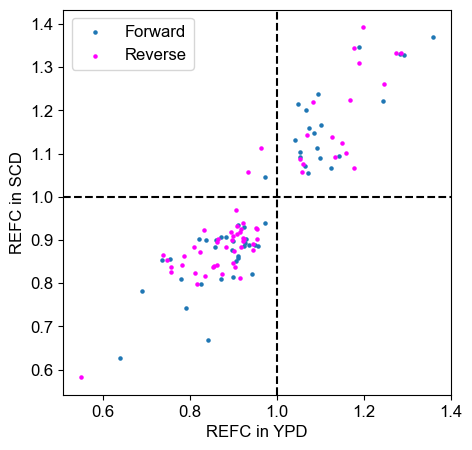

In [272]:
gs = gridspec.GridSpec(1, 1) 
fig1 = plt.figure(figsize=(5,5))
ax6=fig1.add_subplot(gs[:1, 0:1])

input_df1 = F_strand_merge
filter1 = (input_df1['Significant_YPD']=='Yes')&(input_df1['Significant_SCD']=='Yes')

ax6.scatter(input_df1.loc[filter1]['relative_fold_median_YPD'],input_df1.loc[filter1]['relative_fold_median_SCD'], s=5, color = "tab:blue",label ='Forward')


# ax6.set_title('F',loc='left',size = 9)
ax6.axvline(x=1,color='black', linestyle='--')
ax6.axhline(y=1,color='black', linestyle='--')
ax6.set_xlabel("REFC in YPD")
ax6.set_ylabel("REFC in SCD")
# ax1.set_xscale('log',base = 2)
# ax1.set_yscale('log',base = 2)

input_df1 = R_strand_merge
filter2= (input_df1['Significant_YPD']=='Yes')&(input_df1['Significant_SCD']=='Yes')
# filter2 = (input_df1['Significant_YPD']=='Yes')&(input_df1['Significant_SCD']=='No')
# filter3 = (input_df1['Significant_YPD']=='No')&(input_df1['Significant_SCD']=='Yes')
# filter4 = (input_df1['Significant_YPD']=='No')&(input_df1['Significant_SCD']=='No')
ax6.scatter(input_df1.loc[filter2]['relative_fold_median_YPD'],input_df1.loc[filter2]['relative_fold_median_SCD'], s=5, color = "fuchsia",label ='Reverse')
ax6.legend(loc="upper left")
# fig1.savefig(fig_output_address+'FigS12.pdf')

#### Resource_data_output

In [361]:
F_strand_merge.to_csv('Source_data/' + 'FigS12_Forward_motif_merge.csv', index=False)

In [362]:
R_strand_merge.to_csv('Source_data/' + 'FigS12_Reverse_motif_merge.csv', index=False)

----

### 7.12 Table S2 : Comparing RD to genic expression 

In [153]:
RD_input_data = p_2b_SCD_100['log_expression']
RNA_input_data = SCD_E_genic_average['log_expression']
RD_quantile = np.percentile(RD_input_data, list(np.linspace(10,100,10)))
temp_out = []
for x in RD_quantile:
    temp_out.append(sum(RNA_input_data<x)/len(RNA_input_data))
SCD_s_output = pd.DataFrame({'RD_expression_percentile': list(np.linspace(10,100,10)),
                         'Genic_expression_percentile':np.array(temp_out)*100})

In [154]:
SCD_s_output

,RD_expression_percentile,Genic_expression_percentile
0,10.0,0.000000
1,20.0,1.772115
2,30.0,4.906268
3,40.0,6.429408
4,50.0,7.513181
5,60.0,8.391916
6,70.0,9.065612
7,80.0,10.383714
8,90.0,12.258348
9,100.0,85.720562


In [155]:
RD_input_data = p_2a_YPD_100['log_expression']
RNA_input_data = YPD_E_genic_average['log_expression']
RD_quantile = np.percentile(RD_input_data, list(np.linspace(10,100,10)))
temp_out = []
for x in RD_quantile:
    temp_out.append(sum(RNA_input_data<x)/len(RNA_input_data))
YPD_s_output = pd.DataFrame({'RD_expression_percentile': list(np.linspace(10,100,10)),
                         'Genic_expression_percentile':np.array(temp_out)*100})

In [156]:
YPD_s_output

,RD_expression_percentile,Genic_expression_percentile
0,10.0,9.929701
1,20.0,11.848272
2,30.0,13.283538
3,40.0,14.543058
4,50.0,15.641476
5,60.0,16.388401
6,70.0,17.281781
7,80.0,18.526655
8,90.0,20.547745
9,100.0,85.090803


----

### 7.13 Figure S14

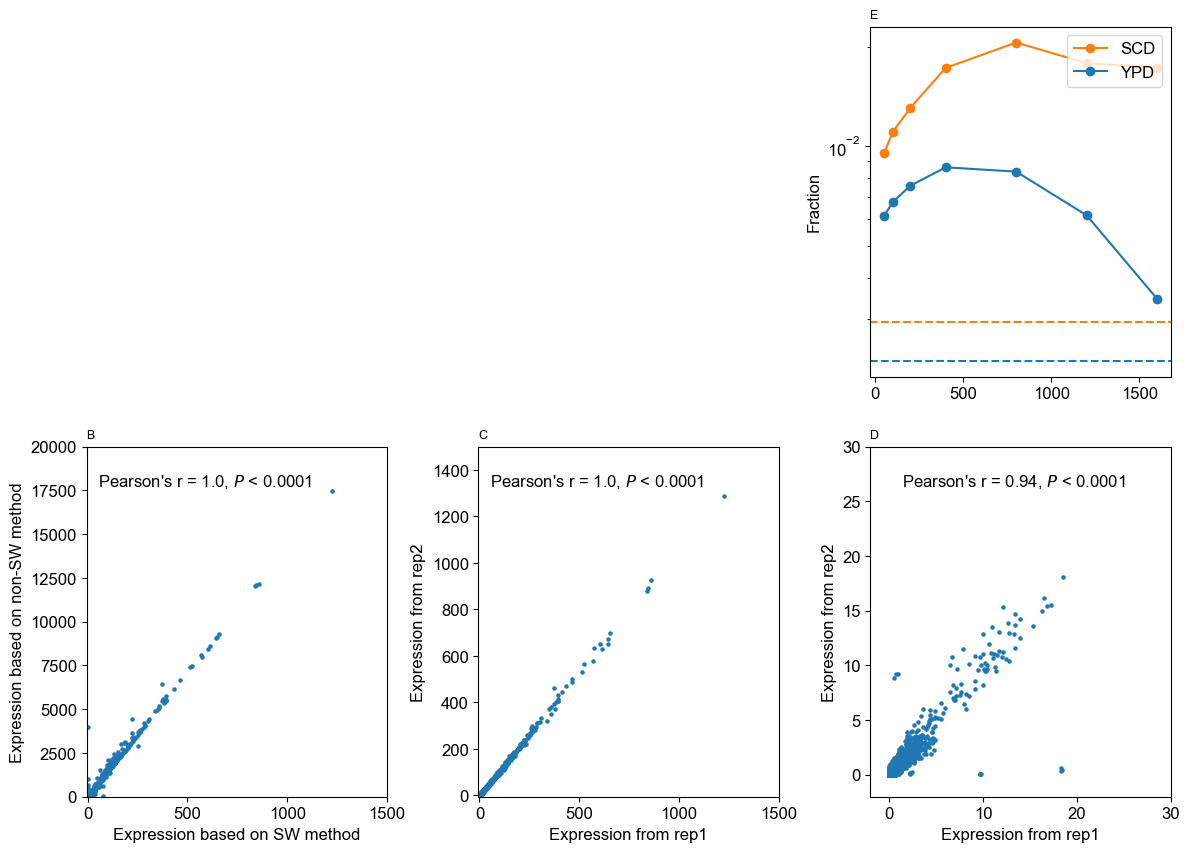

In [374]:

# I resample a promoter set y that has the same DNA count profile as X and check their expression profile.
gs = gridspec.GridSpec(2, 15) 
fig3 = plt.figure(figsize=(15,10))
#Here I generate sub figure object and assign to corresponding location
ax1 = fig3.add_subplot(gs[1:2, 1:5])
# ax8.text(0.45,0.9, "Pearson's r = "+str(round(t_SCD_RT,4)), size=12, ha="right",verticalalignment='center', transform=ax6.transAxes)

temp_shared=list(set(list(YPD_E_genic_dic[YPD_name_list[0]].index))&set(list(YPD_E_genic_ST_dic[YPD_name_list[0]].index)))
r_YPD,p_YPD = scipy.stats.pearsonr(YPD_E_genic_dic.get('SRR5766520').loc[temp_shared,'Normalized_count_perM'].tolist(),
            YPD_E_genic_ST_dic.get('SRR5766520').loc[temp_shared,'TPM'].tolist())
# I did log transformation, which mean I get rid of zero expression
ax1.scatter(YPD_E_genic_dic.get('SRR5766520').loc[temp_shared,'Normalized_count_perM'].tolist(),
            YPD_E_genic_ST_dic.get('SRR5766520').loc[temp_shared,'TPM'].tolist(),s=5)
ax1.set_xlabel('Expression based on SW method')
ax1.set_ylabel('Expression based on non-SW method')
ax1.set(xlim=(-5,1500), ylim=(-5,20000))
# ax1.scatter(np.log10(YPD_E_genic_dic.get('SRR5766520').loc[temp_shared,'Normalized_count_perM'].tolist()),
#             np.log10(YPD_E_genic_ST_dic.get('SRR5766520').loc[temp_shared,'TPM'].tolist()))
# ax1.set_xlabel('Expression based on SW method (log10)')
# ax1.set_ylabel('Expression based on non-SW method (log10)')

ax1.set_title('B',loc='left',size = 9)




ax1.text(0.75,0.9, "Pearson's r = "+str(round(r_YPD,2))+", " + "$\it{P}$" + " < 0.0001",  size=12, ha="right",verticalalignment='center', transform=ax1.transAxes)


# correlation between YPD samples of genic
temp_vec = []
for x in YPD_E_genic_dic.values():
    temp_vec.append(x['Normalized_count_perM'].tolist())

temp_r1,temp_p1 = scipy.stats.pearsonr(temp_vec[0],temp_vec[1])


ax2 = fig3.add_subplot(gs[1:2, 6:10])
ax2.text(0.75,0.9, "Pearson's r = "+str(round(temp_r1,2))+", " + "$\it{P}$" + " < 0.0001",  size=12, ha="right",verticalalignment='center', transform=ax2.transAxes)

ax2.scatter(temp_vec[0],temp_vec[1],s=5)
ax2.set_ylabel('Expression from rep2')
ax2.set_xlabel('Expression from rep1')
ax2.set(xlim=(-5,1500), ylim=(-5,1500))

# ax2.scatter(np.log10(temp_vec[0]),np.log10(temp_vec[1]))
# ax2.set_ylabel('Log(expression) from rep2')
# ax2.set_xlabel('Log(expression) from rep1')

ax2.set_title('C',loc='left',size = 9)

# correlation between YPD samples of intergenic
temp_vec = []
for x in YPD_name_list:
    sub_x = YPD_E_intergenic_dic.get(x).get((200,'V1'))
    temp_vec.append(sub_x['Normalized_count_perM'].tolist())

temp_r1,temp_p1 = scipy.stats.pearsonr(temp_vec[0],temp_vec[1])


ax3 = fig3.add_subplot(gs[1:2, 11:15])
ax3.text(0.85,0.9, "Pearson's r = "+str(round(temp_r1,2))+", " + "$\it{P}$" + " < 0.0001",  size=12, ha="right",verticalalignment='center', transform=ax3.transAxes)

ax3.scatter(temp_vec[0],temp_vec[1],s=5)
ax3.set_ylabel('Expression from rep2')
ax3.set_xlabel('Expression from rep1')
ax3.set(xlim=(-2,30), ylim=(-2,30))

# ax3.scatter(np.log10(temp_vec[0]),np.log10(temp_vec[1]))
# ax3.set_ylabel('Log(expression) from rep2')
# ax3.set_xlabel('Log(expression) from rep1')

ax3.set_title('D',loc='left',size = 9)




input_Control_percentile = 1.0
input_df = SCD_PC_V1[SCD_PC_V1['Control_percentile'] == input_Control_percentile]
input_df_2 = YPD_PC_V1[YPD_PC_V1['Control_percentile'] == input_Control_percentile]
ax4 = fig3.add_subplot(gs[:1, 11:15])
ax4.plot(input_df['UTR_length'], input_df['More_than_Control_FDR_fraction'],  '-o',label = 'SCD',color = 'tab:orange')
ax4.plot(input_df_2['UTR_length'], input_df_2['More_than_Control_FDR_fraction'],  '-o',label = 'YPD',color = 'tab:blue')

ax4.set_title('E',loc='left',size = 9)
ax4.set_ylabel('Fraction')
ax4.set_yscale('log',base = 10)
ax4.legend(loc='upper right')
# this specify the fraction of promoter>PC in YPD in rd project
ax4.axhline(y=0.00224,color = 'tab:blue', linestyle='--')
ax4.axhline(y=0.00294,color = 'tab:orange', linestyle='--')
# fig3.savefig(fig_output_address+'New Folder/FigS14_part.pdf')

#### Resource_data_output

In [381]:
YPD_name_list =  ['SRR5766520','SRR5766521','SRR5766522','SRR5766523','SRR5766524','SRR5766525','SRR5766547','SRR5766548','SRR5766567','SRR5766568']

In [382]:
temp_shared=list(set(list(YPD_E_genic_dic[YPD_name_list[0]].index))&set(list(YPD_E_genic_ST_dic[YPD_name_list[0]].index)))

In [383]:
YPD_E_genic_SL_shared_example = YPD_E_genic_dic.get('SRR5766520').loc[temp_shared].reset_index()
YPD_E_genic_ST_shared_example = YPD_E_genic_ST_dic.get('SRR5766520').loc[temp_shared].reset_index()

In [384]:
YPD_E_genic_SL_example1 = YPD_E_genic_dic.get('SRR5766520').reset_index()
YPD_E_genic_SL_example2 = YPD_E_genic_dic.get('SRR5766521').reset_index()

In [385]:
YPD_E_intergenic_SL_example1 = YPD_E_intergenic_dic.get('SRR5766520').get((200,'V1')).reset_index()
YPD_E_intergenic_SL_example2 = YPD_E_intergenic_dic.get('SRR5766521').get((200,'V1')).reset_index()

In [386]:
YPD_E_genic_SL_shared_example.to_csv('Source_data/' + 'FigS14_YPD_genic_SL_shared_example.csv', index=False)
YPD_E_genic_ST_shared_example.to_csv('Source_data/' + 'FigS14_YPD_genic_ST_shared_example.csv', index=False)

In [387]:
YPD_E_genic_SL_example1.to_csv('Source_data/' + 'FigS14_YPD_genic_SL_example1.csv', index=False)
YPD_E_genic_SL_example2.to_csv('Source_data/' + 'FigS14_YPD_genic_SL_example2.csv', index=False)

In [388]:
YPD_E_intergenic_SL_example1.to_csv('Source_data/' + 'FigS14_YPD_intergenic_SL_example1.csv', index=False)
YPD_E_intergenic_SL_example2.to_csv('Source_data/' + 'FigS14_YPD_intergenic_SL_example2.csv', index=False)

In [389]:
temp_list = [x for x in input_df if '_list' not in x]
input_df[temp_list].to_csv('Source_data/' + 'FigS14_SCD_Intergenic_comparison_test.csv', index=False)

In [390]:
temp_list = [x for x in input_df_2 if '_list' not in x]
input_df_2[temp_list].to_csv('Source_data/' + 'FigS14_YPD_Intergenic_comparison_test.csv', index=False)

----

### 7.14 Figure S15

/var/folders/xv/26kbh4lj2rjdcrxz37m9wxyw0000gn/T/ipykernel_59845/2662707952.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(temp_tick_list, size =10)


Text(0.5, 0, '$\\it{REL}$ cutoff')

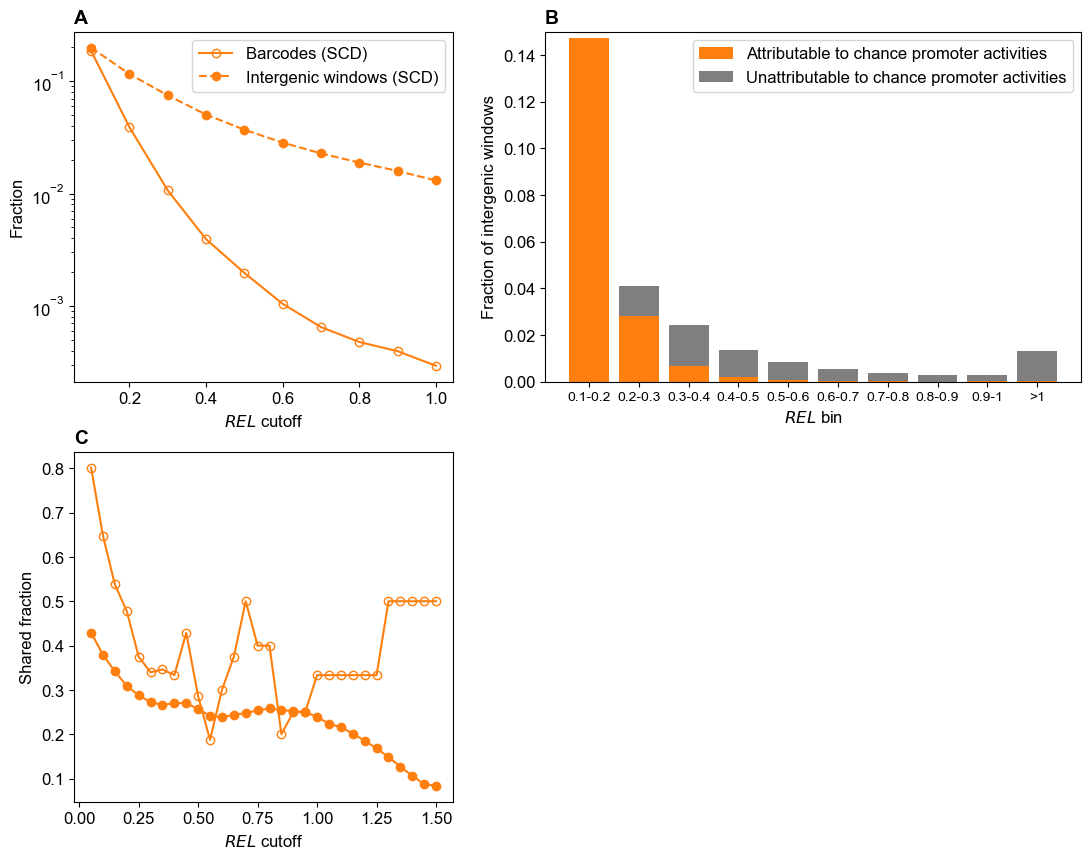

In [393]:
gs = gridspec.GridSpec(2, 13) 
fig1 = plt.figure(figsize=(13,10))
#Here I generate sub figure object and assign to corresponding location

#panel A for SCD expression distribution

ax3=fig1.add_subplot(gs[:1, :5])

ax3.set_title('A',loc='left',weight ='bold', size = 14)
ax3.plot(p_c_rd_SCD['Percentile_of_PC'], p_c_rd_SCD['better_than_pc_ratio'],  
         marker=MarkerStyle('o', fillstyle='none'),label = 'Barcodes (SCD)',color ='tab:orange')

ax3.plot(p_c_RNAseq_SCD['Control_percentile'], p_c_RNAseq_SCD['More_than_Control_FDR_fraction'],
         '--o', label = 'Intergenic windows (SCD)',color ='tab:orange')


# ax3.set_title('Greater than PC',fontsize=20)
ax3.set_xlabel("$\it{REL}$ cutoff")
ax3.set_ylabel("Fraction")
ax3.legend(loc="upper right")
ax3.set_yscale('log',base=10)

# temp_tick_list = []
# a=ax3.get_xticks().tolist()
# for sub_label in a:
#     new_label = '>' + str(round(sub_label)/100) 
#     temp_tick_list.append(new_label )
# ax3.set_xticklabels(temp_tick_list)



ax4=fig1.add_subplot(gs[:1, 6:13])
temp_interval = 0


tempx_list = [str(x) for x in SCD_RNA_fraction['bins'][temp_interval:]]
ax4.bar(tempx_list, SCD_rd_fraction['Fraction'][temp_interval:],
        color = 'tab:orange',label = 'Attributable to chance promoter activities')
temp_input_list = (np.array(SCD_RNA_fraction['Fraction'])[temp_interval:]-np.array(SCD_rd_fraction['Fraction'])[temp_interval:])
temp_input_list[temp_input_list<0] = 0
ax4.bar(tempx_list,temp_input_list,
        color = 'tab:grey',bottom = SCD_rd_fraction['Fraction'][temp_interval:],
        label = 'Unattributable to chance promoter activities')
ax4.set_ylabel('Fraction of intergenic windows')
ax4.legend(loc="upper right")
ax4.set_title('B',loc='left',weight ='bold', size = 14)
ax4.set_xlabel('$\it{REL}$ bin')
ax4.set_ylim(0,0.15)
# temp_tick_list = ['20-30%','30-40%','40-50%','50-60%',
#                  '60-70%','70-80%','80-90%','90-100%','>100%']
temp_tick_list = ['0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6',
                 '0.6-0.7','0.7-0.8','0.8-0.9','0.9-1','>1']


ax4.set_xticklabels(temp_tick_list, size =10)

# correlation of nearby genes
ax5=fig1.add_subplot(gs[1:2, :5])

ax5.set_title('C',loc='left',weight ='bold', size = 14)
ax5.plot(temp_shared_1['Control_percentile'][:30],
                temp_shared_1['More_than_control_fraction_SCD'][:30],label = 'RD',marker=MarkerStyle('o', fillstyle='none'),color = 'tab:orange')
ax5.plot(temp_shared_2['Control_percentile'][:30],
                temp_shared_2['More_than_control_fraction_SCD'][:30],'-o',label = 'Intergenic',color = 'tab:orange')

# axes[0].set_yscale('log')
# axes[0].set_xscale('log')
# axes[0].set_ylim(0,0.01)
# ax1.set_title('shared fraction in each condition')
ax5.set_ylabel('Shared fraction')
ax5.set_xlabel('$\it{REL}$ cutoff') 
# ax5.legend(loc='upper right')

# temp_tick_list = []
# a=ax5.get_xticks().tolist()
# for sub_label in a:
#     new_label = '>' + str(round(sub_label)/100) 
#     temp_tick_list.append(new_label )
# ax5.set_xticklabels(temp_tick_list)
# fig1.savefig(fig_output_address+'FigS14.pdf')

#### Resource_data_output

In [391]:
temp_list = [x for x in p_c_rd_SCD.columns.to_list() if '_list' in x]
p_c_rd_SCD.drop(columns = temp_list).to_csv(
    'Source_data/' + 'FigS15_SCD_RD_comparison_summary.csv', index=False)

In [394]:
temp_list = [x for x in p_c_RNAseq_SCD.columns.to_list() if '_list' in x]
p_c_RNAseq_SCD.drop(columns = temp_list).to_csv(
    'Source_data/' + 'FigS15_SCD_intergenic_comparison_summary.csv', index=False)

In [395]:
SCD_RNA_fraction.to_csv('Source_data/' + 'FigS15_SCD_intergenic_fraction_greater_than_cutoff.csv', index=False)

In [396]:
SCD_rd_fraction.to_csv('Source_data/' + 'FigS15_SCD_RD_fraction_greater_than_cutoff.csv', index=False)

In [397]:
temp_shared_2.to_csv('Source_data/' + 'FigS15_SCD_Intergenic_GXE.csv', index=False)

In [398]:
temp_shared_1.to_csv('Source_data/' + 'FigS15_SCD_RD_GXE.csv', index=False)

---

### 7.15. Figure S16: Correlation between the expression level of an intergenic region and its neighboring gene expression

In [409]:
compare_boundary_cor_V1_NM = pd.read_csv(dr1 +'YPD_compare_boundary_cor_V1_NO')
compare_boundary_cor_V1_NM_SN = pd.read_csv(dr1 +'YPD_compare_boundary_cor_V1_NO_SN')
compare_boundary_cor_V1_NM_RT = pd.read_csv(dr1 +'YPD_compare_boundary_cor_V1_NO_RT')

In [410]:
compare_boundary_cor_V1_NM.to_csv('Source_data/' + 'FigS16_YPD_compare_boundary_cor_V1_NO.csv', index=False)
compare_boundary_cor_V1_NM_SN.to_csv('Source_data/' + 'FigS16_YPD_compare_boundary_cor_V1_NO_SN.csv', index=False)
compare_boundary_cor_V1_NM_RT.to_csv('Source_data/' + 'FigS16_YPD_compare_boundary_cor_V1_NO_RT.csv', index=False)

In [400]:
temp_input_df = compare_boundary_cor_V1_NM
cutoff_utr = 200
temp_filtered2 = temp_input_df[temp_input_df['UTR_length']==cutoff_utr]
temp_ouput2=temp_filtered2.groupby(['UTR_length'], as_index=False).agg({'pearson_r':['mean','sem','std'],'spearman_r':['mean','sem','std'],
                                                                      'Number_of_long_interval':['mean','sem','std']})
temp_ouput2_DN_YPD = temp_ouput2

In [401]:
temp_input_df = compare_boundary_cor_V1_NM_SN
cutoff_utr = 200
temp_filtered2 = temp_input_df[temp_input_df['UTR_length']==cutoff_utr]
temp_ouput2=temp_filtered2.groupby(['UTR_length'], as_index=False).agg({'pearson_r':['mean','sem','std'],'spearman_r':['mean','sem','std'],
                                                                      'Number_of_long_interval':['mean','sem','std']})
temp_ouput2_SN_YPD = temp_ouput2

In [402]:
temp_input_df = compare_boundary_cor_V1_NM_RT
cutoff_utr = 200
temp_filtered2 = temp_input_df[temp_input_df['UTR_length']==cutoff_utr]
temp_ouput2=temp_filtered2.groupby(['UTR_length'], as_index=False).agg({'pearson_r':['mean','sem','std'],'spearman_r':['mean','sem','std'],
                                                                      'Number_of_long_interval':['mean','sem','std']})
temp_ouput2_RT_YPD = temp_ouput2

In [412]:
compare_boundary_cor_V1_NM = pd.read_csv(dr1 +'SCD_compare_boundary_cor_V1_NO')
compare_boundary_cor_V1_NM_SN = pd.read_csv(dr1 +'SCD_compare_boundary_cor_V1_NO_SN')
compare_boundary_cor_V1_NM_RT = pd.read_csv(dr1 +'SCD_compare_boundary_cor_V1_NO_RT')

In [413]:
compare_boundary_cor_V1_NM.to_csv('Source_data/' + 'FigS16_SCD_compare_boundary_cor_V1_NO.csv', index=False)
compare_boundary_cor_V1_NM_SN.to_csv('Source_data/' + 'FigS16_SCD_compare_boundary_cor_V1_NO_SN.csv', index=False)
compare_boundary_cor_V1_NM_RT.to_csv('Source_data/' + 'FigS16_SCD_compare_boundary_cor_V1_NO_RT.csv', index=False)

In [404]:
temp_input_df = compare_boundary_cor_V1_NM
cutoff_utr = 200
temp_filtered2 = temp_input_df[temp_input_df['UTR_length']==cutoff_utr]
temp_ouput2=temp_filtered2.groupby(['UTR_length'], as_index=False).agg({'pearson_r':['mean','sem','std'],'spearman_r':['mean','sem','std'],
                                                                      'Number_of_long_interval':['mean','sem','std']})
temp_ouput2_DN_SCD = temp_ouput2

In [405]:
temp_input_df = compare_boundary_cor_V1_NM_SN
cutoff_utr = 200
temp_filtered2 = temp_input_df[temp_input_df['UTR_length']==cutoff_utr]
temp_ouput2=temp_filtered2.groupby(['UTR_length'], as_index=False).agg({'pearson_r':['mean','sem','std'],'spearman_r':['mean','sem','std'],
                                                                      'Number_of_long_interval':['mean','sem','std']})
temp_ouput2_SN_SCD = temp_ouput2

In [406]:
temp_input_df = compare_boundary_cor_V1_NM_RT
cutoff_utr = 200
temp_filtered2 = temp_input_df[temp_input_df['UTR_length']==cutoff_utr]
temp_ouput2=temp_filtered2.groupby(['UTR_length'], as_index=False).agg({'pearson_r':['mean','sem','std'],'spearman_r':['mean','sem','std'],
                                                                      'Number_of_long_interval':['mean','sem','std']})
temp_ouput2_RT_SCD = temp_ouput2

Text(0, 0.5, "Pearson's r")

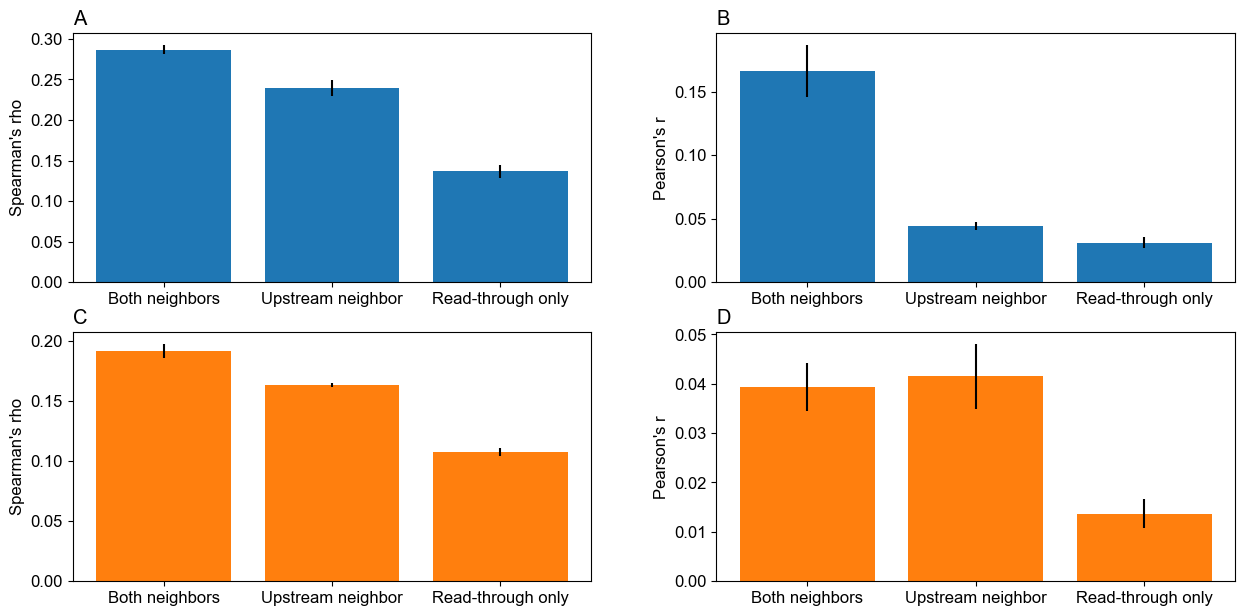

In [189]:
gs = gridspec.GridSpec(3, 11) 
fig1 = plt.figure(figsize=(15,11))
ax1 = fig1.add_subplot(gs[:1,:5])
ax1.set_title('A',loc='left')
temp_y = [temp_ouput2_DN_YPD[('spearman_r','mean')].values[0],temp_ouput2_SN_YPD[('spearman_r','mean')].values[0],temp_ouput2_RT_YPD[('spearman_r','mean')].values[0]]
temp_error = [temp_ouput2_DN_YPD[('spearman_r','sem')].values[0],temp_ouput2_SN_YPD[('spearman_r','sem')].values[0],temp_ouput2_RT_YPD[('spearman_r','sem')].values[0]] 
temp_cf = np.array(temp_error)*1.96 #95% confidence interval
ax1.bar(x = ['Both neighbors','Upstream neighbor','Read-through only'], height = temp_y, yerr=temp_cf)
ax1.set_ylabel("Spearman's rho")

ax2 = fig1.add_subplot(gs[:1,6:11])
ax2.set_title('B',loc='left')
temp_y = [temp_ouput2_DN_YPD[('pearson_r','mean')].values[0],temp_ouput2_SN_YPD[('pearson_r','mean')].values[0],temp_ouput2_RT_YPD[('pearson_r','mean')].values[0]]
temp_error = [temp_ouput2_DN_YPD[('pearson_r','sem')].values[0],temp_ouput2_SN_YPD[('pearson_r','sem')].values[0],temp_ouput2_RT_YPD[('pearson_r','sem')].values[0]] 
temp_cf = np.array(temp_error)*1.96 #95% confidence interval
ax2.bar(x = ['Both neighbors','Upstream neighbor','Read-through only'], height = temp_y, yerr=temp_cf)
ax2.set_ylabel("Pearson's r")

ax1 = fig1.add_subplot(gs[1:2,:5])
ax1.set_title('C',loc='left')
temp_y = [temp_ouput2_DN_SCD[('spearman_r','mean')].values[0],temp_ouput2_SN_SCD[('spearman_r','mean')].values[0],temp_ouput2_RT_SCD[('spearman_r','mean')].values[0]]
temp_error = [temp_ouput2_DN_SCD[('spearman_r','sem')].values[0],temp_ouput2_SN_SCD[('spearman_r','sem')].values[0],temp_ouput2_RT_SCD[('spearman_r','sem')].values[0]] 
temp_cf = np.array(temp_error)*1.96 #95% confidence interval
ax1.bar(x = ['Both neighbors','Upstream neighbor','Read-through only'], height = temp_y, yerr=temp_cf, color ='tab:orange')
ax1.set_ylabel("Spearman's rho")

ax2 = fig1.add_subplot(gs[1:2,6:11])
ax2.set_title('D',loc='left')
temp_y = [temp_ouput2_DN_SCD[('pearson_r','mean')].values[0],temp_ouput2_SN_SCD[('pearson_r','mean')].values[0],temp_ouput2_RT_SCD[('pearson_r','mean')].values[0]]
temp_error = [temp_ouput2_DN_SCD[('pearson_r','sem')].values[0],temp_ouput2_SN_SCD[('pearson_r','sem')].values[0],temp_ouput2_RT_SCD[('pearson_r','sem')].values[0]] 
temp_cf = np.array(temp_error)*1.96 #95% confidence interval
ax2.bar(x = ['Both neighbors','Upstream neighbor','Read-through only'], height = temp_y, yerr=temp_cf, color ='tab:orange')
ax2.set_ylabel("Pearson's r")

---

### 7.16. Figure S17

In [414]:
YPD_DNDN_summary = pd.read_csv (dr1+'YPD_double_neighbor_summary.csv')

In [415]:
YPD_DNDN_summary.to_csv('Source_data/' + 'FigS17_YPD_double_neighbor_summary.csv', index=False)

In [416]:
SCD_DNDN_summary = pd.read_csv (dr1+'SCD_double_neighbor_summary.csv')

In [417]:
SCD_DNDN_summary.to_csv('Source_data/' + 'FigS17_SCD_double_neighbor_summary.csv', index=False)

Text(0.0, 1.0, 'B')

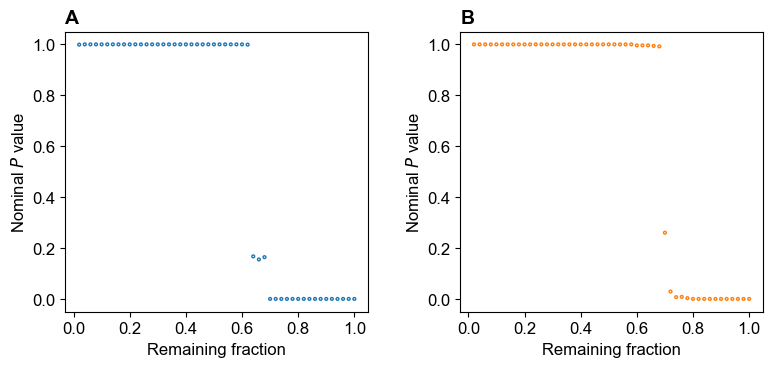

In [196]:
# (200,'V1'),(200,'V2')
gs = gridspec.GridSpec(2, 9) 
fig1 = plt.figure(figsize=(9,8))
#Here I generate sub figure object and assign to corresponding location
input_summary_1 = YPD_DNDN_summary
#panel A for YPD expression distribution
ax1 = fig1.add_subplot(gs[:1,:4])
ax1.scatter(input_summary_1['Quantile'],input_summary_1['P_value_resampled'],color ='tab:blue',facecolors='none',s =4)
ax1.set_ylabel("Nominal $\it{P}$ value")
ax1.set_xlabel('Remaining fraction')
ax1.set_title('A',loc = 'Left',weight = 'bold',size = 14)
# ax1.set_yscale('log')




####################
input_summary_1 = SCD_DNDN_summary
#panel A for YPD expression distribution
ax1 = fig1.add_subplot(gs[:1,5:9])
ax1.scatter(input_summary_1['Quantile'],input_summary_1['P_value_resampled'],color ='tab:orange',facecolors='none',s =4)
ax1.set_ylabel("Nominal $\it{P}$ value")
ax1.set_xlabel('Remaining fraction')
ax1.set_title('B',loc = 'Left',weight = 'bold',size = 14)
# ax1.set_yscale('log')


####################

# fig1.savefig(fig_output_address+'FigS16.pdf')

---

### 7.17. Figure S18: Environmental specific expression random promoterc

In [418]:
# Find shared proportioN

In [419]:
def total_compare_pc(input_df1, input_df2, input_percentage_list,input_DNA_cut,input_RNA_cut):
    temp_dic = {}
    for sub_percentage in input_percentage_list:
        temp_df_1 = input_df1[(input_df1['Percentile_of_PC']==sub_percentage)&(input_df1['RNA_cut_off']==input_RNA_cut)&(input_df1['DNA_cut_off']==input_DNA_cut)]
        temp_df_2 = input_df2[(input_df2['Percentile_of_PC']==sub_percentage)&(input_df2['RNA_cut_off']==input_RNA_cut)&(input_df2['DNA_cut_off']==input_DNA_cut)]
        temp_1_total_barcode = ast.literal_eval(temp_df_1['barcode_list'].values[0])
        temp_2_total_barcode = ast.literal_eval(temp_df_2['barcode_list'].values[0])

        temp_1_more_than_c = ast.literal_eval(temp_df_1['barcode_better_than_pc_list'].values[0])
        temp_2_more_than_c = ast.literal_eval(temp_df_2['barcode_better_than_pc_list'].values[0])

        temp_1_less_than_c = ast.literal_eval(temp_df_1['barcode_worse_than_pc_list'].values[0])
        temp_2_less_than_c = ast.literal_eval(temp_df_2['barcode_worse_than_pc_list'].values[0])
        # tuple1: input_df1 endogeous distribution
        # tuple2: input_df2 better than control in input_df1 endogeous distribution
        # tuple3: input_df2 worse than control in input_df1 endogeous distribution
        # tuple4: all input_df2 in input_df1 endogeous distribution
        # tuple5: input_df2 endogeous distribution
        # tuple6: input_df1 better than control in input_df2 endogeous distribution
        # tuple7: input_df1 worse than control in input_df2 endogeous distribution
        # tuple8: all input_df1 in input_df2 endogeous distribution    
        # in each tuple, three elements [beter_than_control, worse_than_control, not_sig]
        t1 = np.array([len(temp_1_more_than_c),len(temp_1_less_than_c),
                       len(temp_1_total_barcode)-len(temp_1_more_than_c)-len(temp_1_less_than_c)])/len(temp_1_total_barcode)

        temp1 = len(set(temp_1_more_than_c)&set(temp_2_more_than_c))
        temp2 = len(set(temp_1_less_than_c)&set(temp_2_more_than_c))
        temp3 = len(set(temp_1_total_barcode)&set(temp_2_more_than_c))
        t2 = np.array([temp1,temp2,temp3-temp1-temp2])/temp3

        temp1 = len(set(temp_1_more_than_c)&set(temp_2_less_than_c))
        temp2 = len(set(temp_1_less_than_c)&set(temp_2_less_than_c))
        temp3 = len(set(temp_1_total_barcode)&set(temp_2_less_than_c))
        t3 = np.array([temp1,temp2,temp3-temp1-temp2])/temp3

        temp1 = len(set(temp_1_more_than_c)&set(temp_2_total_barcode))
        temp2 = len(set(temp_1_less_than_c)&set(temp_2_total_barcode))
        temp3 = len(set(temp_1_total_barcode)&set(temp_2_total_barcode))
        t4 = np.array([temp1,temp2,temp3-temp1-temp2])/temp3

        t5 = np.array([len(temp_2_more_than_c),len(temp_2_less_than_c),
                       len(temp_2_total_barcode)-len(temp_2_more_than_c)-len(temp_2_less_than_c)])/len(temp_2_total_barcode)

        temp1 = len(set(temp_2_more_than_c)&set(temp_1_more_than_c))
        temp2 = len(set(temp_2_less_than_c)&set(temp_1_more_than_c))
        temp3 = len(set(temp_2_total_barcode)&set(temp_1_more_than_c))
        t6 = np.array([temp1,temp2,temp3-temp1-temp2])/temp3

        temp1 = len(set(temp_2_more_than_c)&set(temp_1_less_than_c))
        temp2 = len(set(temp_2_less_than_c)&set(temp_1_less_than_c))
        temp3 = len(set(temp_2_total_barcode)&set(temp_1_less_than_c))
        t7 = np.array([temp1,temp2,temp3-temp1-temp2])/temp3

        temp1 = len(set(temp_2_more_than_c)&set(temp_1_total_barcode))
        temp2 = len(set(temp_2_less_than_c)&set(temp_1_total_barcode))
        temp3 = len(set(temp_2_total_barcode)&set(temp_1_total_barcode))
        t8 = np.array([temp1,temp2,temp3-temp1-temp2])/temp3
        temp_dic[sub_percentage] = tuple([tuple(t1),tuple(t2),tuple(t3),tuple(t4),tuple(t5),tuple(t6),tuple(t7),tuple(t8)])
    return(temp_dic)

In [420]:
RD_comparison_dic = total_compare_pc(YPD_summary,SCD_summary,list(np.linspace(10,100,10)/100),100,0)

In [421]:
def total_compare_pc_RNAseq(input_df1, input_df2, input_percentage_list,test_UTR_cutoff):
    temp_dic = {}
    for sub_percentage in input_percentage_list:
        temp_df_1 = input_df1[(input_df1['UTR_length'] == test_UTR_cutoff)&(input_df1['Control_percentile'] == sub_percentage)]
        temp_df_2 = input_df2[(input_df1['UTR_length'] == test_UTR_cutoff)&(input_df2['Control_percentile'] == sub_percentage)]
        
        temp_1_more_than_c = ast.literal_eval(temp_df_1['More_than_Control_list'].values[0])
        temp_2_more_than_c = ast.literal_eval(temp_df_2['More_than_Control_list'].values[0])
        
        temp_1_total_barcode = [1]*len(temp_1_more_than_c)
        temp_2_total_barcode = [1]*len(temp_1_more_than_c)


        temp_1_less_than_c = ast.literal_eval(temp_df_1['lower_than_Control_list'].values[0])
        temp_2_less_than_c = ast.literal_eval(temp_df_2['lower_than_Control_list'].values[0])
        # tuple1: input_df1 endogeous distribution
        # tuple2: input_df2 better than control in input_df1 endogeous distribution
        # tuple3: input_df2 worse than control in input_df1 endogeous distribution
        # tuple4: all input_df2 in input_df1 endogeous distribution
        # tuple5: input_df2 endogeous distribution
        # tuple6: input_df1 better than control in input_df2 endogeous distribution
        # tuple7: input_df1 worse than control in input_df2 endogeous distribution
        # tuple8: all input_df1 in input_df2 endogeous distribution    
        # in each tuple, three elements [beter_than_control, worse_than_control, not_sig]
        t1 = np.array([sum(temp_1_more_than_c),sum(temp_1_less_than_c),
                       sum(temp_1_total_barcode)-sum(temp_1_more_than_c)-sum(temp_1_less_than_c)])/sum(temp_1_total_barcode)

        temp1 = sum(np.array(temp_1_more_than_c)&np.array(temp_2_more_than_c))
        temp2 = sum(np.array(temp_1_less_than_c)&np.array(temp_2_more_than_c))
        temp3 = sum(np.array(temp_1_total_barcode)&np.array(temp_2_more_than_c))
        t2 = np.array([temp1,temp2,temp3-temp1-temp2])/temp3

        temp1 = sum(np.array(temp_1_more_than_c)&np.array(temp_2_less_than_c))
        temp2 = sum(np.array(temp_1_less_than_c)&np.array(temp_2_less_than_c))
        temp3 = sum(np.array(temp_1_total_barcode)&np.array(temp_2_less_than_c))
        t3 = np.array([temp1,temp2,temp3-temp1-temp2])/temp3

        temp1 = sum(np.array(temp_1_more_than_c)&np.array(temp_2_total_barcode))
        temp2 = sum(np.array(temp_1_less_than_c)&np.array(temp_2_total_barcode))
        temp3 = sum(np.array(temp_1_total_barcode)&np.array(temp_2_total_barcode))
        t4 = np.array([temp1,temp2,temp3-temp1-temp2])/temp3

        t5 = np.array([sum(temp_2_more_than_c),sum(temp_2_less_than_c),
                       sum(temp_2_total_barcode)-sum(temp_2_more_than_c)-sum(temp_2_less_than_c)])/sum(temp_2_total_barcode)

        temp1 = sum(np.array(temp_2_more_than_c)&np.array(temp_1_more_than_c))
        temp2 = sum(np.array(temp_2_less_than_c)&np.array(temp_1_more_than_c))
        temp3 = sum(np.array(temp_2_total_barcode)&np.array(temp_1_more_than_c))
        t6 = np.array([temp1,temp2,temp3-temp1-temp2])/temp3

        temp1 = sum(np.array(temp_2_more_than_c)&np.array(temp_1_less_than_c))
        temp2 = sum(np.array(temp_2_less_than_c)&np.array(temp_1_less_than_c))
        temp3 = sum(np.array(temp_2_total_barcode)&np.array(temp_1_less_than_c))
        t7 = np.array([temp1,temp2,temp3-temp1-temp2])/temp3

        temp1 = sum(np.array(temp_2_more_than_c)&np.array(temp_1_total_barcode))
        temp2 = sum(np.array(temp_2_less_than_c)&np.array(temp_1_total_barcode))
        temp3 = sum(np.array(temp_2_total_barcode)&np.array(temp_1_total_barcode))
        t8 = np.array([temp1,temp2,temp3-temp1-temp2])/temp3
        temp_dic[sub_percentage] = tuple([tuple(t1),tuple(t2),tuple(t3),tuple(t4),tuple(t5),tuple(t6),tuple(t7),tuple(t8)])
    return(temp_dic)

In [422]:
RNAseq_comparison_dic = total_compare_pc_RNAseq(p_c_RNAseq_YPD,p_c_RNAseq_SCD,list(np.linspace(10,100,10)/100),200)

(-1.099999998630282,
 1.0999999773419078,
 -1.099999799132718,
 1.0999999904348914)

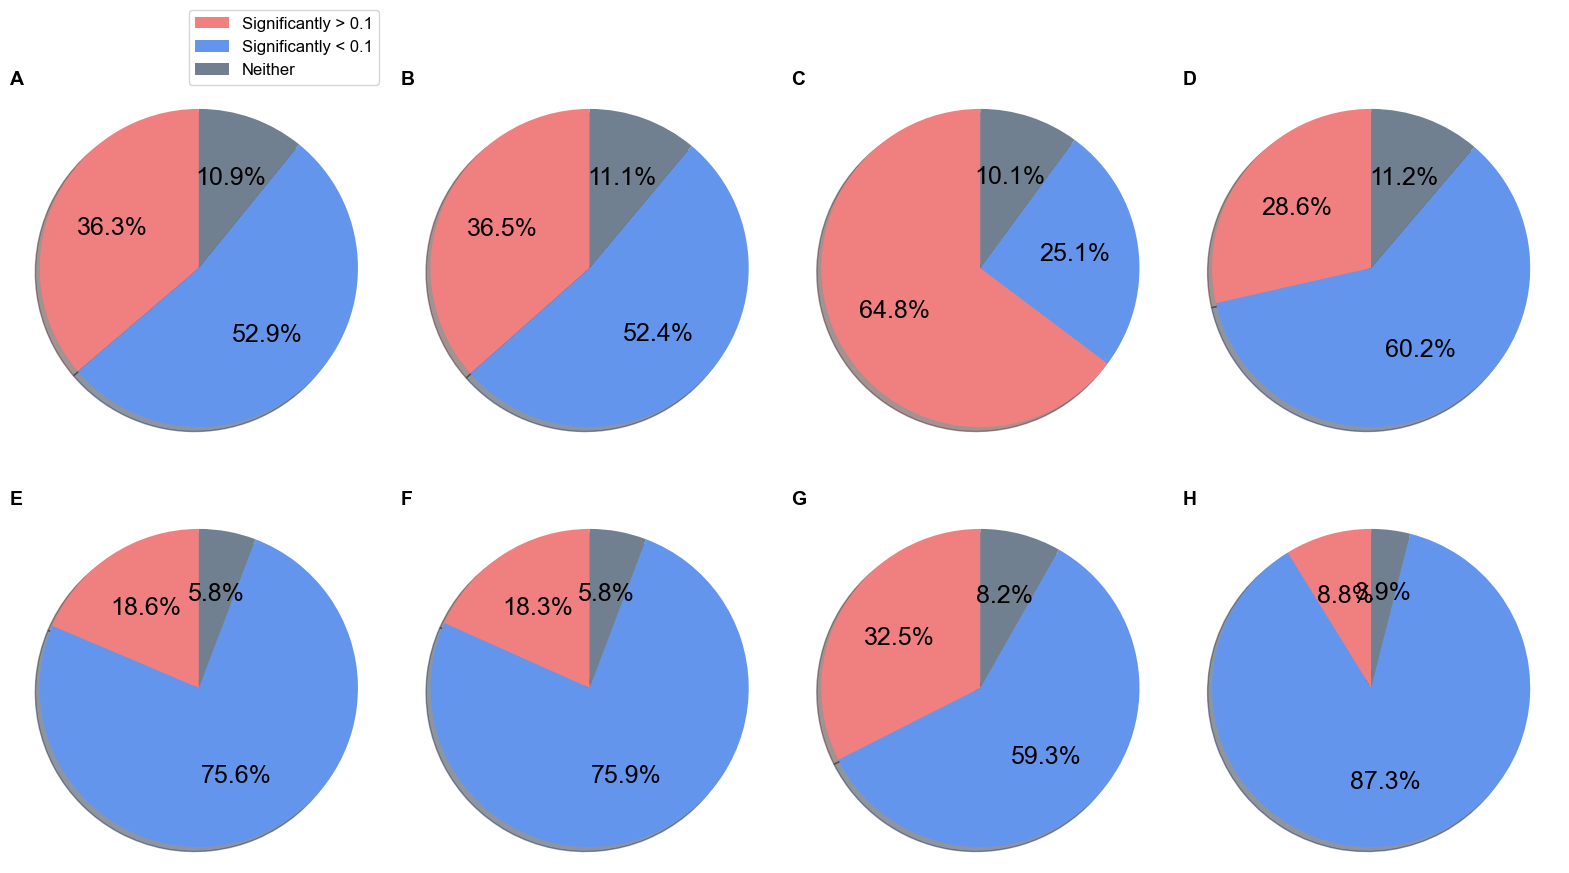

In [159]:
temp_df = RD_comparison_dic[0.1]

gs = gridspec.GridSpec(2, 20) 
fig1 = plt.figure(figsize=(20,10))

three_color = ['lightcoral','cornflowerblue','slategrey']
ax1=fig1.add_subplot(gs[:1, :5])
explode = (0, 0, 0)
ax1.set_title('A',loc='left',weight ='bold', size = 14)
ax1.pie(temp_df[0], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.set_title('YPD',fontsize=18)
ax1.legend(loc='lower right', labels=['Significantly > 0.1','Significantly < 0.1','Neither'],bbox_to_anchor =(1, 1))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# sizes = np.array(change_count)[[0,3,6]]
# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax2=fig1.add_subplot(gs[:1, 5:10])
ax2.set_title('B',loc='left',weight ='bold', size = 14)
ax2.pie(temp_df[3], explode=explode, labels=None, autopct='%1.1f%%',colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax3.set_title('Significantly better than negative control in SCD',fontsize=18)

# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax3=fig1.add_subplot(gs[:1, 10:15])
ax3.set_title('C',loc='left',weight ='bold', size = 14)
ax3.pie(temp_df[1], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax5.set_title('Significantly worse than negative control in SCD',fontsize=18)

ax4=fig1.add_subplot(gs[:1, 15:20])
ax4.set_title('D',loc='left',weight ='bold', size = 14)
ax4.pie(temp_df[2], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax5=fig1.add_subplot(gs[1:2, :5])
# explode = (0, 0, 0)
ax5.set_title('E',loc='left',weight ='bold', size = 14)
ax5.pie(temp_df[4], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.set_title('YPD',fontsize=18)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# sizes = np.array(change_count)[[0,3,6]]
# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax6=fig1.add_subplot(gs[1:2, 5:10])
ax6.set_title('F',loc='left',weight ='bold', size = 14)
ax6.pie(temp_df[7], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax6.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax3.set_title('Significantly better than negative control in SCD',fontsize=18)

# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax7=fig1.add_subplot(gs[1:2, 10:15])
ax7.set_title('G',loc='left',weight ='bold', size = 14)
ax7.pie(temp_df[5], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax7.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax5.set_title('Significantly worse than negative control in SCD',fontsize=18)

ax8=fig1.add_subplot(gs[1:2, 15:20])
ax8.set_title('H',loc='left',weight ='bold', size = 14)
ax8.pie(temp_df[6], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax8.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# fig1.savefig(fig_output_address+'FigS17.pdf')

#### Resource_data_output

In [433]:
temp = np.array(RD_comparison_dic[0.1]).transpose()
RD_comparison_df = pd.DataFrame({'Panel_number': list(map(chr, range(ord('a'), ord('h')+1))),
                        'Significantly > 0.1': temp[0],
                        'Significantly < 0.1': temp[1],
                        'Neither':temp[2]
})

In [434]:
RD_comparison_df.to_csv('Source_data/' + 'FigS18_RD_GXE_comparison.csv', index=False)

In [435]:
temp = np.array(RNAseq_comparison_dic[0.1]).transpose()
Intergenic_comparison_df = pd.DataFrame({'Panel_number': list(map(chr, range(ord('a'), ord('h')+1))),
                        'Significantly > 0.1': temp[0],
                        'Significantly < 0.1': temp[1],
                        'Neither':temp[2]
})

In [436]:
Intergenic_comparison_df.to_csv('Source_data/' + 'FigS19_Intergenic_GXE_comparison.csv', index=False)

---

### 7.18 Figure S19: Environmental specific expression for intergenic region

(-1.0999997204844285, 1.099998952124633, -1.0999995160274891, 1.09999997695369)

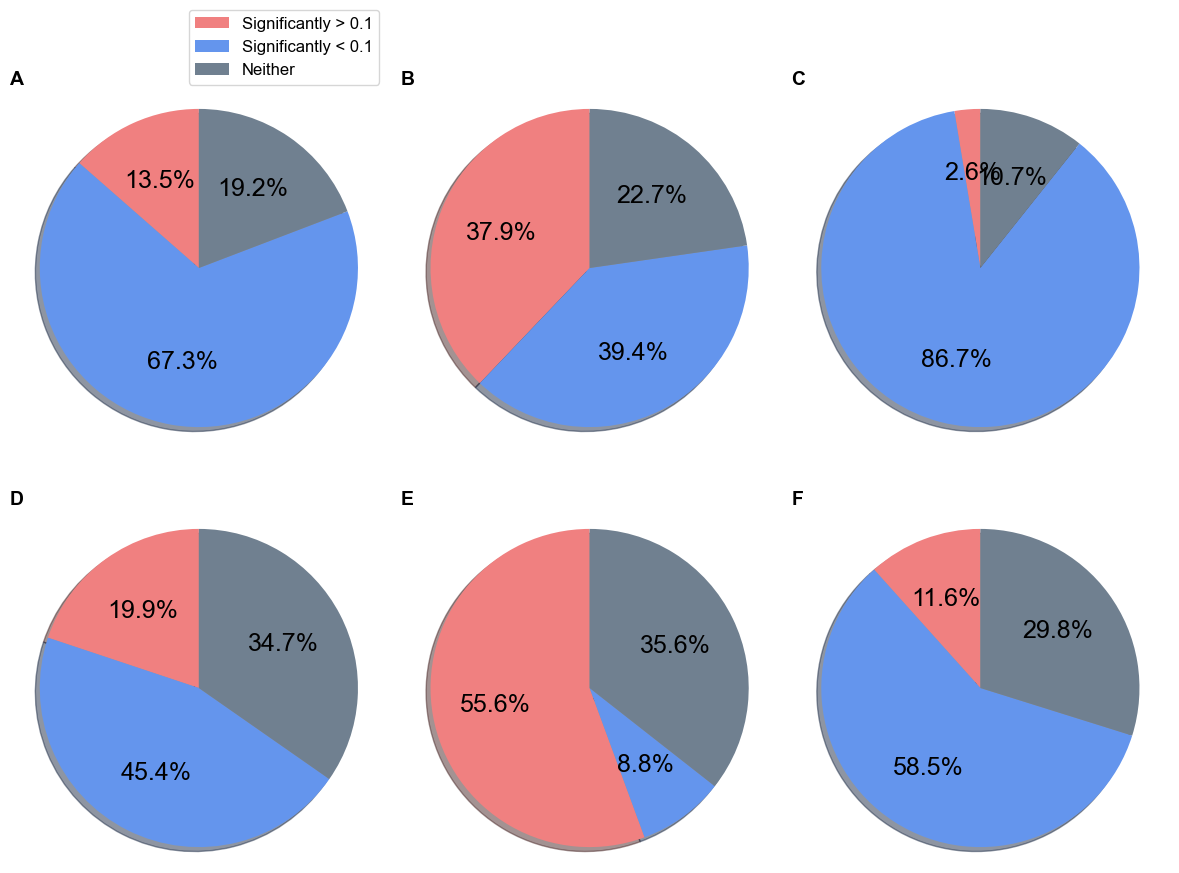

In [161]:
temp_df = RNAseq_comparison_dic[0.1]


gs = gridspec.GridSpec(2, 20) 
fig1 = plt.figure(figsize=(20,10))

three_color = ['lightcoral','cornflowerblue','slategrey']
ax1=fig1.add_subplot(gs[:1, :5])
ax1.set_title('A',loc='left',weight ='bold', size = 14)
explode = (0, 0, 0)
ax1.pie(temp_df[0], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.set_title('YPD',fontsize=18)
ax1.legend(loc='lower right', labels=['Significantly > 0.1','Significantly < 0.1','Neither'],bbox_to_anchor =(1, 1))



# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax3=fig1.add_subplot(gs[:1, 5:10])
ax3.set_title('B',loc='left',weight ='bold', size = 14)
ax3.pie(temp_df[1], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax5.set_title('Significantly worse than negative control in SCD',fontsize=18)

ax4=fig1.add_subplot(gs[:1, 10:15])
ax4.set_title('C',loc='left',weight ='bold', size = 14)
ax4.pie(temp_df[2], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


ax5=fig1.add_subplot(gs[1:2, :5])
ax5.set_title('D',loc='left',weight ='bold', size = 14)
# explode = (0, 0, 0)
ax5.pie(temp_df[4], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax1.set_title('YPD',fontsize=18)


# explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax7=fig1.add_subplot(gs[1:2, 5:10])
ax7.set_title('E',loc='left',weight ='bold', size = 14)
ax7.pie(temp_df[5], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax7.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax5.set_title('Significantly worse than negative control in SCD',fontsize=18)

ax8=fig1.add_subplot(gs[1:2, 10:15])
ax8.set_title('F',loc='left',weight ='bold', size = 14)
ax8.pie(temp_df[6], explode=explode, labels=None, autopct='%1.1f%%', colors =three_color,
        shadow=True, startangle=90,textprops={'fontsize': 18})
ax8.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# fig1.savefig(fig_output_address+'FigS18.pdf')

---

### 7.19 Figure S20

In [437]:
# YPD/SCD expression based on individual sample
YPD_RD_summary_S1_address =  dr1 + 'YPD_RD_summary_median_S1_dna_cutoff_extra.csv'
YPD_RD_summary_S2_address =  dr1 + 'YPD_RD_summary_median_S2_dna_cutoff_extra.csv'
YPD_RD_summary_S3_address =  dr1 + 'YPD_RD_summary_median_S3_dna_cutoff_extra.csv'

SCD_RD_summary_S1_address =  dr1 + 'SCD_RD_summary_median_S1_dna_cutoff_extra.csv'
SCD_RD_summary_S2_address =  dr1 + 'SCD_RD_summary_median_S2_dna_cutoff_extra.csv'
SCD_RD_summary_S3_address =  dr1 + 'SCD_RD_summary_median_S3_dna_cutoff_extra.csv'

In [438]:
# fraction of promoter higher than nc shared between method
YPD_shared_fraction_nc_address = dr1 + 'ACRF_random_promoter_shared_more_than_nc_YPD.csv'
SCD_shared_fraction_nc_address = dr1 + 'ACRF_random_promoter_shared_more_than_nc_SCD.csv'
YPD_shared_fraction_pc_address = dr1 + 'ACRF_random_promoter_shared_more_than_pc_YPD.csv'
SCD_shared_fraction_pc_address = dr1 + 'ACRF_random_promoter_shared_more_than_pc_SCD.csv'

In [439]:
# Expression based on total method
SCD_RD_summary_total_address = dr1+'SCD_RD_summary_median_total_dna_cutoff_extra.csv'
YPD_RD_summary_total_address = dr1+'YPD_RD_summary_median_total_dna_cutoff_extra.csv'

####  YPD expression summary

In [440]:
YPD_RD_summary_total = pd.read_csv(YPD_RD_summary_total_address).drop(columns =['barcode_list','barcode_better_than_pc_list','barcode_better_than_nc_list'
                                 ,'barcode_worse_than_pc_list','barcode_worse_than_nc_list'])

YPD_RD_summary_S1= pd.read_csv(YPD_RD_summary_S1_address)
YPD_RD_summary_S2= pd.read_csv(YPD_RD_summary_S2_address)
YPD_RD_summary_S3= pd.read_csv(YPD_RD_summary_S3_address)

#### SCD expression summary

In [441]:
SCD_RD_summary_total = pd.read_csv(SCD_RD_summary_total_address).drop(columns =['barcode_list','barcode_better_than_pc_list','barcode_better_than_nc_list'
                                 ,'barcode_worse_than_pc_list','barcode_worse_than_nc_list'])
SCD_RD_summary_S1= pd.read_csv(SCD_RD_summary_S1_address)
SCD_RD_summary_S2= pd.read_csv(SCD_RD_summary_S2_address)
SCD_RD_summary_S3= pd.read_csv(SCD_RD_summary_S3_address)

#### Combind data

In [442]:
# add method and condition
SCD_RD_summary_total['Condition'] = 'SCD'
SCD_RD_summary_S1['Condition'] = 'SCD'
SCD_RD_summary_S2['Condition'] = 'SCD'
SCD_RD_summary_S3['Condition'] = 'SCD'

YPD_RD_summary_total['Condition'] = 'YPD'
YPD_RD_summary_S1['Condition'] = 'YPD'
YPD_RD_summary_S2['Condition'] = 'YPD'
YPD_RD_summary_S3['Condition'] = 'YPD'

SCD_RD_summary_total['Method'] = 'Total'
YPD_RD_summary_total['Method'] = 'Total'

SCD_RD_summary_S1['Method'] = 'S1'
SCD_RD_summary_S2['Method'] = 'S2'
SCD_RD_summary_S3['Method'] = 'S3'

YPD_RD_summary_S1['Method'] = 'S1'
YPD_RD_summary_S2['Method'] = 'S2'
YPD_RD_summary_S3['Method'] = 'S3'

In [443]:
RD_summary_df = pd.concat([SCD_RD_summary_total.reset_index(drop = True),YPD_RD_summary_total.reset_index(drop = True),
                          SCD_RD_summary_S1.reset_index(drop = True),SCD_RD_summary_S2.reset_index(drop = True),
                          SCD_RD_summary_S3.reset_index(drop = True),YPD_RD_summary_S1.reset_index(drop = True),
                           YPD_RD_summary_S2.reset_index(drop = True),YPD_RD_summary_S3.reset_index(drop = True)]).reset_index(drop = True)

#### How promoter with activity are shared between method

In [444]:
YPD_shared_fraction_nc_df = pd.read_csv(YPD_shared_fraction_nc_address)
YPD_shared_fraction_nc_df['Overlap_fraction'] = YPD_shared_fraction_nc_df['Fraction_of_overlap_with_TotalMethod']
YPD_shared_fraction_nc_df['Unique_fraction'] = YPD_shared_fraction_nc_df['Number_of_barcode_unique']/YPD_shared_fraction_nc_df['Number_of_barcode']

In [445]:
SCD_shared_fraction_nc_df = pd.read_csv(SCD_shared_fraction_nc_address)
SCD_shared_fraction_nc_df['Overlap_fraction'] = SCD_shared_fraction_nc_df['Fraction_of_overlap_with_TotalMethod']
SCD_shared_fraction_nc_df['Unique_fraction'] = SCD_shared_fraction_nc_df['Number_of_barcode_unique']/SCD_shared_fraction_nc_df['Number_of_barcode']

In [446]:
YPD_shared_fraction_pc_df = pd.read_csv(YPD_shared_fraction_pc_address)
YPD_shared_fraction_pc_df['Overlap_fraction'] = YPD_shared_fraction_pc_df['Fraction_of_overlap_with_TotalMethod']
YPD_shared_fraction_pc_df['Unique_fraction'] = YPD_shared_fraction_pc_df['Number_of_barcode_unique']/YPD_shared_fraction_pc_df['Number_of_barcode']

In [447]:
SCD_shared_fraction_pc_df = pd.read_csv(SCD_shared_fraction_pc_address)
SCD_shared_fraction_pc_df['Overlap_fraction'] = SCD_shared_fraction_pc_df['Fraction_of_overlap_with_TotalMethod']
SCD_shared_fraction_pc_df['Unique_fraction'] = SCD_shared_fraction_pc_df['Number_of_barcode_unique']/SCD_shared_fraction_pc_df['Number_of_barcode']

#### Plotting

In [448]:
temp_t = ['Method','Overlap_fraction','Unique_fraction']

Text(0, 0.5, 'Fraction in SCD')

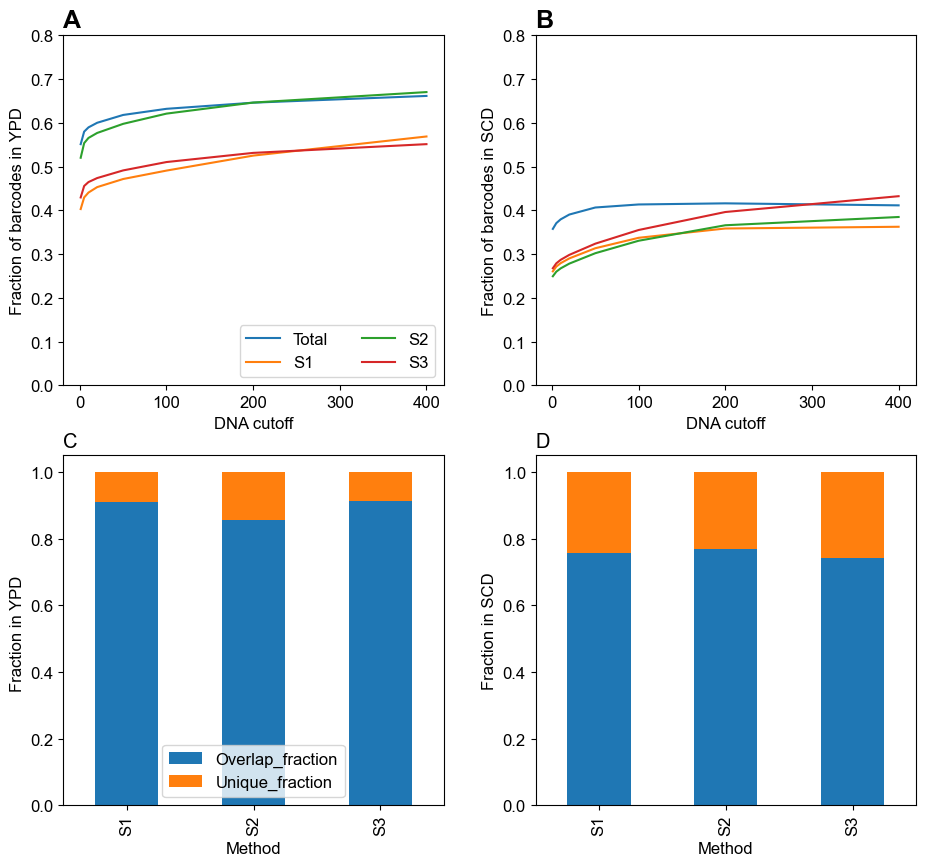

In [449]:
temp_cut_control = 1.0
temp_cut_RNA = 0
temp_df = RD_summary_df[(RD_summary_df['Percentile_of_PC']==temp_cut_control)&(RD_summary_df['RNA_cut_off']==temp_cut_RNA)&(RD_summary_df.Condition == 'YPD')]

gs = gridspec.GridSpec(2, 11) 
fig1 = plt.figure(figsize=(11,10))
#Here I generate sub figure object and assign to corresponding location
ax1=fig1.add_subplot(gs[:1, :5])

ix = 'DNA_cut_off'
iy = 'better_than_nc_ratio'
sns.lineplot(data = temp_df,x = ix, y = iy, hue = 'Method')
ax1.set_title('A',weight='bold', loc='left', size= 18)
ax1.set_ylabel('Fraction of barcodes in YPD')
ax1.set_xlabel('DNA cutoff')
ax1.set_ylim(0,0.8)
ax1.legend(ncol=2, loc='lower right')

temp_df  = RD_summary_df[(RD_summary_df['Percentile_of_PC']==temp_cut_control)&(RD_summary_df['RNA_cut_off']==temp_cut_RNA)&(RD_summary_df.Condition == 'SCD')]
ax2=fig1.add_subplot(gs[:1, 6:11])
ix = 'DNA_cut_off'
iy = 'better_than_nc_ratio'
sns.lineplot(data = temp_df,x = ix, y = iy, hue = 'Method')
ax2.set_title('B',weight='bold', loc='left', size= 18)
ax2.set_ylabel('Fraction of barcodes in SCD')
ax2.set_xlabel('DNA cutoff')
ax2.set_ylim(0,0.8)
ax2.legend([],[], frameon=False)



# YPD
ax1=fig1.add_subplot(gs[1:2, :5])
YPD_shared_fraction_nc_df[temp_t].set_index('Method').plot(kind='bar', stacked=True,ax = ax1)
# ax1.legend([],[], frameon=False) # hide legend
ax1.set_title('C',loc = 'Left')
ax1.set_ylabel('Fraction in YPD ')


ax2=fig1.add_subplot(gs[1:2, 6:11])

SCD_shared_fraction_nc_df[temp_t].set_index('Method').plot(kind='bar', stacked=True,ax = ax2)
ax2.legend([],[], frameon=False) # hide legend
ax2.set_title('D',loc = 'Left')
ax2.set_ylabel('Fraction in SCD')
# fig1.savefig(fig_output_address+'Fig_S20.pdf')

#### Resource_data_output

In [451]:
temp_df = RD_summary_df[(RD_summary_df['Percentile_of_PC']==temp_cut_control)&(RD_summary_df['RNA_cut_off']==temp_cut_RNA)&(RD_summary_df.Condition == 'YPD')]
temp_df.to_csv('Source_data/' + 'FigS20_YPD_individual_expression_comparison.csv', index=False)

In [452]:
temp_df = RD_summary_df[(RD_summary_df['Percentile_of_PC']==temp_cut_control)&(RD_summary_df['RNA_cut_off']==temp_cut_RNA)&(RD_summary_df.Condition == 'SCD')]
temp_df.to_csv('Source_data/' + 'FigS20_SCD_individual_expression_comparison.csv', index=False)

In [455]:
SCD_shared_fraction_nc_df[temp_t].to_csv('Source_data/' + 'FigS20_SCD_individual_expression_shared.csv', index=False)
YPD_shared_fraction_nc_df[temp_t].to_csv('Source_data/' + 'FigS20_YPD_individual_expression_shared.csv', index=False)

---

### 7.20. Figure S21

In [456]:
# promoter complete information
YPD_promoter_df = pd.read_csv(dr1 + 'YPD_promoter_output.csv')
SCD_promoter_df = pd.read_csv(dr1 + 'SCD_promoter_output.csv')

In [457]:
YPD_promoter_df = all_present_total_new(YPD_promoter_df,100,0)
SCD_promoter_df = all_present_total_new(SCD_promoter_df,100,0)

In [458]:
# Motif information

In [459]:
# I only picked those with at least 100 DNA count
SCD_promoter_df_final = pd.read_csv(dr1 + 'SCD_ScerTF_motif_df_final.csv', index_col =0).loc[SCD_promoter_df.representative_sequence.to_list()]
YPD_promoter_df_final = pd.read_csv(dr1 + 'YPD_ScerTF_motif_df_final.csv', index_col =0).loc[YPD_promoter_df.representative_sequence.to_list()]

/var/folders/xv/26kbh4lj2rjdcrxz37m9wxyw0000gn/T/ipykernel_59845/4008878363.py:2: DtypeWarning: Columns (628,629,635,637,638,639,643,653,666,673,677,679,680,685,686,687,692,698,699,701,706,714,720,721,728,730,731,732,751,760,769,776,780,782,785,790,791,824,825,833,834,835,836,838,839,849,854,862,867,869,876,882,888,895,897,899,910,917,922,924,926,927,928,937,947,956,972,976,981,986,987) have mixed types. Specify dtype option on import or set low_memory=False.
  SCD_promoter_df_final = pd.read_csv(dr1 + 'SCD_ScerTF_motif_df_final.csv', index_col =0).loc[SCD_promoter_df.representative_sequence.to_list()]
/var/folders/xv/26kbh4lj2rjdcrxz37m9wxyw0000gn/T/ipykernel_59845/4008878363.py:3: DtypeWarning: Columns (628,635,637,639,640,642,643,653,658,666,671,673,677,679,680,685,686,687,692,698,699,701,706,709,714,720,721,728,730,731,732,759,760,769,776,782,784,785,788,790,791,824,833,834,835,836,838,839,849,854,862,867,869,873,875,876,882,883,888,894,895,897,899,905,910,916,917,922,924,926,927,9

In [460]:
s_YPD = YPD_promoter_df_final[YPD_promoter_df_final['TATA_box'] >0]
s_SCD = SCD_promoter_df_final[SCD_promoter_df_final['TATA_box'] >0]

In [461]:
s_o_YPD = YPD_promoter_df_final[YPD_promoter_df_final['TATA_box'] ==0]
s_o_SCD = SCD_promoter_df_final[SCD_promoter_df_final['TATA_box'] ==0]

##### Plotting

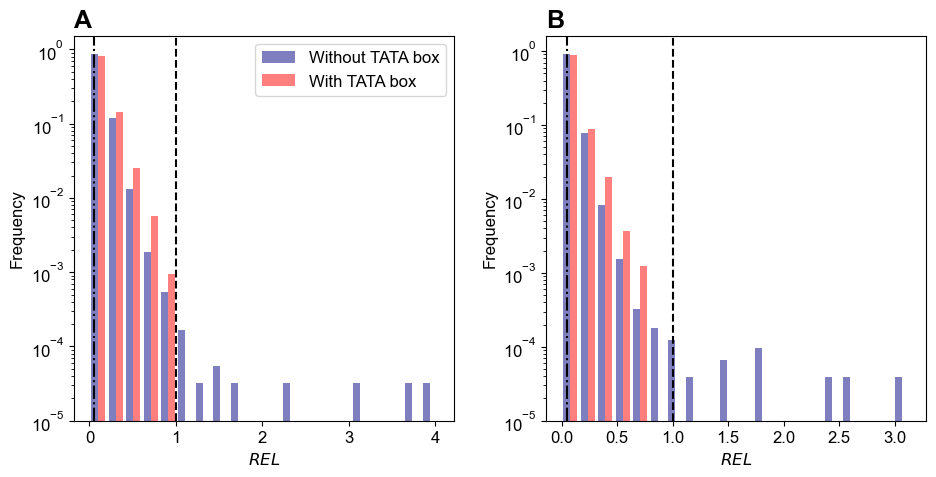

In [188]:
gs = gridspec.GridSpec(1, 11) 
fig1 = plt.figure(figsize=(11,5))
#Here I generate sub figure object and assign to corresponding location

#panel A for YPD expression distribution
ax1=fig1.add_subplot(gs[:1, :5])


temp_input = [p_2a_YPD_100.loc[s_o_YPD.index]['relative_expression'].to_list(),p_2a_YPD_100.loc[s_YPD.index]['relative_expression'].to_list()]
x_w1 = np.empty(len(p_2a_YPD_100.loc[s_o_YPD.index]['relative_expression'].to_list()))
x_w1.fill(1/len(p_2a_YPD_100.loc[s_o_YPD.index]['relative_expression'].to_list()))
x_w2 = np.empty(len(p_2a_YPD_100.loc[s_YPD.index]['relative_expression'].to_list()))
x_w2.fill(1/len(p_2a_YPD_100.loc[s_YPD.index]['relative_expression'].to_list()))

ax1.hist(temp_input,bins=20, alpha=0.5, 
         weights=[x_w1, x_w2], label=['Without TATA box','With TATA box'],
         color=['navy','red'],bottom = 1e-5)
ax1.legend(loc="upper right")


# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Without TATA box_barcode'],color="blue",label='YPD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Without TATA box_barcode'],color="orange",label=kk_2[2])
ax1.set_title('A',weight='bold', loc='left', size= 18)
# ax1.legend(loc="upper right")
# ax1.set_yscale('log')
# ax1.set_xscale('log')
ax1.set_xlabel("$\it{REL}$")
ax1.set_ylabel("Frequency")
ax1.axvline(x=YPD_nc_S[0]/YPD_pc_S[0]*YPD_factor,color='black', linestyle='-.')
ax1.axvline(x=1,color='black', linestyle='--')
# ax1.axvline(x=1*YPD_factor,color='black', linestyle='--')
# ax1.set_xlim(-0.1,1.5)
ax1.set_yscale('log',base = 10)

#panel B for SCD expression distribution

ax2=fig1.add_subplot(gs[:1, 6:11])


temp_input = [p_2b_SCD_100.loc[s_o_SCD.index]['relative_expression'].to_list(),p_2b_SCD_100.loc[s_SCD.index]['relative_expression'].to_list()]
x_w1 = np.empty(len(p_2b_SCD_100.loc[s_o_SCD.index]['relative_expression'].to_list()))
x_w1.fill(1/len(p_2b_SCD_100.loc[s_o_SCD.index]['relative_expression'].to_list()))
x_w2 = np.empty(len(p_2b_SCD_100.loc[s_SCD.index]['relative_expression'].to_list()))
x_w2.fill(1/len(p_2b_SCD_100.loc[s_SCD.index]['relative_expression'].to_list()))

ax2.hist(temp_input,bins=20, alpha=0.5, 
         weights=[x_w1, x_w2], label=['Without TATA box','With TATA box'],
         color=['navy','red'],bottom = 1e-5)
# ax1.plot(kk_1[1]['Cut_off'],kk_1[1]['Without TATA box_barcode'],color="blue",label='SCD')
# # ax1.plot(kk_1[2]['Cut_off'],kk_1[2]['Without TATA box_barcode'],color="orange",label=kk_2[2])
ax2.set_title('B',weight='bold', loc='left', size= 18)
# ax1.legend(loc="upper right")
# ax1.set_yscale('log')
# ax1.set_xscale('log')
ax2.set_xlabel("$\it{REL}$")
ax2.set_ylabel("Frequency")
ax2.axvline(x=SCD_nc_S[0]/SCD_pc_S[0]*SCD_factor,color='black', linestyle='-.')
ax2.axvline(x=1,color='black', linestyle='--')
# ax2.axvline(x=1*SCD_factor,color='black', linestyle='--')
# ax2.set_xlim(-0.1,1)
ax2.set_yscale('log',base = 10)




# fig1.savefig(fig_output_address+'FigSS1.pdf')

#### Resource_data_output

In [470]:
print(YPD_nc_S[0]/YPD_pc_S[0]*YPD_factor)

0.05027564758670754


In [471]:
print(SCD_nc_S[0]/SCD_pc_S[0]*SCD_factor)

0.04596995226553077


In [467]:
p_2a_YPD_100.loc[s_o_YPD.index].reset_index().to_csv('Source_data/' + 'FigS21_YPD_RD_expression_without_TATA.csv', index=False)
p_2a_YPD_100.loc[s_YPD.index].reset_index().to_csv('Source_data/' + 'FigS21_YPD_RD_expression_with_TATA.csv', index=False)

In [468]:
p_2b_SCD_100.loc[s_o_SCD.index].reset_index().to_csv('Source_data/' + 'FigS21_SCD_RD_expression_without_TATA.csv', index=False)
p_2b_SCD_100.loc[s_SCD.index].reset_index().to_csv('Source_data/' + 'FigS21_SCD_RD_expression_with_TATA.csv', index=False)